# 2021 빅데이터 통신 플랫폼 경진대회

# 배달음식점 창업을 위한 배달상권분석리포트

- 포스트 코로나 시대의 자영업자들을 위한 창업 가이드
- 코로나를 겪은 뒤 대한민국의 음식, 배달 문화는 변화했다.
- 즉, 이제는 상권분석, 입지분석이 아닌 배달분석이 필수적이다!
- 배달 분석을 통해 포스트 코로나 시대의 자영업자들을 위한 창업 가이드를 만들어보자.

# BUSINESS_UNDERSTANDING

**[주제]**

**코로나 시대와 함께하는 국민의 음식, 배달 문화 변화에 대한 시각화 처리**

**[배경]**

2019년부터 3년간 약 1,500억원의 정부 예산이 투입되어 통신, 유통 등 10개 플랫폼과 100여개의 센터가 연계된 "빅데이터 플랫폼 및 센터 구축" 사업이 진행 중에 있습니다.
본 대회는 통신 분야 플랫폼으로 선정된 KT와 충북대 주최로 통신 빅데이터 플랫폼(https://www.bigdata-telecom.kr) 내 데이터를 활용하여 포스트 코로나 시대 유의미한 인사이트 도출과 빅데이터 기반의 생태계 활성화를 목적으로 합니다.

**[대회 설명]**

빅데이터를 통해 **코로나 시대 의미 있는 인사이트** 도출<br>
빅데이터 분석 생태계 활성화 및 아이디어 발굴

**[주최 / 주관]**

주최 : 충북대학교, KT 통신 빅데이터 플랫폼<br>
주관 : 충북대학교, 데이콘

|평가기준|항목|상세|배점|
|---|---|---|---|
|Insight|인사이트 도출|**국민들의 포스트 코로나 시대 준비에 도움이 되는가**|35|
| |논리의 명확성|데이터로 적절하게 설명되는가|25|
|Visualiztion|가독성|디자인이 정보 전달에 도움되는가|20|
|Application|데이터 활용|**데이터를 다양하게 활용**하였는가|10|
|Code|코드 정리|코드가 오류 없이 실행되는가|10|

In [1]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import os
import time
import datetime as dt
from datetime import datetime
from tqdm import tqdm

# DATA_UNDERSTADING

In [2]:
kt_data_path = r'C:\Users\Wyatt\wyatt37\data\ktVisual\kt_bigdata'
covid19_path = r'C:\Users\Wyatt\wyatt37\data\ktVisual\covid_19_dataset'

In [3]:
file_list = os.listdir(kt_data_path)
file_list

['dlvr_call.csv',
 'popl.csv',
 'StartupOrClosing_Region.csv',
 'StartupOrClosing_Region_ver2.csv',
 'StartupOrClosing_Shop.csv',
 'StartupOrClosing_Shop_ver2.csv',
 '전체 데이터 설명.hwp']

In [4]:
file_list = os.listdir(covid19_path)
file_list

['Case.csv',
 'PatientInfo.csv',
 'Policy.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

https://github.com/jihoo-kim/Data-Science-for-COVID-19/blob/master/dataset-detailed-description.ipynb

## DLVR_CALL_DATA

- 배달 호출 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 경기대학교 데이터)
- 데이터 정의 : 음식점에서 배달을 위해 배달기사를 호출하고 고객에게 배달이 완료되는 과정에서 생산되는 데이터

In [5]:
# 컬럼이 너무 많아 외우기 힘드니 한글명으로 바꿔주겠습니다.
dlvr_cols = ['순번', '처리일시', '배달요청업체ID', '배달요청상태값','배달접수업체ID','배달상점ID','배달상점업종명',
             '배달상점법정동코드','배달상점광역시도명','배달상점시군구명','배달상점법정동명','배달상점리명',
             '배달상점행정동코드','배달상점도로명주소코드','배달목적지법정동코드','배달목적지광역시도명','배달목적지시군구명',
             '배달목적지법정동명','배달목적지리명','배달목적지행정동코드','배달목적지도로명주소코드','배달자ID',
             '배달금액','호출중계수수료금액','상품금액','결제종류값','결제카드명','배달접수시간','배달배차시간',
             '배달수령시간','배달완료시간','배달취소시간']

dlvr_call = pd.read_csv(kt_data_path + '\\dlvr_call.csv', header=0, names=dlvr_cols)

In [6]:
# \N 으로 되어 있는 빈 값을 np.nan 값으로 치환해줍니다.
dlvr_call.replace({'\\N':np.nan}, inplace=True)

In [7]:
dlvr_call.head()

순번        처리일시 배달요청업체ID  배달요청상태값 배달접수업체ID    배달상점ID 배달상점업종명  \
0  3486929  2019-12-01  C000101        1  C000101  S0021950   족발/보쌈   
1  3486930  2019-12-01  C000099        1  C000099  S0039210      치킨   
2  3486932  2019-12-01  C000029        1  C000043  S0036135      치킨   
3  3486933  2019-12-01  C000105        1  C000105  S0039956  돈까스/일식   
4  3486934  2019-12-01  C000028        1  C000043  S0003074      치킨   

    배달상점법정동코드 배달상점광역시도명  배달상점시군구명 배달상점법정동명 배달상점리명   배달상점행정동코드   배달상점도로명주소코드  \
0  1156013200     서울특별시      영등포구      신길동    NaN  1156066000  115603000023   
1  4128510200       경기도  고양시 일산동구      중산동    NaN  4128552000  412854379205   
2  4115010100       경기도      의정부시     의정부동    NaN  4115051000  411504343421   
3  4128510400       경기도  고양시 일산동구      장항동    NaN  4128559000  412854379097   
4  4115010900       경기도      의정부시      금오동    NaN  4115058000  411504343342   

   배달목적지법정동코드 배달목적지광역시도명 배달목적지시군구명 배달목적지법정동명 배달목적지리명  배달목적지행정동코드  \
0  1159010800      서울특별시       동작구       대방동     NaN  1159066000   
1  4128510200        경기도  고양시 일산동구       중산동     NaN  4128552000   
2  4115011100        경기도      의정부시       녹양동     NaN  4115062000   
3  4128510500        경기도  고양시 일산동구       마두동     NaN  4128556000   
4  4115010900        경기도      의정부시       금오동     NaN  4115058000   

   배달목적지도로명주소코드     배달자ID  배달금액  호출중계수수료금액   상품금액  결제종류값      결제카드명  \
0  115904157098  D0006140  3300        200  18000      1  승인:KB국민카드   
1  412853193037  D0005898  2900          0  21900      1   승인:현대카드사   
2  411504343083  D0000864  3500        200  19500      2        NaN   
3  412854379158  D0001526  3500          0  18000      2        NaN   
4  411503181019  D0000986  3500        200  18000      3        NaN   

                배달접수시간               배달배차시간               배달수령시간  \
0  2019-12-01 20:47:52  2019-12-01 20:48:11  2019-12-01 20:55:33   
1  2019-12-01 21:58:07  2019-12-01 22:01:06  2019-12-01 22:20:53   
2  2019-12-01 22:20:31  2019-12-01 22:37:45  2019-12-01 22:58:27   
3  2019-12-01 21:40:39  2019-12-01 21:48:41  2019-12-01 22:06:35   
4  2019-12-01 19:44:37  2019-12-01 19:48:07  2019-12-01 19:54:30   

                배달완료시간 배달취소시간  
0  2019-12-01 21:00:15    NaN  
1  2019-12-01 22:26:01    NaN  
2  2019-12-01 22:58:32    NaN  
3  2019-12-01 22:17:57    NaN  
4  2019-12-01 20:00:22    NaN

In [8]:
dlvr_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296271 entries, 0 to 4296270
Data columns (total 32 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   순번            int64 
 1   처리일시          object
 2   배달요청업체ID      object
 3   배달요청상태값       int64 
 4   배달접수업체ID      object
 5   배달상점ID        object
 6   배달상점업종명       object
 7   배달상점법정동코드     int64 
 8   배달상점광역시도명     object
 9   배달상점시군구명      object
 10  배달상점법정동명      object
 11  배달상점리명        object
 12  배달상점행정동코드     int64 
 13  배달상점도로명주소코드   object
 14  배달목적지법정동코드    int64 
 15  배달목적지광역시도명    object
 16  배달목적지시군구명     object
 17  배달목적지법정동명     object
 18  배달목적지리명       object
 19  배달목적지행정동코드    object
 20  배달목적지도로명주소코드  object
 21  배달자ID         object
 22  배달금액          int64 
 23  호출중계수수료금액     int64 
 24  상품금액          int64 
 25  결제종류값         int64 
 26  결제카드명         object
 27  배달접수시간        object
 28  배달배차시간        object
 29  배달수령시간        object
 30  배달완료시간        object
 31  배달취소시간        object
dty

In [9]:
dlvr_call.describe().T

count          mean           std           min           25%  \
순번          4296271.0  6.856790e+06  1.875942e+06  3.486929e+06  5.241784e+06   
배달요청상태값     4296271.0  1.017523e+00  1.312250e-01  1.000000e+00  1.000000e+00   
배달상점법정동코드   4296271.0  3.445079e+09  1.248182e+09  1.123011e+09  4.115010e+09   
배달상점행정동코드   4296271.0  3.445125e+09  1.248178e+09  1.123065e+09  4.115051e+09   
배달목적지법정동코드  4296271.0  3.417177e+09  1.264355e+09  1.111018e+09  4.115010e+09   
배달금액        4296271.0  3.661995e+03  7.457838e+02  0.000000e+00  3.300000e+03   
호출중계수수료금액   4296271.0  2.495547e+02  9.198234e+01  0.000000e+00  2.000000e+02   
상품금액        4296271.0  2.126212e+04  1.278252e+04  0.000000e+00  1.550000e+04   
결제종류값       4296271.0  1.812849e+00  5.481259e-01  1.000000e+00  1.000000e+00   

                     50%           75%           max  
순번          6.832042e+06  8.474450e+06  1.094918e+07  
배달요청상태값     1.000000e+00  1.000000e+00  4.000000e+00  
배달상점법정동코드   4.117310e+09  4.125010e+09  4.183025e+09  
배달상점행정동코드   4.117361e+09  4.125056e+09  4.183025e+09  
배달목적지법정동코드  4.117110e+09  4.125010e+09  5.011010e+09  
배달금액        3.500000e+03  3.800000e+03  1.055000e+05  
호출중계수수료금액   3.000000e+02  3.000000e+02  1.183200e+04  
상품금액        2.000000e+04  2.650000e+04  1.235435e+06  
결제종류값       2.000000e+00  2.000000e+00  3.000000e+00

In [10]:
dlvr_call.isnull().sum()

순번                    0
처리일시                  0
배달요청업체ID              0
배달요청상태값               0
배달접수업체ID          58639
배달상점ID                0
배달상점업종명               0
배달상점법정동코드             0
배달상점광역시도명             0
배달상점시군구명              0
배달상점법정동명              0
배달상점리명          3987198
배달상점행정동코드             0
배달상점도로명주소코드       81906
배달목적지법정동코드            0
배달목적지광역시도명            0
배달목적지시군구명             1
배달목적지법정동명             0
배달목적지리명         3975632
배달목적지행정동코드          104
배달목적지도로명주소코드     181912
배달자ID             58561
배달금액                  0
호출중계수수료금액             0
상품금액                  0
결제종류값                 0
결제카드명           3177885
배달접수시간                0
배달배차시간            57651
배달수령시간            81927
배달완료시간            74847
배달취소시간          4220992
dtype: int64

In [11]:
dlvr_call.처리일시.min(), dlvr_call.처리일시.max()

('2019-12-01', '2020-05-31')

In [12]:
dlvr_call.배달접수시간.min(), dlvr_call.배달접수시간.max()

('2019-12-01 18:29:29', '2020-05-31 23:59:59')

In [13]:
# for col in dlvr_call.columns:
#     print(col)
#     print('nunique: ', dlvr_call[col].nunique())
#     print('value_count: \n', dlvr_call[col].value_counts())
#     print(' ')

- 배달상점별로 업종이나 행정동코드를 중복으로 가지고 있는 상점이 있다는 소문이 있어서 확인

In [14]:
dlvr_call.groupby(['배달상점ID', '배달상점업종명', '배달상점행정동코드'])['순번'].count().reset_index().배달상점ID.value_counts()

S0039913    1
S0000540    1
S0022195    1
S0035940    1
S0039116    1
           ..
S0025565    1
S0041804    1
S0028756    1
S0021778    1
S0025599    1
Name: 배달상점ID, Length: 9691, dtype: int64

### PREPROCESSING

배달 지역, 배달 시간에 집중해보고 싶습니다.

In [30]:
def object_to_datetime(df, columns):
    df[columns] = pd.to_datetime(df[columns])
    return df

In [31]:
columns = ['배달접수시간', '배달배차시간', '배달수령시간', '배달완료시간', '배달취소시간']
for col in columns:
    dlvr_call = object_to_datetime(dlvr_call, col)

In [37]:
# 시간이 초단위로 집계되다가 분단위로 집계됩니다. 어쩔 수 없이 초 단위를 절삭하겠습니다.
dlvr_call['배달접수시간'] = dlvr_call.배달접수시간.dt.floor('T')
dlvr_call['배달배차시간'] = dlvr_call.배달배차시간.dt.floor('T')
dlvr_call['배달수령시간'] = dlvr_call.배달수령시간.dt.floor('T')
dlvr_call['배달완료시간'] = dlvr_call.배달완료시간.dt.floor('T')
dlvr_call['배달취소시간'] = dlvr_call.배달취소시간.dt.floor('T')

In [38]:
# 소요시간 컬럼을 따로 만듭시다.
dlvr_call['접수to배차'] = dlvr_call.배달배차시간 - dlvr_call.배달접수시간
dlvr_call['접수to수령'] = dlvr_call.배달수령시간 - dlvr_call.배달접수시간
dlvr_call['접수to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달접수시간
dlvr_call['배차to수령'] = dlvr_call.배달수령시간 - dlvr_call.배달배차시간
dlvr_call['배차to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달배차시간
dlvr_call['수령to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달수령시간

# 취소 칼럼입니다.
dlvr_call['접수to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달접수시간
dlvr_call['배차to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달배차시간
dlvr_call['수령to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달수령시간
dlvr_call['완료to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달완료시간

In [39]:
%%time

# 분으로 변환합니다.
dlvr_call['접수to배차minutes'] = dlvr_call.접수to배차.apply(lambda x: x.total_seconds()/60)
dlvr_call['접수to수령minutes'] = dlvr_call.접수to수령.apply(lambda x: x.total_seconds()/60)
dlvr_call['접수to완료minutes'] = dlvr_call.접수to완료.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to수령minutes'] = dlvr_call.배차to수령.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to완료minutes'] = dlvr_call.배차to완료.apply(lambda x: x.total_seconds()/60)
dlvr_call['수령to완료minutes'] = dlvr_call.수령to완료.apply(lambda x: x.total_seconds()/60)

# 분으로 변환합니다.
dlvr_call['접수to취소minutes'] = dlvr_call.접수to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to취소minutes'] = dlvr_call.배차to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['수령to취소minutes'] = dlvr_call.수령to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['완료to취소minutes'] = dlvr_call.완료to취소.apply(lambda x: x.total_seconds()/60)

Wall time: 3min 37s


In [40]:
# dt를 활용해서 배달월, 배달일, 배달시간, 배달요일 을 추가로 만들겠습니다.

dlvr_call['주문월'] = dlvr_call.배달접수시간.dt.month
dlvr_call['주문일'] = dlvr_call.배달접수시간.dt.day
dlvr_call['주문시간'] = dlvr_call.배달접수시간.dt.hour
dlvr_call['주문요일'] = dlvr_call.배달접수시간.dt.weekday
dlvr_call['주문주차'] = dlvr_call.배달접수시간.dt.weekofyear

In [41]:
# 19년 12월은 순서에 맞게 음수로 변환해줍니다.
# 19년 12월 1일은 일요일이라 따로 잡힙니다.
dlvr_call['주문주차'] = dlvr_call.주문주차.replace({48:-4, 49:-3, 50:-2, 51:-1, 52:0})

In [42]:
dlvr_call.접수to배차.value_counts()

0 days 00:01:00    1229210
0 days 00:00:00    1181680
0 days 00:02:00     311725
0 days 00:03:00     202759
0 days 00:04:00     157784
                    ...   
0 days 08:46:00          1
0 days 04:32:00          1
0 days 10:38:00          1
0 days 14:42:00          1
0 days 06:00:00          1
Name: 접수to배차, Length: 659, dtype: int64

배차까지 시간 단위로 소요된 건들은 뭐야..?

In [43]:
dlvr_call.배차to수령.value_counts()

0 days 00:10:00    253942
0 days 00:11:00    253284
0 days 00:12:00    248670
0 days 00:09:00    245533
0 days 00:13:00    238411
                    ...  
0 days 18:24:00         1
0 days 11:43:00         1
0 days 09:41:00         1
0 days 15:02:00         1
0 days 08:43:00         1
Name: 배차to수령, Length: 691, dtype: int64

수령까지 시간이 왜 이렇게 걸려..?

In [44]:
dlvr_call[['접수to배차minutes','접수to수령minutes', '접수to완료minutes', '배차to수령minutes', '배차to완료minutes',
       '수령to완료minutes', '접수to취소minutes', '배차to취소minutes', '수령to취소minutes', '완료to취소minutes']].describe().T

count       mean         std  min    25%   50%   75%  \
접수to배차minutes  4238620.0   4.561583   11.035873  0.0   0.00   1.0   5.0   
접수to수령minutes  4214344.0  18.415817   14.181000  0.0  11.00  16.0  23.0   
접수to완료minutes  4221424.0  26.305373   27.656181  0.0  18.00  24.0  31.0   
배차to수령minutes  4214344.0  13.936546   11.379456  0.0   8.00  13.0  18.0   
배차to완료minutes  4220893.0  21.752371   23.972710  0.0  15.00  20.0  26.0   
수령to완료minutes  4212975.0   7.345521    9.820261  0.0   1.00   6.0  11.0   
접수to취소minutes    75279.0  29.591373  122.185039  0.0   2.00   8.0  19.0   
배차to취소minutes    18159.0  12.089873   32.327193  0.0   2.00   6.0  14.0   
수령to취소minutes     1793.0  22.387619   58.000527  0.0   2.00   7.0  22.0   
완료to취소minutes      432.0  40.368056  100.092283  0.0   1.75   7.0  30.0   

                  max  
접수to배차minutes  1199.0  
접수to수령minutes  1221.0  
접수to완료minutes  1389.0  
배차to수령minutes  1203.0  
배차to완료minutes  1378.0  
수령to완료minutes  1359.0  
접수to취소minutes  1919.0  
배차to취소minutes  1159.0  
수령to취소minutes   805.0  
완료to취소minutes   779.0

max값이 말이 되지 않습니다. 아무리 길어도 배달은 90분 안에 끝납니다.

In [45]:
min_cols = ['접수to배차minutes','접수to수령minutes', '접수to완료minutes', '배차to수령minutes', '배차to완료minutes',
            '수령to완료minutes', '접수to취소minutes', '배차to취소minutes', '수령to취소minutes', '완료to취소minutes']

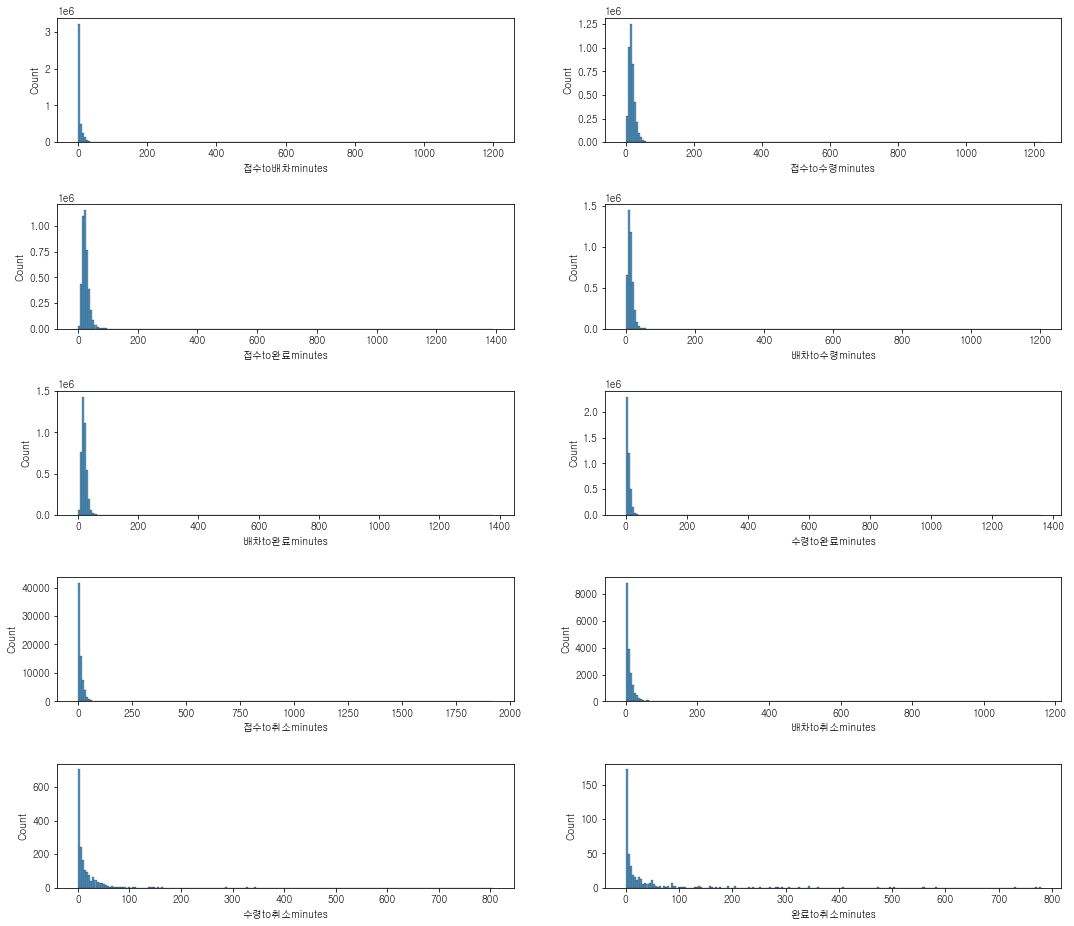

In [46]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(min_cols):
    plt.subplot(12, 2, i+1)
    plt.subplots_adjust(hspace=0.5)
    #plt.title("{}".format(n))
    sns.histplot(data=dlvr_call, x=n, bins=200)

취소 분포를 제외하고는 대체로 60분 안에 끝납니다. 이상치를 전부 제외시켜야겠습니다.

In [47]:
remove_cols = ['접수to배차minutes','접수to수령minutes', '접수to완료minutes',
               '배차to수령minutes', '배차to완료minutes','수령to완료minutes']

In [48]:
dlvr = dlvr_call.copy()

In [49]:
# z-score를 구하고 3이 넘어가는 값을 제외하겠습니다.
print(dlvr_call.shape)
for col in remove_cols:
    mean_ = dlvr[col].mean()
    std_ = dlvr[col].std()
    dlvr.loc[:, 'temp'] = abs((dlvr.loc[:, col] - mean_) / std_)
    dlvr = dlvr.loc[dlvr.temp < 3]
    print(dlvr.shape)
dlvr.drop(['temp'], axis=1, inplace=True)

(4296271, 57)
(4204928, 58)
(4163058, 58)
(4144176, 58)
(4094605, 58)
(4063034, 58)
(4024447, 58)


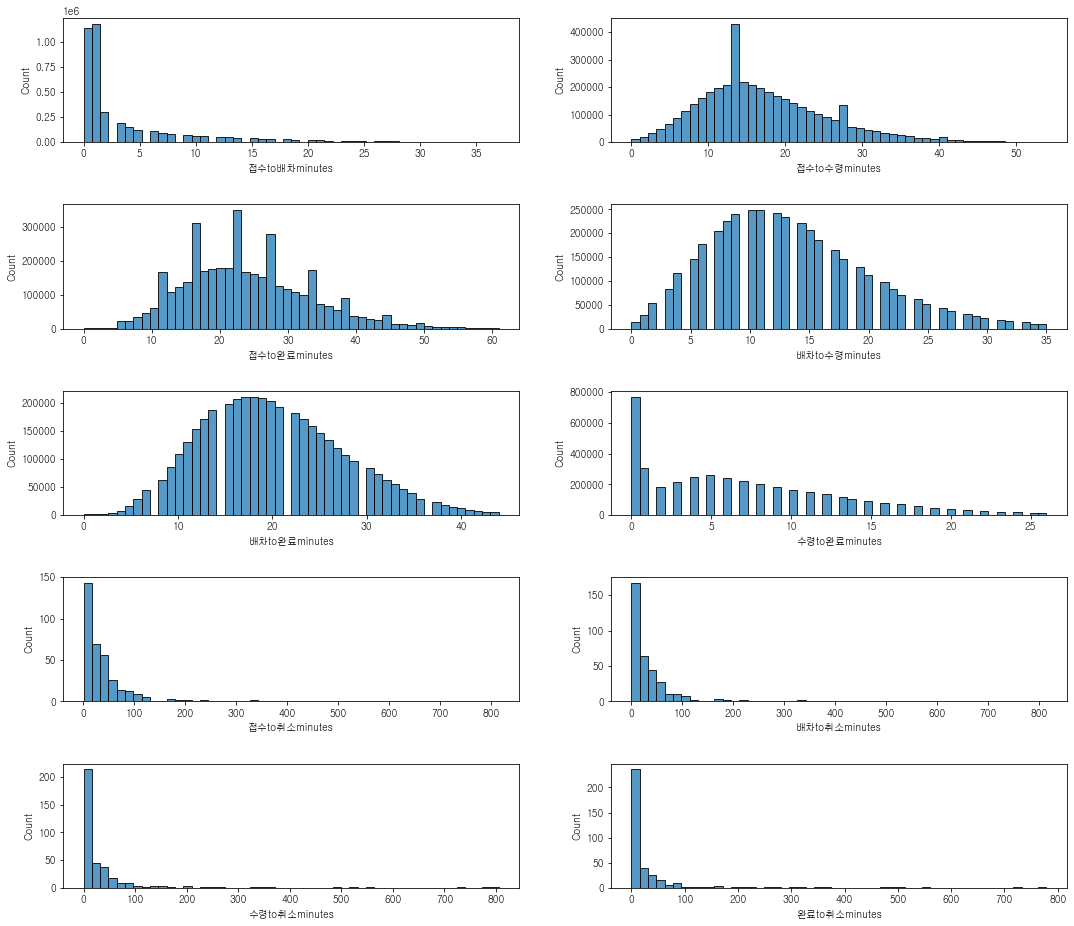

In [50]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(min_cols):
    plt.subplot(12, 2, i+1)
    plt.subplots_adjust(hspace=0.5)
    #plt.title("{}".format(n))
    sns.histplot(data=dlvr, x=n, bins=50)

In [51]:
# 취소 레코드를 지운 df를 하나 더 만들어주겠습니다.

dlvr_uncanceled = dlvr.loc[dlvr.배달취소시간.isnull()]
dlvr_uncanceled.shape

(4024088, 57)

In [52]:
# 취소에 대해서도 알아봐야겠습니다.

dlvr_canceled = dlvr_call.loc[~dlvr_call.배달취소시간.isnull()]
dlvr_canceled.shape

(75279, 57)

## ALL_SHOP_DATA

### PREPROCESSING

In [83]:
all_shop_df = pd.read_csv(r'C:\Users\Wyatt\wyatt37\data\ktVisual\fulldata_07_24_04_P.csv', encoding='cp949')

In [84]:
all_shop_df.shape

(1950134, 48)

In [85]:
all_shop_df.head()

번호 개방서비스명     개방서비스id  개방자치단체코드                    관리번호     인허가일자  인허가취소일자  \
0   1  일반음식점  07_24_04_P   3600000  3600000-101-2014-00100  20140508      NaN   
1   2  일반음식점  07_24_04_P   3600000  3600000-101-2014-00059  20140319      NaN   
2   3  일반음식점  07_24_04_P   3600000  3600000-101-2014-00060  20140321      NaN   
3   4  일반음식점  07_24_04_P   3610000  3610000-101-2014-00098  20140612      NaN   
4   5  일반음식점  07_24_04_P   3610000  3610000-101-2012-00009  20120119      NaN   

   영업상태구분코드  영업상태명  상세영업상태코드 상세영업상태명 폐업일자  휴업시작일자  휴업종료일자  재개업일자  \
0         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   
1         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   
2         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   
3         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   
4         1  영업/정상         1      영업  NaN     NaN     NaN    NaN   

          소재지전화   소재지면적   소재지우편번호                       소재지전체주소  \
0           NaN   99.00  502831.0     광주광역시 서구 풍암동 682-1번지 (1층)   
1           NaN   82.60  502834.0       광주광역시 서구 화정동 70-61 (1층)   
2           NaN   26.40  502837.0     광주광역시 서구 화정동 332-9번지 (1층)   
3  062 369 1582  118.98  503831.0  광주광역시 남구 월산동 1048-182번지 (1층)   
4           NaN   85.00  503822.0         광주광역시 남구 양림동 374번지 2층   

                            도로명전체주소  도로명우편번호     사업장명          최종수정시점 데이터갱신구분  \
0      광주광역시 서구 송풍로17번길 5, 1층 (풍암동)  62052.0    라캄파넬라  20170207142150       I   
1    광주광역시 서구 내방로350번길 10, 1층 (화정동)  61977.0       명가  20201230103940       U   
2  광주광역시 서구 월드컵4강로116번길 5, 1층 (화정동)  61984.0     승진이네  20191230101442       U   
3       광주광역시 남구 군분로 26-1, 1층 (월산동)  61615.0  갈비명가아라네  20200225093539       U   
4         광주광역시 남구 제중로 39, 2층 (양림동)  61643.0      뚱스넥  20190124144413       U   

                 데이터갱신일자 업태구분명        좌표정보(x)        좌표정보(y) 위생업태명  남성종사자수  \
0  2018-08-31 23:59:59.0   경양식  187771.639116  179969.196777   경양식     NaN   
1  2021-01-01 02:40:00.0    한식  188873.020499   184152.82843    한식     NaN   
2  2020-01-01 02:40:00.0    한식  188322.201767  183130.570776    한식     NaN   
3  2020-02-27 02:40:00.0    한식  190363.418899  181905.028328    한식     NaN   
4  2019-01-26 02:40:00.0    한식  192085.702260  182111.703093    한식     NaN   

   여성종사자수 영업장주변구분명 등급구분명 급수시설구분명  총종업원수  본사종업원수  공장사무직종업원수  공장판매직종업원수  \
0     NaN      NaN   NaN   상수도전용    NaN     NaN        NaN        NaN   
1     NaN      NaN   NaN   상수도전용    NaN     NaN        NaN        NaN   
2     NaN      NaN   NaN   상수도전용    NaN     NaN        NaN        NaN   
3     NaN       기타    자율     NaN    NaN     NaN        NaN        NaN   
4     2.0       기타    기타   상수도전용    NaN     NaN        NaN        NaN   

   공장생산직종업원수 건물소유구분명  보증액  월세액 다중이용업소여부   시설총규모 전통업소지정번호 전통업소주된음식  홈페이지  \
0        NaN     NaN  NaN  NaN        N   99.00      NaN      NaN   NaN   
1        NaN     NaN  NaN  NaN        N   82.60      NaN      NaN   NaN   
2        NaN     NaN  NaN  NaN        N   26.40      NaN      NaN   NaN   
3        NaN     NaN  NaN  NaN        N  118.98      NaN      NaN   NaN   
4        NaN     NaN  NaN  NaN        N   85.00      NaN      NaN   NaN   

   Unnamed: 47  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [86]:
all_shop_df.describe().T

count          mean            std           min  \
번호           1950134.0  9.750675e+05  562955.339266  1.000000e+00   
개방자치단체코드     1950134.0  4.039037e+06  864071.445201  3.000000e+06   
인허가일자        1950134.0  2.004766e+07  170370.353996  1.992000e+03   
인허가취소일자            0.0           NaN            NaN           NaN   
영업상태구분코드     1950134.0  2.302796e+00       0.953056  1.000000e+00   
상세영업상태코드     1950134.0  1.651398e+00       0.476528  1.000000e+00   
휴업시작일자             0.0           NaN            NaN           NaN   
휴업종료일자             0.0           NaN            NaN           NaN   
재개업일자              0.0           NaN            NaN           NaN   
소재지우편번호      1886166.0  4.164664e+05  205535.733557  1.000110e+05   
도로명우편번호      1102899.0  2.887881e+04   18650.174584  1.000000e+03   
좌표정보(x)      1847456.0  2.449693e+05   77036.122816 -9.184002e+03   
남성종사자수       1024796.0  1.908985e-01       1.007101 -1.000000e+00   
여성종사자수       1040118.0  3.212357e-01       1.025029 -1.000000e+00   
총종업원수          17800.0  0.000000e+00       0.000000  0.000000e+00   
본사종업원수         48796.0  0.000000e+00       0.000000  0.000000e+00   
공장사무직종업원수      48792.0  0.000000e+00       0.000000  0.000000e+00   
공장판매직종업원수      48792.0  0.000000e+00       0.000000  0.000000e+00   
공장생산직종업원수      48792.0  0.000000e+00       0.000000  0.000000e+00   
보증액            48796.0  0.000000e+00       0.000000  0.000000e+00   
시설총규모        1930612.0  7.562695e+01     200.771566  0.000000e+00   
홈페이지               0.0           NaN            NaN           NaN   
Unnamed: 47        0.0           NaN            NaN           NaN   

                      25%           50%           75%           max  
번호           4.875342e+05  9.750675e+05  1.462601e+06  1.950134e+06  
개방자치단체코드     3.290000e+06  3.820000e+06  4.640000e+06  6.520000e+06  
인허가일자        1.998041e+07  2.004102e+07  2.013113e+07  9.187061e+07  
인허가취소일자               NaN           NaN           NaN           NaN  
영업상태구분코드     1.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  
상세영업상태코드     1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  
휴업시작일자                NaN           NaN           NaN           NaN  
휴업종료일자                NaN           NaN           NaN           NaN  
재개업일자                 NaN           NaN           NaN           NaN  
소재지우편번호      2.009110e+05  4.299300e+05  6.078040e+05  7.998230e+05  
도로명우편번호      1.211200e+04  2.649400e+04  4.600800e+04  6.364400e+04  
좌표정보(x)      1.918238e+05  2.074521e+05  3.045117e+05  5.461052e+05  
남성종사자수       0.000000e+00  0.000000e+00  0.000000e+00  1.200000e+02  
여성종사자수       0.000000e+00  0.000000e+00  0.000000e+00  1.120000e+02  
총종업원수        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
본사종업원수       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
공장사무직종업원수    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
공장판매직종업원수    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
공장생산직종업원수    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
보증액          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
시설총규모        2.761000e+01  4.930000e+01  9.142000e+01  1.080480e+05  
홈페이지                  NaN           NaN           NaN           NaN  
Unnamed: 47           NaN           NaN           NaN           NaN

In [87]:
# 필요없는 컬럼을 드랍합니다.
all_shop_df.drop(['인허가취소일자', '휴업시작일자', '휴업종료일자', '재개업일자', '홈페이지', 'Unnamed: 47'], axis=1, inplace=True)

In [88]:
all_shop_df.loc[all_shop_df.소재지전체주소.isnull()].도로명전체주소.apply(lambda x: x.split(' ')[0]).value_counts()

전라남도       1050
충청남도        482
충청북도        473
경기도         409
경상남도        374
전라북도        247
서울특별시       237
경상북도        224
강원도         208
울산광역시       125
제주특별자치도     123
인천광역시        86
부산광역시        46
대전광역시        27
대구광역시        25
세종특별자치시      18
광주광역시         9
Name: 도로명전체주소, dtype: int64

- 소재지전체주소의 결측치가 약 5천건 존재하는데, 서울시의 결측치가 237건이기에 drop을 해주겠습니다.
- 도로명주소를 넣어주려면 동단위까지 주소가 나오지 않기 때문에(사실 번거롭기 때문에) 제외를 해주겠습니다.

In [89]:
# 소재지전체주소에 결측치가 있는 레코드를 드랍해줍니다.
all_shop_df = all_shop_df.loc[~all_shop_df.소재지전체주소.isnull()].reset_index()

#### 인허가일자

In [90]:
all_shop_df.인허가일자.max(), all_shop_df.인허가일자.min()

(91870608, 1992)

- 1086년이면 고려시대...9187년이면...인류가 멸망했을지도...

In [91]:
all_shop_df = all_shop_df.loc[(all_shop_df.인허가일자 >= 19700000) & (all_shop_df.인허가일자 <= 20210731)].reset_index(drop=True)

In [93]:
# datetime64 타입으로 변환해주겠습니다.
new_date = []
for i in tqdm(range(len(all_shop_df))):
    try:
        new_date.append(pd.to_datetime(str(all_shop_df.인허가일자[i]) + ' 00:00:00'))
    except:
        new_date.append('drop')

100%|█████████████████████████████████████████████████████████████████████| 1944472/1944472 [02:14<00:00, 14423.73it/s]


In [94]:
all_shop_df['new_date'] = new_date

In [95]:
all_shop_df = all_shop_df.loc[all_shop_df.new_date != 'drop'].reset_index(drop=True)

In [96]:
all_shop_df['인허가일자'] = pd.to_datetime(all_shop_df.new_date)

In [97]:
all_shop_df['인허가일자년'] = all_shop_df.인허가일자.dt.year.astype(str)
all_shop_df['인허가일자월'] = all_shop_df.인허가일자.dt.month.astype(str)
all_shop_df['인허가일자일'] = all_shop_df.인허가일자.dt.day
all_shop_df['인허가일자요일'] = all_shop_df.인허가일자.dt.weekday
all_shop_df['인허가일자주'] = all_shop_df.인허가일자.dt.weekofyear

In [98]:
# 시간연속성을위해 연월 컬럼을 만듭니다.
all_shop_df.loc[~all_shop_df.인허가일자월.isin(['10', '11', '12']), '인허가일자년월'] = all_shop_df.인허가일자년 + '0' + all_shop_df.인허가일자월
all_shop_df.loc[all_shop_df.인허가일자월.isin(['10', '11', '12']), '인허가일자년월'] = all_shop_df.인허가일자년 + all_shop_df.인허가일자월

### 폐업일자

폐업일자는 nan값이 존재하기 때문에 object로 되어 있습니다.

In [99]:
all_shop_df['폐업일자'] = all_shop_df.폐업일자.fillna(-1)

In [100]:
all_shop_df['폐업일자'] = all_shop_df.폐업일자.apply(lambda x: str(x).replace(' ', '0'))

In [101]:
all_shop_df['폐업일자'] = all_shop_df.폐업일자.astype(float)
all_shop_df['폐업일자'] = all_shop_df.폐업일자.astype(int)

In [103]:
# datetime64 타입으로 변환해주겠습니다.
new_date = []
for i in tqdm(range(len(all_shop_df))):
    try:
        new_date.append(pd.to_datetime(str(all_shop_df.폐업일자[i]) + ' 00:00:00'))
    except:
        new_date.append(np.nan)

100%|█████████████████████████████████████████████████████████████████████| 1944453/1944453 [02:50<00:00, 11434.66it/s]


In [104]:
all_shop_df['new_date'] = new_date

In [105]:
all_shop_df['폐업일자'] = pd.to_datetime(all_shop_df.new_date)

In [106]:
all_shop_df['폐업일자년'] = all_shop_df.폐업일자.dt.year.astype(str)
all_shop_df['폐업일자월'] = all_shop_df.폐업일자.dt.month.astype(str)
all_shop_df['폐업일자일'] = all_shop_df.폐업일자.dt.day
all_shop_df['폐업일자요일'] = all_shop_df.폐업일자.dt.weekday
all_shop_df['폐업일자주'] = all_shop_df.폐업일자.dt.weekofyear

In [107]:
# 시간연속성을위해 연월 컬럼을 만듭니다.
all_shop_df.loc[~all_shop_df.폐업일자월.isin(['10', '11', '12']), '폐업일자년월'] = all_shop_df.폐업일자년 + '0' + all_shop_df.폐업일자월
all_shop_df.loc[all_shop_df.폐업일자월.isin(['10', '11', '12']), '폐업일자년월'] = all_shop_df.폐업일자년 + all_shop_df.폐업일자월

In [108]:
all_shop_df['폐업일자년월'] = all_shop_df.폐업일자년월.replace('nan0nan', np.nan)

In [109]:
all_shop_df['폐업일자년월'] = all_shop_df.폐업일자년월.apply(lambda x: str(x).replace('.0', ''))

In [110]:
# 2021-07-31 이후에 폐업한 데이터가 30건 가량 있습니다...
# 1970-01-01 이전에 폐업한 데이터도 있습니다.. 다 날려줍니다. 전부 1899 로 입력되어 있는 것으로 봐서 오류가 있었던 것 같습니다.
all_shop_df = all_shop_df.loc[~(all_shop_df.폐업일자 > '2021-07-31') & ~(all_shop_df.폐업일자 < '1970-01-01')]

### 영업기간(영업, 폐업 따로)

- 인허가일자로부터 폐업일자, 폐업하지 않았다면 2021-07-31 일자 기준으로 영업기간을 산출하겠습니다.

In [111]:
# 폐업 업체의 영업기간을 산출해보겠습니다.
all_shop_df['폐업업체영업기간'] = all_shop_df.폐업일자 - all_shop_df.인허가일자

In [112]:
# 영업 업체의 영업기간을 산출해보겠습니다.
temp = (pd.to_datetime('2021-07-31 00:00:00')
        - all_shop_df.loc[all_shop_df.상세영업상태명 == '영업'].인허가일자).to_frame().rename({'인허가일자':'영업업체영업기간'},
                                                                                axis=1)
all_shop_df = pd.concat([all_shop_df, temp], axis=1)

### 소재지전체주소

In [113]:
# nan값이 아닌데도 주소가 비어있는 친구들이 있습니다....
# 이놈들 때문에 apply lambda도 에러고, .loc 도 에러입니다...
# 어쩔 수 없이 가장 리소스 많이 먹는 for문을 돌립니다.

add_0 = [] # 광역시도
add_1 = [] # 시군구
add_2 = [] # 읍면동
add_3 = [] # 번지

for i in tqdm(range(len(all_shop_df))):
    try:
        add_0.append(all_shop_df.소재지전체주소[i].split(' ')[0])
    except:
        add_0.append(np.nan)
    try:
        add_1.append(all_shop_df.소재지전체주소[i].split(' ')[1])
    except:
        add_1.append(np.nan)
    try:
        add_2.append(all_shop_df.소재지전체주소[i].split(' ')[2])
    except:
        add_2.append(np.nan)
    try:
        add_3.append(all_shop_df.소재지전체주소[i].split(' ')[3])
    except:
        add_3.append(np.nan)

100%|█████████████████████████████████████████████████████████████████████| 1943537/1943537 [02:08<00:00, 15125.71it/s]


In [114]:
len(all_shop_df), len(add_0), len(add_1), len(add_2), len(add_3)

(1943537, 1943537, 1943537, 1943537, 1943537)

In [115]:
# 만든 리스트를 변수로 넣어줍니다.
all_shop_df['소재지주소광역시도'] = add_0
all_shop_df['소재지주소시군구'] = add_1
all_shop_df['소재지주소읍면동'] = add_2
all_shop_df['소재지주소번지'] = add_3

In [116]:
# 주소지가 그래도 이상한 애들이 45건 있습니다. 제거하겠습니다.
all_shop_df = all_shop_df.loc[all_shop_df.소재지주소광역시도.isin(['서울특별시', '경기도', '경상남도', '부산광역시', '경상북도', '인천광역시',
                                           '강원도', '대구광역시', '충청남도', '전라남도', '충청북도', '전라북도', '대전광역시',
                                           '광주광역시', '울산광역시', '제주특별자치도', '세종특별자치시'])]

### 업태구분명

- 업태구분명 중에 음식점이 아닌 업종이 있습니다. 제거하겠습니다.
- 주로 술집...이동판매...뷔페...음식점과 상관없는 업종을 제거하겠습니다.

In [117]:
all_shop_df = all_shop_df.loc[~all_shop_df.업태구분명.isin(['정종/대포집/소주방', '감성주점', '기타 휴게음식점',
                                                       '룸살롱', '이동조리', '식품자동판매기영업', '전화권유판매',
                                                       '식품등 수입판매업', '관광호텔', '편의점', '즉석판매제조가공업',
                                                       '도매업(유통)', '방문판매', '집단급식소 식품판매업', '간이주점',
                                                       '식품소분업', '식품제조가공업', '193959.150482967', '식품첨가물제조업',
                                                       '제과점영업', '다방', '커피숍', '일반조리판매'])]

In [118]:
all_shop_df.업태구분명.unique()

array(['경양식', '한식', '기타', '김밥(도시락)', '중국식', '까페', '뷔페식', '호프/통닭', '분식',
       '일식', '패밀리레스트랑', '외국음식전문점(인도,태국등)', '식육(숯불구이)', '횟집', '통닭(치킨)',
       '패스트푸드', '회집', '탕류(보신용)', '전통찻집', '라이브카페', '복어취급', '출장조리', '냉면집',
       nan, '키즈카페'], dtype=object)

- 일부 겹치는 업종명이 있습니다. 정리를 해주겠습니다.
- 회집 -> 횟집

In [119]:
all_shop_df.loc[all_shop_df.업태구분명 == '회집', '업태구분명'] = '횟집'

### 마무리

In [120]:
# 쓰잘데기 없는 컬럼이 너무 많습니다. 일단 지워줍니다.
all_shop_df.drop(['개방서비스명', '개방서비스id', '영업상태구분코드', '영업상태명', '상세영업상태코드', '소재지전화',
                  '소재지전체주소', '도로명전체주소', '급수시설구분명'], axis=1, inplace=True)

In [121]:
all_shop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899216 entries, 0 to 1944452
Data columns (total 53 columns):
 #   Column     Dtype          
---  ------     -----          
 0   index      int64          
 1   번호         int64          
 2   개방자치단체코드   int64          
 3   관리번호       object         
 4   인허가일자      datetime64[ns] 
 5   상세영업상태명    object         
 6   폐업일자       datetime64[ns] 
 7   소재지면적      object         
 8   소재지우편번호    float64        
 9   도로명우편번호    float64        
 10  사업장명       object         
 11  최종수정시점     object         
 12  데이터갱신구분    object         
 13  데이터갱신일자    object         
 14  업태구분명      object         
 15  좌표정보(x)    float64        
 16  좌표정보(y)    object         
 17  위생업태명      object         
 18  남성종사자수     float64        
 19  여성종사자수     float64        
 20  영업장주변구분명   object         
 21  등급구분명      object         
 22  총종업원수      float64        
 23  본사종업원수     float64        
 24  공장사무직종업원수  float64        
 25  공장판매직종업원수  float64

In [122]:
all_shop_df.head(1)

index  번호  개방자치단체코드                    관리번호      인허가일자 상세영업상태명 폐업일자  소재지면적  \
0      0   1   3600000  3600000-101-2014-00100 2014-05-08      영업  NaT  99.00   

    소재지우편번호  도로명우편번호   사업장명          최종수정시점 데이터갱신구분                데이터갱신일자  \
0  502831.0  62052.0  라캄파넬라  20170207142150       I  2018-08-31 23:59:59.0   

  업태구분명        좌표정보(x)        좌표정보(y) 위생업태명  남성종사자수  여성종사자수 영업장주변구분명 등급구분명  \
0   경양식  187771.639116  179969.196777   경양식     NaN     NaN      NaN   NaN   

   총종업원수  본사종업원수  공장사무직종업원수  공장판매직종업원수  공장생산직종업원수 건물소유구분명  보증액  월세액 다중이용업소여부  \
0    NaN     NaN        NaN        NaN        NaN     NaN  NaN  NaN        N   

   시설총규모 전통업소지정번호 전통업소주된음식 new_date 인허가일자년 인허가일자월  인허가일자일  인허가일자요일  인허가일자주  \
0   99.0      NaN      NaN      NaT   2014      5       8        3      19   

  인허가일자년월 폐업일자년 폐업일자월  폐업일자일  폐업일자요일  폐업일자주 폐업일자년월 폐업업체영업기간  영업업체영업기간  \
0  201405   nan   nan    NaN     NaN    NaN    nan      NaT 2641 days   

  소재지주소광역시도 소재지주소시군구 소재지주소읍면동  소재지주소번지  
0     광주광역시       서구      풍암동  682-1번지

In [123]:
all_shop_df.loc[all_shop_df.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df.loc[all_shop_df.상세영업상태명 == '폐업', 'OC'] = 1

# INVESTIGATION DLVR_CALL

## BASE ANALYSIS

### DELIVERY COUNT

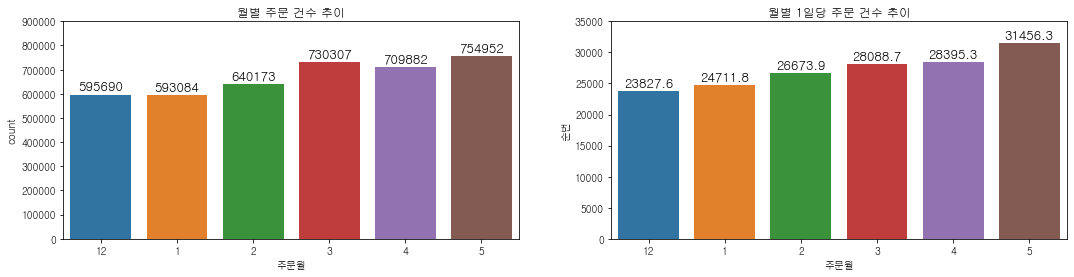

In [402]:
fig = plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plots = sns.countplot(data=dlvr_uncanceled, x='주문월', order=[12, 1, 2, 3, 4, 5])

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top=900000)
plt.title('월별 주문 건수 추이')

# 빨간날(기념일, 일요일 등)을 제외한 날을 영업일수로 산출
# 20년1월부터 20년5월, 19년12월 순. 24, 24, 26, 25, 24, 25
plt.subplot(1, 2, 2)
plots= sns.barplot(data=(dlvr_uncanceled.groupby(['주문월'])['순번'].count() / [24, 24, 26, 25, 24, 25]).reset_index(),
            x='주문월', y='순번', order=[12, 1, 2, 3, 4, 5])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=35000)
plt.title('월별 1일당 주문 건수 추이')

plt.show()

**좌측 그래프**<br>
- 4월을 제외하고서는 꾸준히 증가세를 보였습니다.
- 보통 영업일수가 적은 2월이 다른 월보다 주문건수가 적어야 맞지만, 2020년 2월은 윤달이었기 때문에 영업일수가 29일이었으며, 2020년은 1월에 설날이 있었기 때문에 영업일수가 2월보다 적었습니다.
- 또한 4월은 영업일수가 30일이고(주말포함), 공휴일은 총선과 석가탄신일이 있었습니다. 그렇기에 영업일수가 많이 부족했습니다.
- 영업일수에 대한 영향력을 적용해 살펴본다면 꾸준히 양적성장을 이루고 있다는 것을 알 수 있습니다.
<br>
**우측 그래프**<br>
- 1일당 주문건수로 보면 좌측 그래프에서 언급한 것과 같이 12월부터 5월까지 꾸준히 성장한 것을 확인할 수 있습니다.

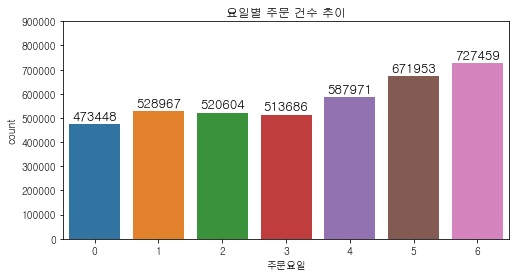

In [91]:
plt.figure(figsize=(8, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='주문요일')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=900000)
plt.title('요일별 주문 건수 추이')
plt.show()

- 요일별로는 주말로 향할수록 배달건수가 급격히 증가합니다.
- 배달건수가 적은 요일은 월, 목요일입니다.

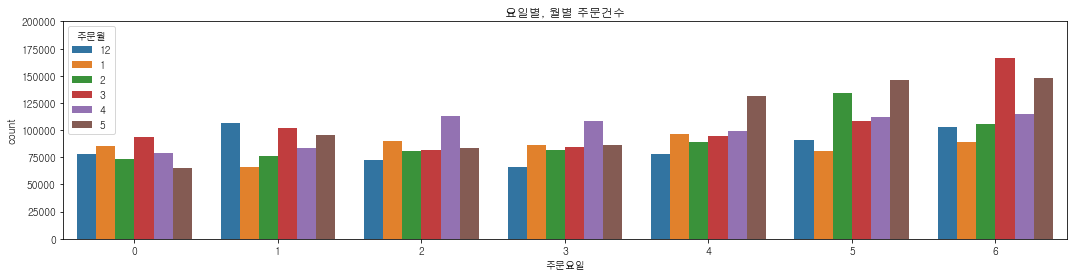

In [115]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='주문요일', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5])
plt.title('요일별, 월별 주문건수')
plt.ylim(top=200000)
plt.show()

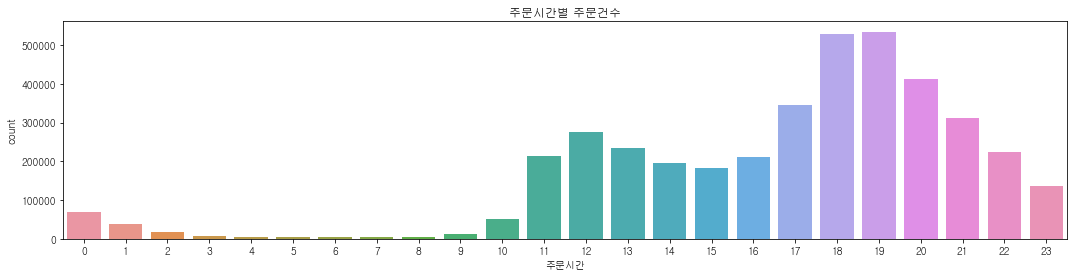

In [117]:
plt.figure(figsize=(18, 4))
sns.countplot(data=dlvr_uncanceled, x='주문시간')
plt.title('주문시간별 주문건수')
plt.show()

- 예상과 크게 다르지 않는 시간대별 주문건수입니다.

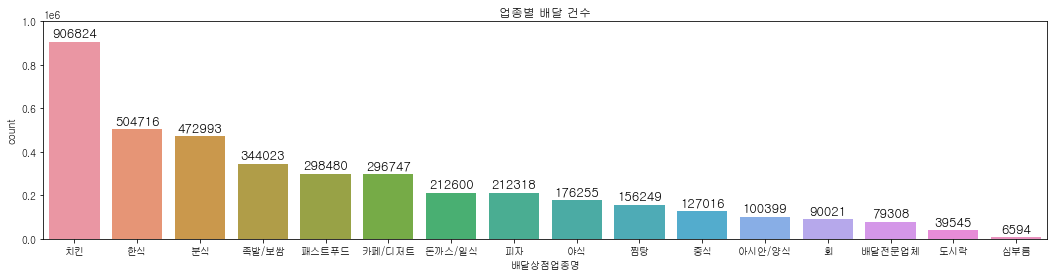

In [87]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='배달상점업종명',
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별 배달 건수')
plt.ylim(top=1000000)
plt.show()

- 역시 치킨은 배달 음식의 최강자입니다.
- 한식, 분식, 족발/보쌈, 패스트푸드가 뒤를 잇습니다.
- 중식은 배달중개업체를 쓰는 경우가 적고 업장에 고용된 배달기사가 있기 때문에 건수가 적은 것으로 판단 됩니다.

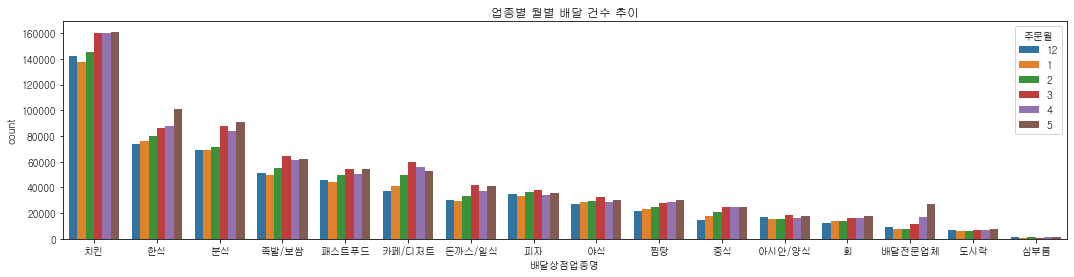

In [91]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='배달상점업종명', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5],
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

plt.title('업종별 월별 배달 건수 추이')
plt.show()

- 치킨은 3, 4, 5월의 주문량이 크게 변하지 않았습니다.
- 주문량이 많이 증가한 업종은 한식입니다. 한식은 매달 꾸준히 증가했으며 5월에 특히 많이 증가했습니다.
- 마찬가지로 꾸준히 증가한 업종은 찜탕입니다.
- 이는 장기화되는 코로나로 인해 치킨이나 패스트푸드, 피자, 돈까스/일식 등 보다는 주식으로 먹는 한식, 찜탕의 수요가 증가한 것으로 추정할 수 있습니다.
- 배달전문업체도 꾸준히 증가했네요?

### DELIVERY CANCEL

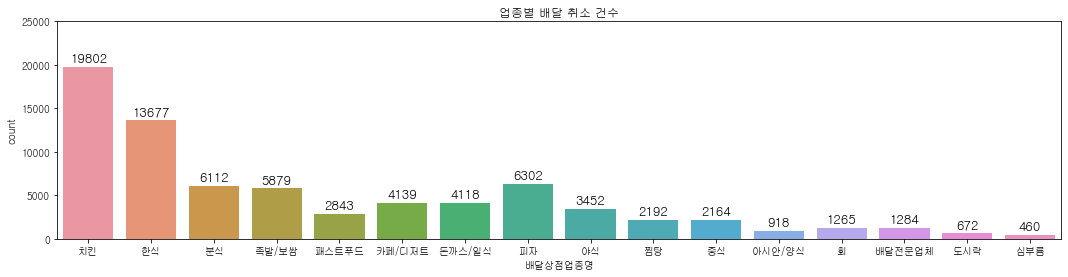

In [96]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_canceled, x='배달상점업종명',
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별 배달 취소 건수')
plt.ylim(top=25000)
plt.show()

- 취소 건수를 살펴보겠습니다.
- 총 주문 건수 대비 한식, 족발/보쌈, 피자 등의 업종에서 취소가 다소 많습니다.
- 패스트푸드는 취소 건수가 적은 편에 속하는 것을 알 수 있습니다.

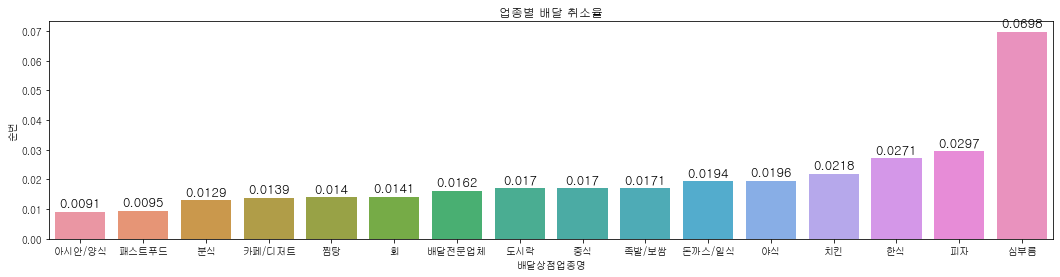

In [423]:
# 취소율을 살펴보겠습니다.
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=(dlvr_canceled.groupby(['배달상점업종명'])['순번'].count() /
                  dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count()).round(4).reset_index().sort_values('순번'),
            x='배달상점업종명', y='순번')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.title('업종별 배달 취소율')
plt.show()

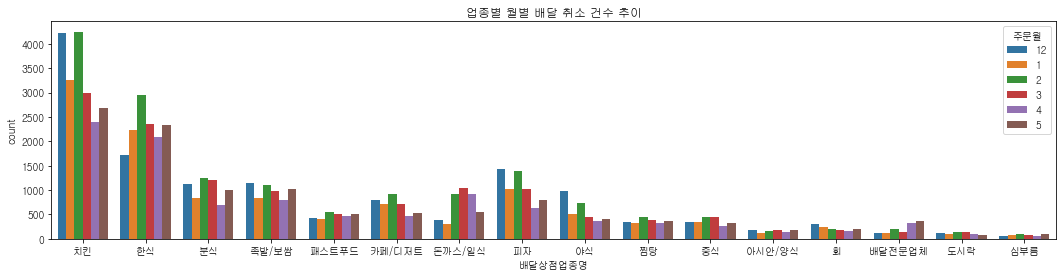

In [98]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_canceled, x='배달상점업종명', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5],
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

plt.title('업종별 월별 배달 취소 건수 추이')
plt.show()

- 전체적으로 12 ~ 2월보다 3 ~ 5월의 취소 건수가 적습니다.
- 다만 대다수의 업종에서 4월보다 5월의 취소건수가 증가하고 있음을 알 수 있습니다.

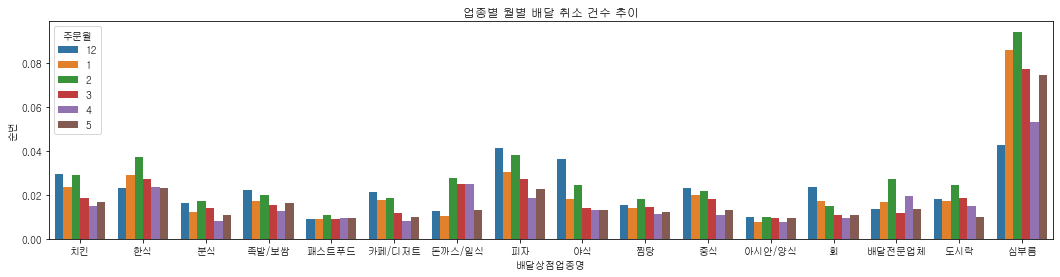

In [426]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=(dlvr_canceled.groupby(['배달상점업종명', '주문월'])['순번'].count() /
                          dlvr_uncanceled.groupby(['배달상점업종명', '주문월'])['순번'].count()).reset_index().round(4),
                    x='배달상점업종명', y='순번', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5],
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

plt.title('업종별 월별 배달 취소율')
plt.show()

- 취소율 관점에서 전체적으로 취소율은 감소중에 있습니다.
- 2월을 기점으로 꾸준히 감소중이며, 5월 들어서 증가한 업종이 존재합니다.

### DELIVERY TIME

**HOUR**

- 16개 업종을 4개씩 살펴보겠습니다.

In [140]:
shop_type = dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index

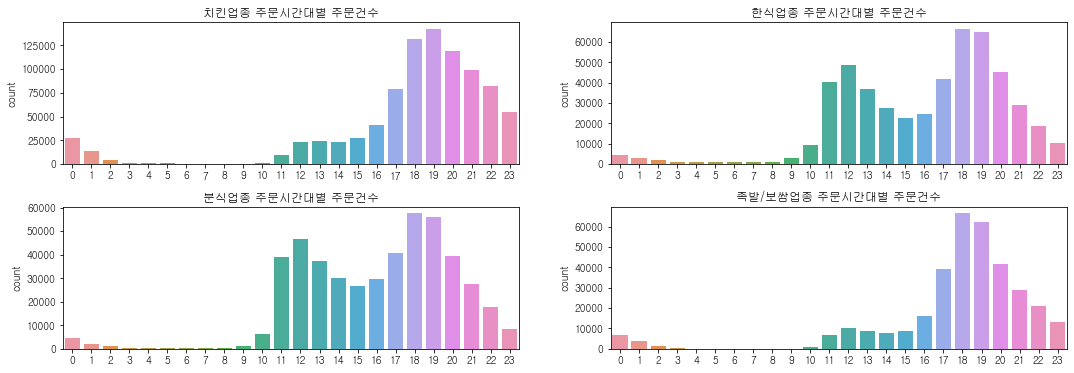

In [147]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type[:4]):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 치킨과 족발/보쌈은 저녁시간에 주문이 몰려 있습니다.
- 분식과 한식은 점심과 저녁 모두 주문이 몰린 쌍봉 형태를 취합니다.

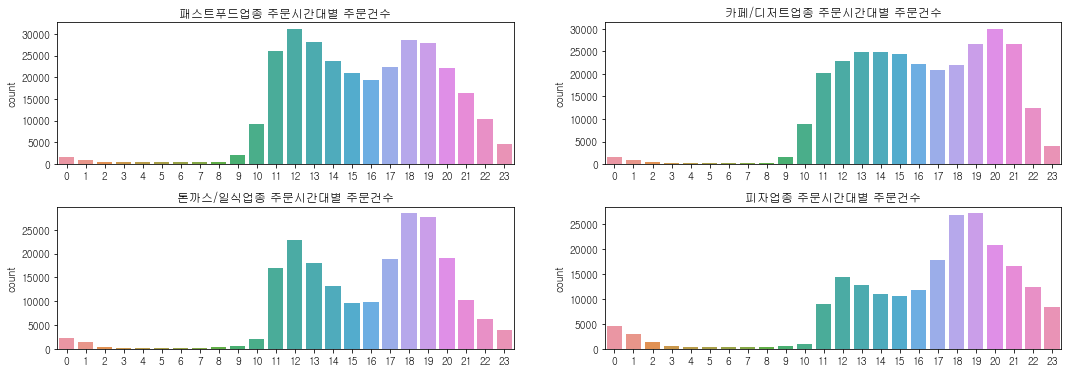

In [148]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type[4:8]):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 패스트푸드도 쌍봉형태이지만 점심시간이 저녁시간보다 주문이 더 몰려 있습니다.
- 카페/디저트 업종은 오전부터 밤까지 꾸준히 주문이 유지 됩니다.

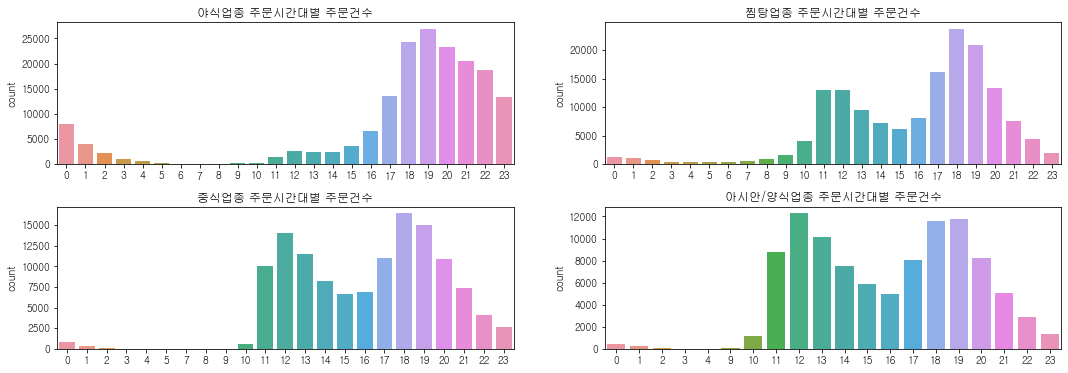

In [149]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type[8:12]):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 야식업종은 의외로 상대적으로 야간에 주문량이 많긴하지만 새벽에 주문이 들어오지는 않네요.
- 중식, 찜탕, 아시안/양식도 쌍봉형태를 취합니다.

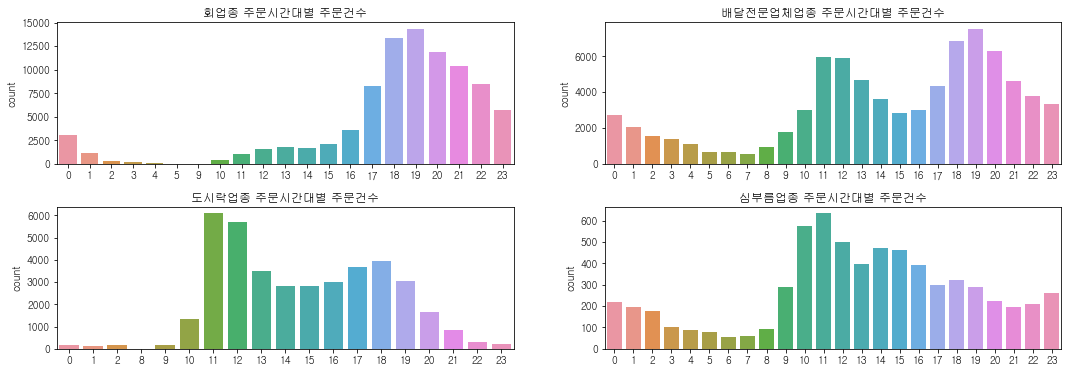

In [150]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type[12:]):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 회는 저녁에만 주문이 몰리는 단봉형태입니다.
- 도시락업종은 점심에 유독 주문량이 몰리는 것으로 보아 회사나 단체 주문 건수의 수요가 많을 것으로 추정됩니다. 평균 주문 금액을 살펴봐야겠습니다.
- 특이한점은 배달전문업체업종과 심부름업종인데 새벽에도 주문이 지속되며, 식사시간대에 수요가 높다는 점입니다.

**WEEKDAY** 

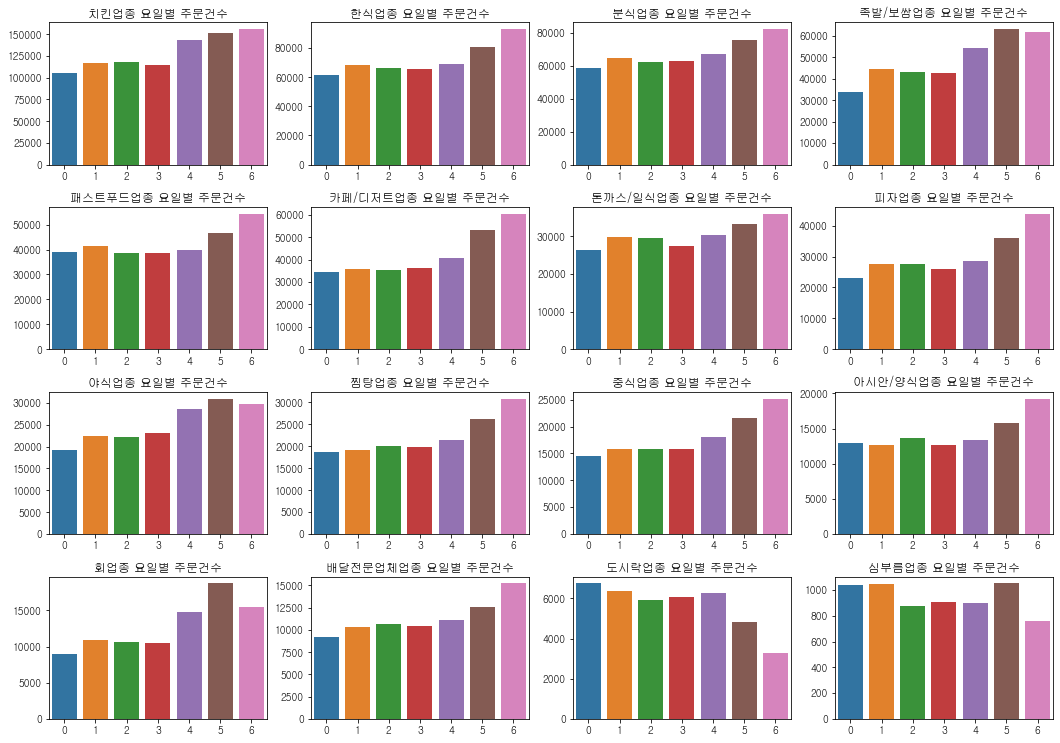

In [156]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_type):
    plt.subplot(12, 4, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문요일')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}업종 요일별 주문건수'.format(n))

- 대다수의 업종이 주말에 주문건수가 늘어나는 패턴을 보입니다.
- 주목할점은 회업종은 토요일이 유독 높다는 것
- 도시락업종은 역시 평일에 주문건수가 많고 주말에는 급격히 줄어든다는 것
- 심부름업종은 월, 화요일에 주문건수가 많고 일요일에는 줄어든다는 것입니다.

### DELIVERY DURATION

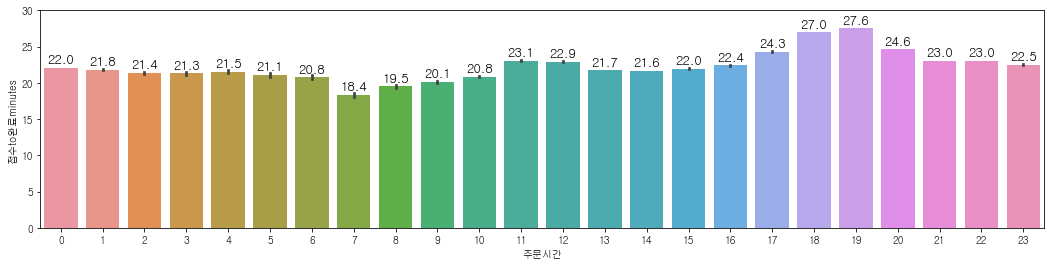

In [76]:
# 시간단위 총배송시간 비교

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='주문시간', y='접수to완료minutes')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=30)
plt.show()

- 상식적으로 교통량이 많을 것이며, 배달건수가 많아지는 시간대에 배송시간이 오래 걸리는 것을 알 수 있습니다.

(0.0, 30.0)

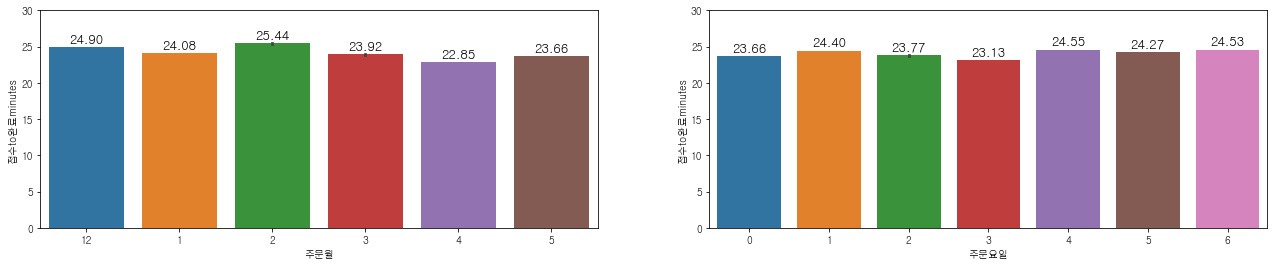

In [397]:
fig = plt.figure(figsize=(22, 4))

plt.subplot(1, 2, 1)
plots = sns.barplot(data=dlvr_uncanceled, x='주문월', y='접수to완료minutes',
           order=[12, 1, 2, 3, 4, 5])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')
plt.ylim(top=30)

plt.subplot(1, 2, 2)
plots = sns.barplot(data=dlvr_uncanceled, x='주문요일', y='접수to완료minutes')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',size=13, xytext=(0, 8), textcoords='offset points')
plt.ylim(top=30)

plt.show()

- 12월부터 2월까지는 총배달소요시간이 약 24 ~ 25분 정도 걸렸지만, 3 ~ 5월 즈음에서는 22 ~ 24분으로 감소하였습니다.
- 이는 업주나 라이더의 숙련도 증가, 라이더 수의 증가 등의 영향이 있을 수 있습니다.
- 주문 요일에 따른 총배달소요시간은 큰 차이나 패턴이 발견되지 않습니다.

## ★DESTINATION

- 중요한 건 서울시이기 때문에 배달상점광역시도명이 서울특별시인 데이터만 보겠습니다.

In [362]:
dlvr_seoul = dlvr.loc[dlvr.배달상점광역시도명 == '서울특별시']

In [363]:
dlvr_seoul['count'] = 1

In [364]:
dlvr_seoul.배달목적지광역시도명.value_counts()

서울특별시    867556
경기도       43190
인천광역시         4
전라북도          2
대전광역시         1
Name: 배달목적지광역시도명, dtype: int64

In [365]:
# 배달목적지에 인천, 전북, 대전은 지워주겠습니다.
dlvr_seoul = dlvr_seoul.loc[dlvr_seoul.배달목적지광역시도명.isin(['서울특별시', '경기도'])]

In [366]:
dlvr_seoul.배달상점시군구명.value_counts()

구로구     337734
금천구     159027
영등포구    141338
도봉구      86117
은평구      79384
동작구      39353
관악구      24749
양천구      15894
노원구      14191
강북구       6531
서초구       2533
성북구       2188
강남구       1491
강동구        108
서대문구        75
강서구         32
송파구          1
Name: 배달상점시군구명, dtype: int64

- 상점 수가 너무 적은 강동구, 서대문구, 강서구, 송파구는 삭제하겠습니다.
- 절대수가 차이가 크니, 무조건 비율로 분석해야겠습니다.

In [367]:
dlvr_seoul = dlvr_seoul.loc[~dlvr_seoul.배달상점시군구명.isin(['강동구', '서대문구', '강서구', '송파구'])]

In [368]:
dlvr_seoul.배달목적지시군구명.value_counts()

구로구        292831
금천구        139196
영등포구       118554
은평구         79382
도봉구         71372
관악구         45570
광명시         40998
동작구         40618
양천구         33157
노원구         26276
강북구          7186
서초구          6765
성북구          3863
강서구          1248
강남구          1103
안양시 만안구      1025
부천시           811
의정부시          311
송파구           128
성동구            76
과천시            39
중랑구            15
남양주시            3
고양시 덕양구         1
종로구             1
서대문구            1
Name: 배달목적지시군구명, dtype: int64

- 배달목적지시군구명에서 통계적으로 유의하지 않은 과천시, 중랑구, 남양주시, 덕양구, 서대문구는 제외하겠습니다.

### 배달목적지비율

In [369]:
dlvr_seoul = dlvr_seoul.loc[~dlvr_seoul.배달목적지시군구명.isin(['과천시', '중랑구', '남양주시',
                                                        '고양시 덕양구', '종로구', '서대문구'])]

In [370]:
temp = pd.pivot_table(data=dlvr_seoul,
                      index='배달상점시군구명',
                      columns='배달목적지시군구명',
                      values='count',
                      aggfunc='sum').fillna(0)

In [371]:
temp['총배달건수'] = temp.sum(axis=1)

In [372]:
for col in list(temp.columns):
    temp['{}_비중'.format(col)] = temp[col] / temp.총배달건수

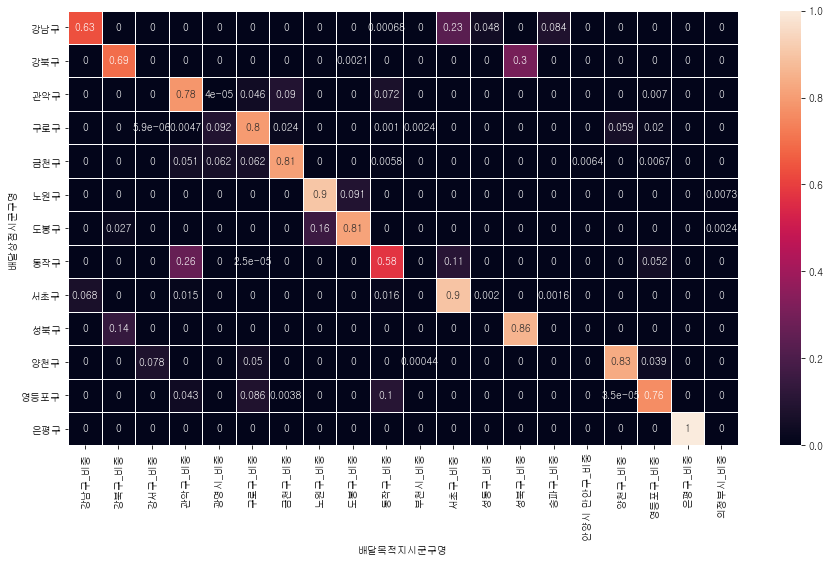

In [373]:
plt.figure(figsize=(15, 8))
sns.heatmap(temp.iloc[:, 21:-1],
           annot=True, linewidths=.5, vmin=0)
plt.show()

- 배달상점이 소재한 지역구 외에 타 지역구로 배달을 많이 가는 강남구, 강북구, 동작구, 영등포구 등이 있습니다.
- 배달상점이 소재한 지역구 내에 배달을 많이 가는 은평구, 서초구, 노원구, 성북구 등이 있습니다.

### 배달소요시간

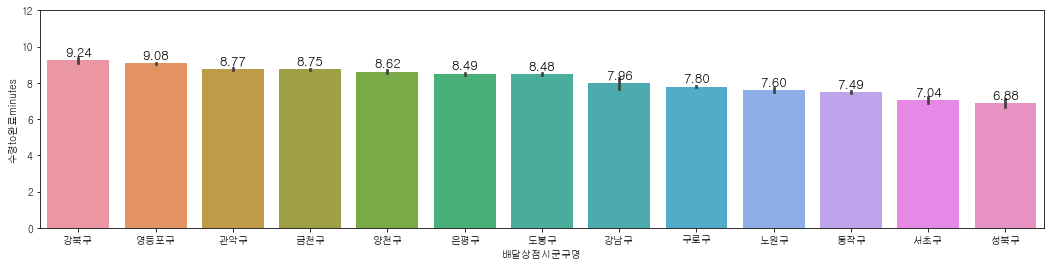

In [528]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점시군구명', y='수령to완료minutes',
                   order=dlvr_seoul.groupby(['배달상점시군구명'])['수령to완료minutes'].mean().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=12)
plt.show()

- 타 지역구 배달 비율이 비교적 높은 강북구, 영등포구는 배달 시간이 오래 걸립니다.
- 그러나 강남구와 동작구는 타 지역구 배달 비율이 높음에도 배달 시간이 매우 짧습니다.


- 타 지역구 배달 비율이 비교적 낮은 은평구, 노원구, 서초구, 성북구는 배달시간이 매우 적게 걸립니다.
- 그나마 은평구가 8.5분이지만, 노원 7.6, 서초 7.0, 성북 6.9 입니다.

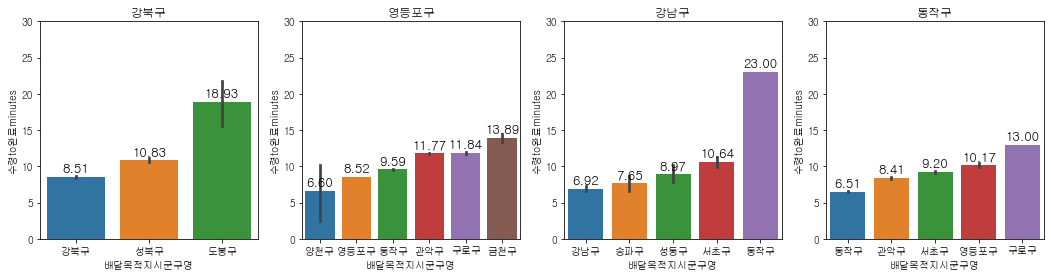

In [541]:
# 타지역 배달 비율이 비교적 높은 지역구
# 강북구, 영등포구, 강남구, 동작구
abroad_goo = ['강북구', '영등포구', '강남구', '동작구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='수령to완료minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['수령to완료minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 30)
    plt.title('{}'.format(n))

- 네 지역 모두 관외 배달 지역 비율이 높지만, 배달시간의 차이가 나는 이유는 기본적인 관내 배달 시간의 차이입니다.
- 강북구와 영등포구는 8.5분, 강남구와 동작구는 각각 6.9, 6.5 분이 걸립니다.


- 관외 지역 배달 시간도 당연히 차이가 큽니다.
- 강북구-> 성북구는 10.8분, 영등포구->동작구는 9.6분, 영등포구->관악구는 11.7분이 걸립니다.
- 반면에 강남구->송파구는 7.7분, 동작구->관악구는 8.4분이 걸립니다.

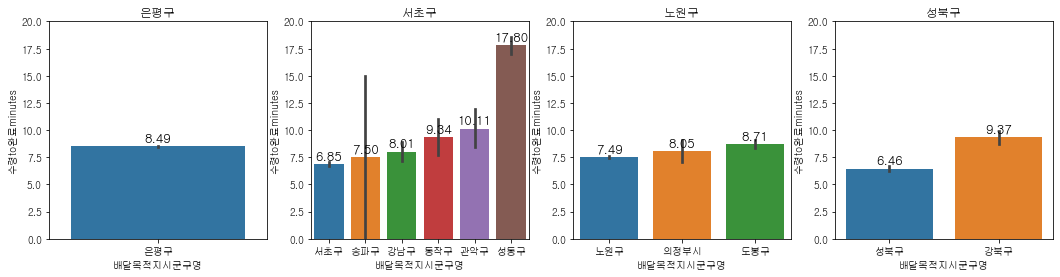

In [545]:
# 타지역 배달 비율이 비교적 낮은 지역구
# 은평구, 서초구, 노원구, 성북구
abroad_goo = ['은평구', '서초구', '노원구', '성북구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='수령to완료minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['수령to완료minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 20)
    plt.title('{}'.format(n))

- 관내 배달 비중이 높은 지역구는 배달 시간도 매우 적게 걸리는 것으로 파악되었습니다.
- 서초구와 성북구는 관내 배달 시간이 채 7분이 되지 않으며, 노원구는 7.5분 가량이 걸리지만 관외 배달시간도 큰 차이가 없습니다.

### 배차소요시간

- 배차소요시간은 라이더가 얼마나 빨리 잡히느냐입니다.
- 배차소요시간을 통해 해당 업종이나 지역이 라이더들에게 인기가 있는지 없는지를 1차적으로 살펴볼 수 있으며,
- 2차적으로는 해당 지역에 라이더의 수가 많느냐 적느냐까지 살펴볼 수 있습니다.
- 배차시간이 적게 걸리는 지역과 업종은 라이더가 많으며 라이더가 선호하는 지역과 업종이라는 것입니다.
- 즉, 업주 입장에서 배차는 빨리 잡히면 잡힐수록 유리합니다.

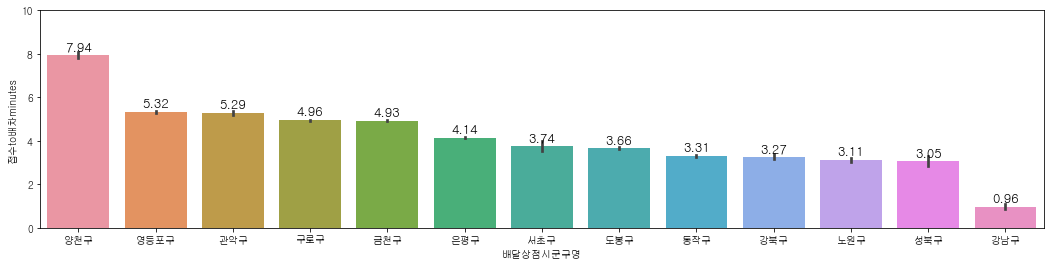

In [548]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점시군구명', y='접수to배차minutes',
                   order=dlvr_seoul.groupby(['배달상점시군구명'])['접수to배차minutes'].mean().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=10)
plt.show()

- 4분을 기점으로 4분보다 적게 걸리면 배차가 빨리 잡히는 편이고, 4분이 넘으면 오래 걸리는 편입니다.
- 강남구와 양천구는 대척점에 있습니다. 1분도 안 걸리는 강남구, 8분이나 걸리는 양천구입니다.


- 타지역 배달 비율이 높은 지역구 중 영등포구를 제외하고, 강북, 강남, 동작구는 전부 4분이 걸리지 않습니다.
- 타지역 배달 비율이 낮은 은평, 서초, 노원, 성북구도 배차 시간은 4분이 걸리지 않습니다.

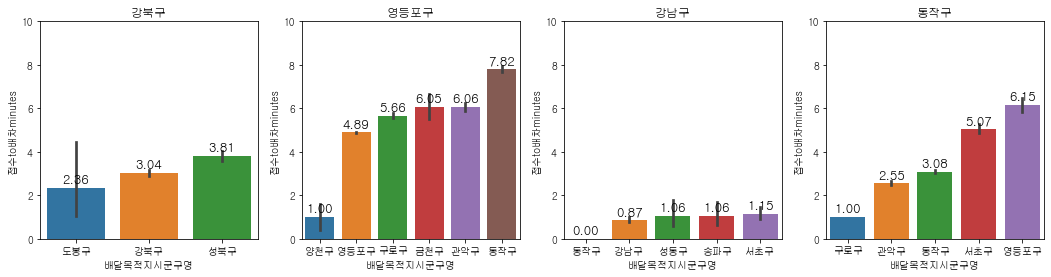

In [550]:
# 타지역 배달 비율이 비교적 높은 지역구
# 강북구, 영등포구, 강남구, 동작구
abroad_goo = ['강북구', '영등포구', '강남구', '동작구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='접수to배차minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['접수to배차minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 10)
    plt.title('{}'.format(n))

- 영등포구, 동작구는 타 지역구 배달 건수에 대해서는 배차 시간이 조금 걸리는 편입니다.
- 강남구는 타 지역구 배달 건수도 1분 밖에 걸리지 않습니다.

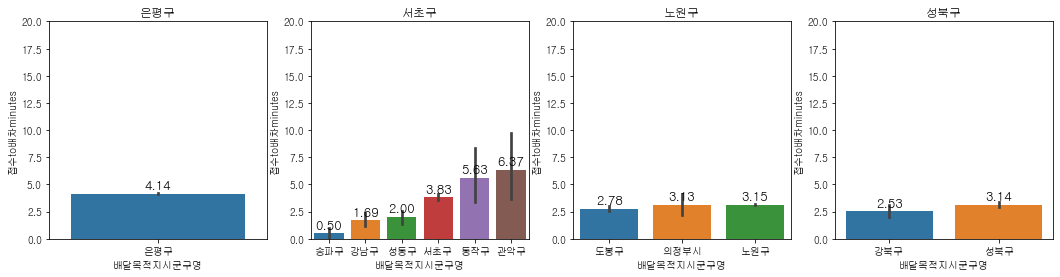

In [551]:
# 타지역 배달 비율이 비교적 낮은 지역구
# 은평구, 서초구, 노원구, 성북구
abroad_goo = ['은평구', '서초구', '노원구', '성북구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='접수to배차minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['접수to배차minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 20)
    plt.title('{}'.format(n))

## ★업종별 배달시간, 배차시간

### 업종별 총소요시간

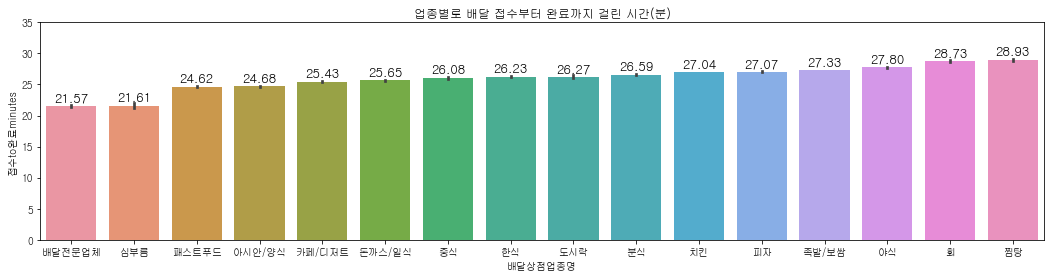

In [381]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점업종명', y='접수to완료minutes',
                    order=dlvr_seoul.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별로 배달 접수부터 완료까지 걸린 시간(분)')
plt.ylim(top=35)
plt.show()

- 접수부터 완료까지 가장 짧은 시간에 배송된 업종은 패스트푸드, 아시안/양식 등입니다.
- 야식, 회, 찜탕 등은 접수부터 완료까지 가장 오랜 시간이 걸린 업종입니다.

### 업종별 배차소요시간

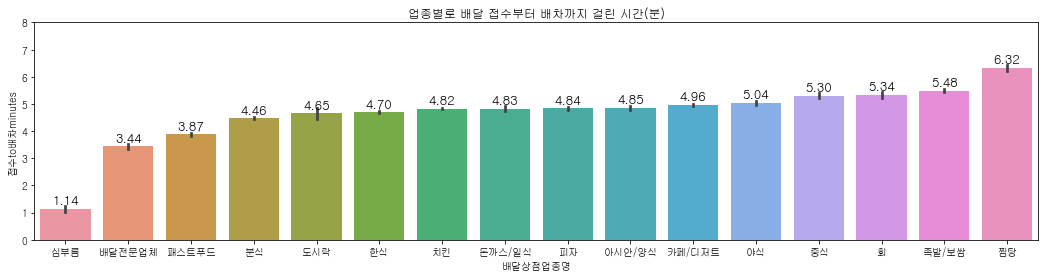

In [376]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점업종명', y='접수to배차minutes',
                    order=dlvr_seoul.groupby(['배달상점업종명'])['접수to배차minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별로 배달 접수부터 배차까지 걸린 시간(분)')
plt.ylim(top=8)
plt.show()

- 배차소요시간은 여전히 패스트푸드가 높습니다. 분식과 도시락, 한식도 상위권에 위치합니다.
- 중식, 회, 족발/보쌈, 찜탕 같은 경우는 배차소요시간이 꽤나 걸립니다.
- 라이더들이 꺼리는 업종이라고 생각할 수 있습니다.

### 업종별 배송소요시간

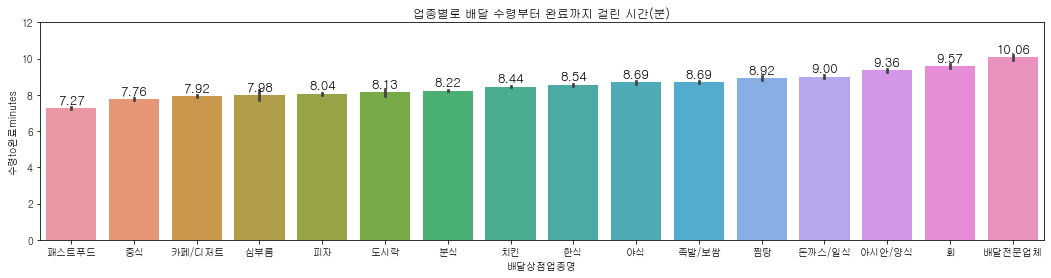

In [379]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점업종명', y='수령to완료minutes',
                   order=dlvr_seoul.groupby(['배달상점업종명'])['수령to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 배달 수령부터 완료까지 걸린 시간(분)')
plt.ylim(top=12)

plt.show()

- 실질적인 배달기사의 배송 소요 시간입니다.
- 패스트푸드는 여전히 가장 짧은 시간을 기록하고 있습니다.
- 의외의 포인트는 중식입니다. 배차는 느리지만 배송은 빠릅니다.
- 아시안/양식 같은 경우도 총소요시간은 상위권이지만 배송 소요시간은 하위권입니다.

### SAMPLE: 구로구, 영등포구, 도봉구

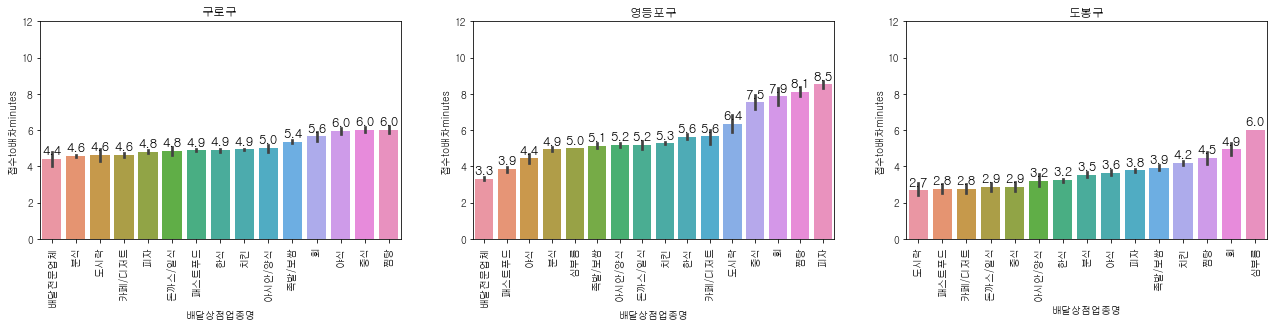

In [393]:
# dlvr_call 데이터가 많은 지역구 중에서 구로구, 영등포, 도봉구를 살펴보겠습니다.
many_goo = ['구로구', '영등포구', '도봉구']
fig = plt.figure(figsize=(22, 4))
for i, n in enumerate(many_goo):
    plt.subplot(1, 3, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달상점업종명', y='접수to배차minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달상점업종명'])['접수to배차minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.1f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 12)
    plt.xticks(rotation=90)
    plt.title('{}'.format(n))

- 구로구와 도봉구는 업종별로 편차가 크지는 않습니다. 영등포구는 패스트푸드와 피자가 4분이 넘게 차이가 납니다.
- 찜탕, 회 등은 3개의 구에서 동일하게 배차가 오래 걸립니다.
- 패스트푸드는 3개의 구에서 동일하게 배차가 빨리 잡힙니다.
- 도시락은 구로와 도봉에서는 배차가 빨리 잡히지만, 영등포에서는 매우 늦게 잡힙니다.
- 중식은 도봉에서는 배차가 빨리 잡히지만 구로와 영등포에서는 매우 늦게 잡힙니다.

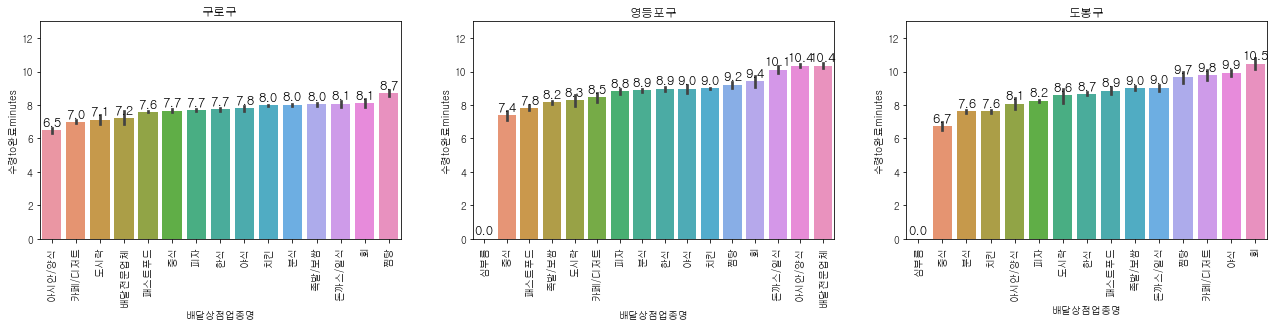

In [396]:
# dlvr_call 데이터가 많은 지역구 중에서 구로구, 영등포, 도봉구를 살펴보겠습니다.
many_goo = ['구로구', '영등포구', '도봉구']
fig = plt.figure(figsize=(22, 4))
for i, n in enumerate(many_goo):
    plt.subplot(1, 3, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달상점업종명', y='수령to완료minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달상점업종명'])['수령to완료minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.1f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 13)
    plt.xticks(rotation=90)
    plt.title('{}'.format(n))

- 중식은 영등포에서 배차가 안잡히는 것과는 다르게 배송시간은 가장 빠릅니다.
- 찜탕은 배차를 꺼리는 것과 마찬가지로 배송시간도 매우 느립니다. 이러한 패턴은 회도 마찬가지입니다.
- 패스트푸드는 도봉구에서 배송시간이 꽤 걸리는 편입니다. 분식과 치킨은 매우 빠른 것과 대조됩니다. 배차 시간과 반대의 패턴을 보입니다.

## ★REVENUE

In [552]:
dlvr_seoul.groupby(['배달상점시군구명', '배달상점업종명', '배달상점ID'])['상품금액'].sum().sort_values(ascending=False).to_frame().head(10)

상품금액
배달상점시군구명 배달상점업종명 배달상점ID             
금천구      분식      S0022229  467764307
         치킨      S0022364  370518999
구로구      패스트푸드   S0022426  327387404
         치킨      S0022418  321806811
도봉구      피자      S0039845  318283500
구로구      패스트푸드   S0022429  303509530
         족발/보쌈   S0022407  293381507
영등포구     아시안/양식  S0021973  266652600
금천구      족발/보쌈   S0019618  266050500
구로구      분식      S0022436  263986900

### 객단가분석

In [428]:
dlvr_seoul_10k = dlvr_seoul.loc[dlvr_seoul.상품금액 <= 100000]

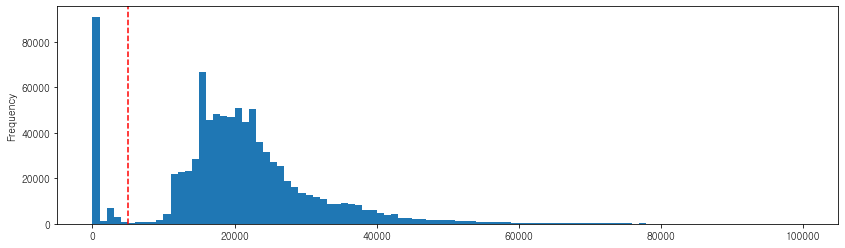

In [429]:
dlvr_seoul_10k.상품금액.plot(kind='hist', bins=100, figsize=(14, 4))
plt.axvline(x = 5000, color = 'r', linestyle = '--',)
plt.show()

In [430]:
# 상품금액 중에서 5000원 이하는 제외하겠습니다.
dlvr_seoul_10k = dlvr_seoul_10k.loc[dlvr_seoul_10k.상품금액 >= 5000]

In [431]:
(
    dlvr_seoul_10k
    .groupby(['배달상점ID', '배달상점업종명', '배달상점시군구명', '배달상점법정동명'])['상품금액', '배달금액'].mean()
    .sort_values(by='상품금액', ascending=False)
).head(50)

상품금액         배달금액
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                           
S0022366 한식      금천구      가산동       76662.500000  4200.000000
S0041063 한식      영등포구     여의도동      73240.000000  3266.666667
S0033425 한식      도봉구      쌍문동       56084.745763  3257.627119
S0039995 도시락     양천구      신정동       55479.411765  4645.098039
S0039988 도시락     영등포구     당산동5가     53704.444444  4777.777778
S0039118 족발/보쌈   영등포구     여의도동      50833.333333  3433.333333
S0022445 한식      구로구      고척동       50700.000000  3300.000000
S0001256 회       구로구      오류동       49125.000000  3350.000000
S0041399 회       영등포구     신길동       47198.347107  3836.776860
S0029511 족발/보쌈   은평구      갈현동       46000.000000  4950.000000
S0000279 회       구로구      고척동       45000.000000  5300.000000
S0026233 야식      도봉구      도봉동       43204.545455  3704.545455
S0028228 회       강북구      미아동       42956.896552  3395.689655
S0041885 회       영등포구     신길동       42927.835052  4711.340206
S0029508 족발/보쌈   은평구      갈현동       42053.016143  4056.074766
S0001682 치킨      구로구      오류동       42000.000000  3300.000000
S0039835 족발/보쌈   도봉구      창동        41949.745547  3383.460560
S0033420 찜탕      도봉구      쌍문동       41862.632870  3486.426819
S0029509 족발/보쌈   은평구      갈현동       41526.315789  4268.623482
S0000277 회       구로구      고척동       41400.000000  3696.000000
S0029507 족발/보쌈   은평구      갈현동       41334.724005  3900.757381
S0000278 회       구로구      고척동       40741.379310  3693.103448
S0021974 족발/보쌈   영등포구     대림동       40627.131783  3579.155900
S0000205 회       구로구      고척동       40595.454545  3374.318182
S0029719 찜탕      영등포구     대림동       40595.238095  3504.761905
S0029167 한식      영등포구     신길동       40581.395349  4220.930233
S0028336 회       도봉구      방학동       40537.913907  3539.238411
S0000004 한식      강북구      미아동       40500.000000  3250.000000
S0022407 족발/보쌈   구로구      개봉동       40226.850250  3609.955506
S0039982 회       영등포구     신길동       40034.482759  3751.724138
S0000045 회       구로구      개봉동       39948.275862  3517.241379
S0019300 족발/보쌈   금천구      가산동       39500.000000  3300.000000
S0035886 족발/보쌈   영등포구     대림동       39375.490196  3417.810458
S0029166 한식      영등포구     신길동       38915.512465  4313.019391
S0022910 족발/보쌈   은평구      갈현동       38895.561358  3664.229765
S0023925 찜탕      영등포구     대림동       38892.204042  3558.229066
S0000282 야식      구로구      궁동        38866.666667  3769.333333
S0001279 족발/보쌈   구로구      오류동       38833.333333  3300.000000
S0022406 족발/보쌈   구로구      개봉동       38813.793103  3596.551724
S0033402 회       은평구      갈현동       38727.082461  3779.321892
S0039106 족발/보쌈   영등포구     여의도동      38453.289110  3372.526258
S0033426 족발/보쌈   도봉구      쌍문동       38439.880952  3899.107143
S0001278 족발/보쌈   구로구      오류동       38290.065604  3402.061856
S0022145 족발/보쌈   구로구      구로동       38265.822785  3817.046414
S0022915 족발/보쌈   은평구      갈현동       38243.010753  3605.376344
S0029506 족발/보쌈   은평구      갈현동       38230.769231  4180.000000
S0001255 회       구로구      오류동       38219.262295  3627.561475
S0022147 족발/보쌈   금천구      독산동       38180.456491  3876.405136
S0028346 한식      도봉구      방학동       38173.038229  3619.416499
S0026001 한식      영등포구     여의도동      38055.611111  3322.222222

In [432]:
# 주평균 주문건수를 뽑아보겠습니다.
(
    dlvr_seoul_10k
    .groupby(['배달상점ID', '배달상점업종명', '배달상점시군구명', '배달상점법정동명', '주문주차'])['count'].sum().unstack()
    .dropna()
)

주문주차                                 -4     -3    -2     -1      0      1   \
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                                           
S0000054 카페/디저트  구로구      개봉동        4.0   18.0  27.0   30.0   25.0   34.0   
S0000058 찜탕      구로구      개봉동        2.0   12.0   7.0    5.0    9.0    8.0   
S0000061 치킨      구로구      개봉동        5.0   21.0  34.0   24.0   35.0   24.0   
S0000097 족발/보쌈   구로구      개봉동        7.0  104.0  90.0   93.0  118.0  100.0   
S0000129 피자      구로구      개봉동        6.0   57.0  53.0   90.0   81.0   61.0   
...                                  ...    ...   ...    ...    ...    ...   
S0040978 야식      영등포구     대림동        2.0   40.0  38.0   49.0   37.0   44.0   
S0041533 치킨      영등포구     신길동       16.0   95.0  84.0  116.0  109.0   83.0   
S0041839 패스트푸드   영등포구     당산동        4.0   56.0  65.0   72.0   68.0   69.0   
S0041861 분식      은평구      갈현동       13.0  119.0  99.0  106.0  107.0   94.0   
S0041885 회       영등포구     신길동        1.0    3.0   2.0    4.0    1.0    4.0   

주문주차                                   2      3     4      5      6      7   \
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                                            
S0000054 카페/디저트  구로구      개봉동        28.0   26.0  43.0   29.0   24.0   23.0   
S0000058 찜탕      구로구      개봉동         9.0    4.0  10.0    7.0    8.0    4.0   
S0000061 치킨      구로구      개봉동        40.0   29.0  37.0   36.0   50.0   33.0   
S0000097 족발/보쌈   구로구      개봉동       103.0   85.0  58.0  131.0  105.0  105.0   
S0000129 피자      구로구      개봉동        90.0   55.0  38.0   75.0   85.0   76.0   
...                                   ...    ...   ...    ...    ...    ...   
S0040978 야식      영등포구     대림동        42.0   51.0  61.0   49.0   37.0   47.0   
S0041533 치킨      영등포구     신길동        92.0   69.0  53.0   70.0   89.0   74.0   
S0041839 패스트푸드   영등포구     당산동        50.0   24.0  20.0   48.0   43.0   45.0   
S0041861 분식      은평구      갈현동        95.0  121.0  76.0  104.0  109.0  115.0   
S0041885 회       영등포구     신길동         3.0    2.0   3.0    3.0    5.0    2.0   

주문주차                                   8      9      10     11     12     13  \
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                                             
S0000054 카페/디저트  구로구      개봉동        15.0   31.0   23.0   27.0   24.0   17.0   
S0000058 찜탕      구로구      개봉동         3.0    9.0    4.0    7.0    5.0   11.0   
S0000061 치킨      구로구      개봉동        33.0   37.0   35.0   21.0   26.0   28.0   
S0000097 족발/보쌈   구로구      개봉동        84.0  128.0  107.0   93.0  102.0  120.0   
S0000129 피자      구로구      개봉동        48.0   50.0   32.0   40.0   38.0   38.0   
...                                   ...    ...    ...    ...    ...    ...   
S0040978 야식      영등포구     대림동        53.0   68.0   48.0   60.0   55.0   43.0   
S0041533 치킨      영등포구     신길동        77.0   91.0   68.0   66.0   65.0   55.0   
S0041839 패스트푸드   영등포구     당산동        47.0   58.0   49.0   36.0   34.0   36.0   
S0041861 분식      은평구      갈현동       127.0  180.0  122.0  131.0   65.0   74.0   
S0041885 회       영등포구     신길동         4.0    8.0    1.0    4.0    3.0    4.0   

주문주차                                  14     15    16    17    18     19  \
배달상점ID   배달상점업종명 배달상점시군구명 배달상점법정동명                                         
S0000054 카페/디저트  구로구      개봉동       24.0   23.0  25.0  23.0  23.0   11.0   
S0000058 찜탕      구로구      개봉동        7.0   10.0  10.0   7.0  17.0    9.0   
S0000061 치킨      구로구      개봉동       42.0   59.0  57.0  50.0  39.0   28.0   
S0000097 족발/보쌈   구로구      개봉동       95.0   88.0  95.0  93.0  92.0  102.0   
S0000129 피자      구로구      개봉동       48.0   30.0  47.0  39.0  57.0   57.0   
...                                  ...    ...   ...   ...   ...    ...   
S0040978 야식      영등포구     대림동       52.0   44.0  56.0  35.0  37.0   52.0   
S0041533 치킨      영등포구     신길동       76.0   74.0  77.0  85.0  88.0   66.0   
S0041839 패스트푸드   영등포구     당산동       41.0   48.0  42.0  39.0  43.0   40.0   
S0041861 분식      은평구      갈현동       95.0  113.0  75.0  56.0  42.0   38.0   
S004

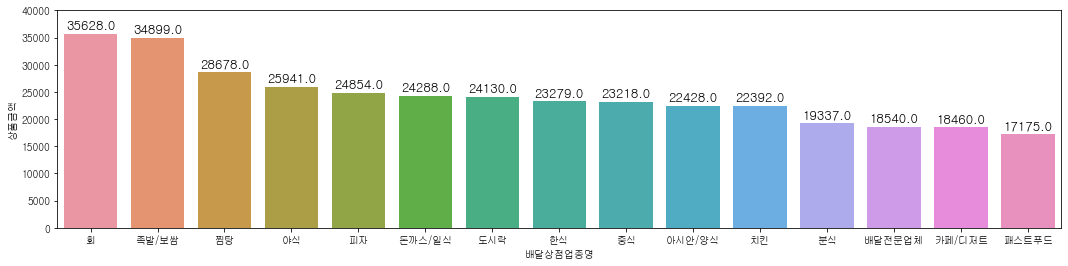

In [433]:
# 업종별 객단가 비교
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul_10k.groupby(['배달상점업종명'])['상품금액'].mean().reset_index().sort_values(by='상품금액',
                                                                                              ascending=False).round(),
            x='배달상점업종명', y='상품금액')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=40000)
plt.show()

- 회나 족발/보쌈, 찜탕 류는 일반적으로 매우 고가의 음식이고 다인분을 주문하기 때문에 객단가가 상대적으로 높습니다.
- 카페/디저트, 분식은 음식의 가격이 저렴한 편이고, 패스트푸드는 1인분 위주로 주문을 하기 때문에 객단가가 상대적으로 낮습니다.
- 피자부터 치킨까지는 보통 2만원 초반부터 2만원 중반의 객단가를 형성하고 있습니다.

### 주차별 객단가 추이

In [453]:
temp = dlvr_seoul_10k.groupby(['배달상점업종명', '주문주차'])['상품금액'].mean().reset_index()

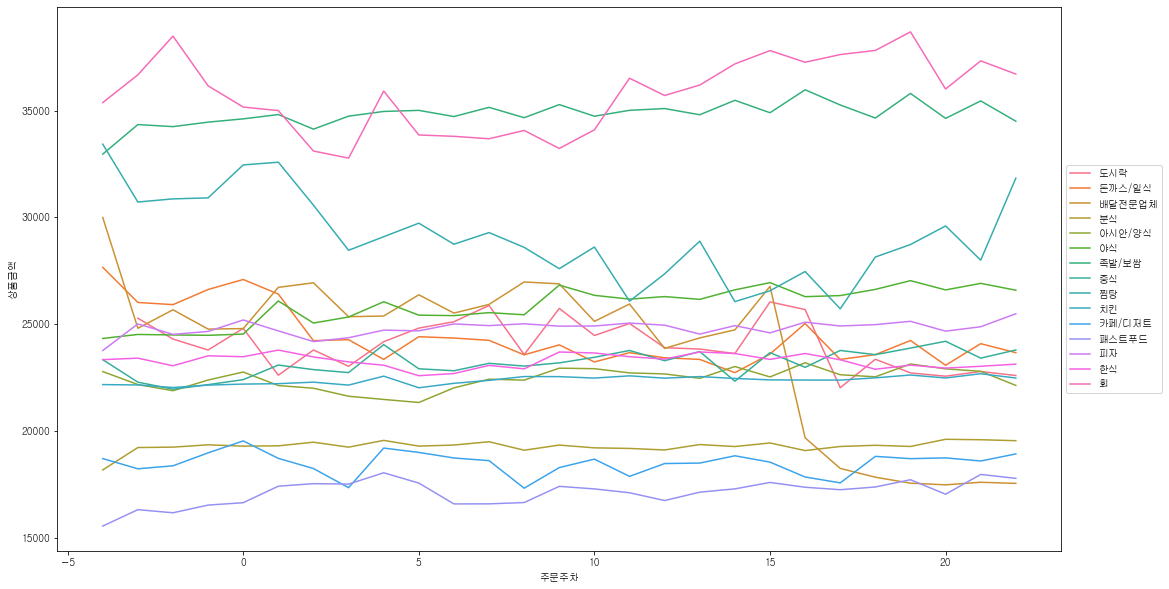

In [459]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=temp, x='주문주차', y='상품금액', hue='배달상점업종명')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

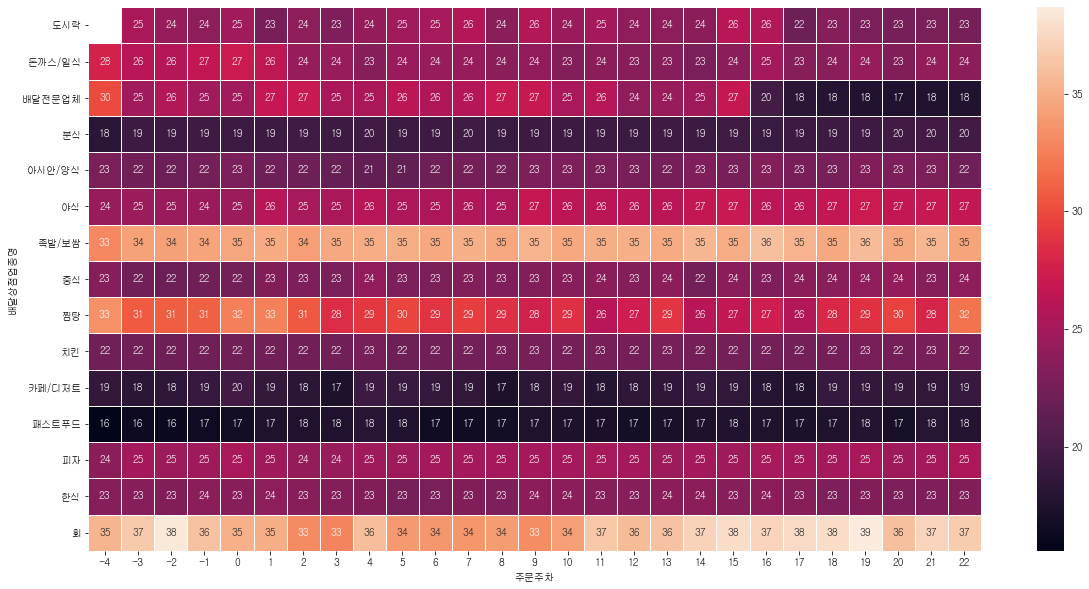

In [462]:
plt.figure(figsize=(20, 10))
sns.heatmap(pd.pivot(data=temp, index='배달상점업종명', columns='주문주차', values='상품금액')*0.001, annot=True, linewidths=.5)
plt.show()

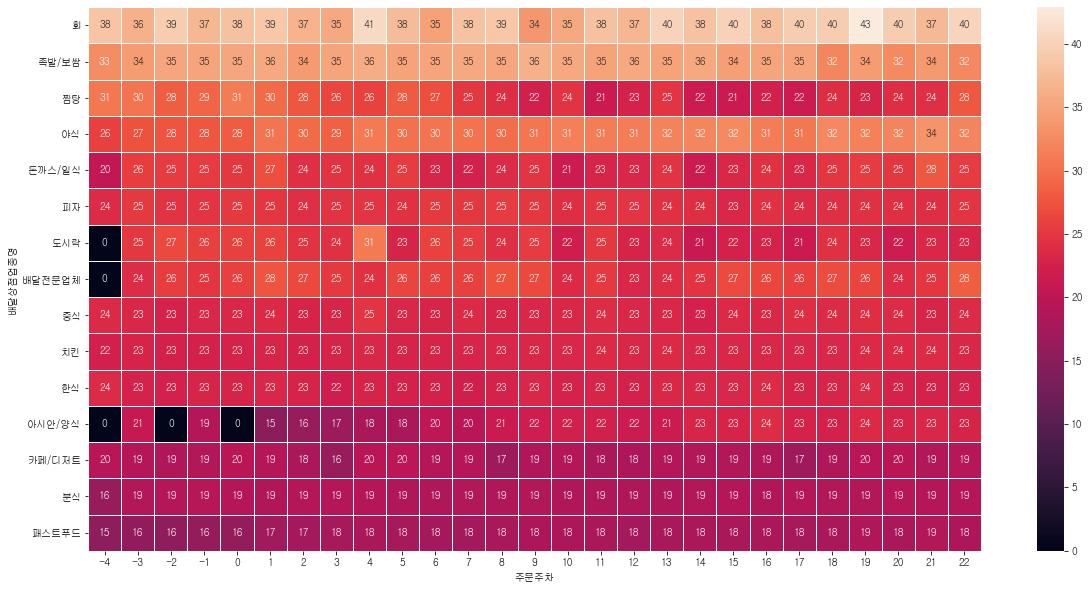

In [619]:
plt.figure(figsize=(20, 10))
sns.heatmap((dlvr_seoul_10k.loc[dlvr_seoul_10k.배달상점시군구명 == '구로구']
             .groupby(['배달상점업종명', '주문주차'])['상품금액'].mean()
             .unstack()
             .fillna(0)
             .sort_values(by=-3, ascending=False)*0.001),
           annot=True, linewidths=.5)
plt.show()

### 주차별 주문건수 추이

In [640]:
# 업종별 1개 상점당 주차별 평균 주문건수
temp = (
    dlvr_seoul_10k
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack()
    .groupby(['배달상점업종명']).mean()
)

In [654]:
temp[21].sort_values()

배달상점업종명
찜탕         20.631579
도시락        25.000000
카페/디저트     26.172840
회          29.357143
야식         40.535714
한식         48.461538
족발/보쌈      63.444444
돈까스/일식     66.526316
치킨         77.687500
피자         84.176471
중식         85.125000
분식         85.800000
아시안/양식    114.875000
패스트푸드     155.526316
배달전문업체    330.750000
Name: 21, dtype: float64

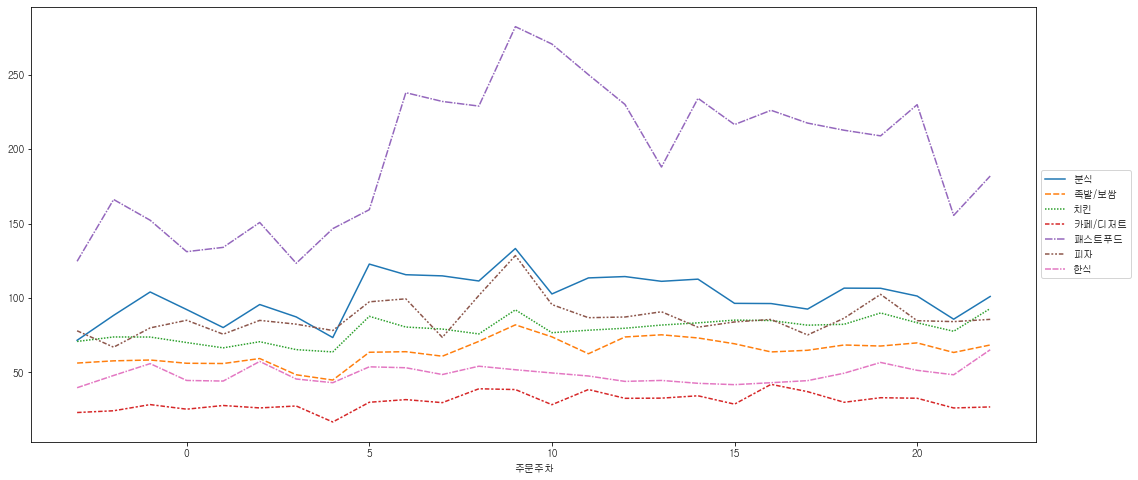

In [649]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['치킨', '분식', '패스트푸드', '카페/디저트', '족발/보쌈', '한식', '피자'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

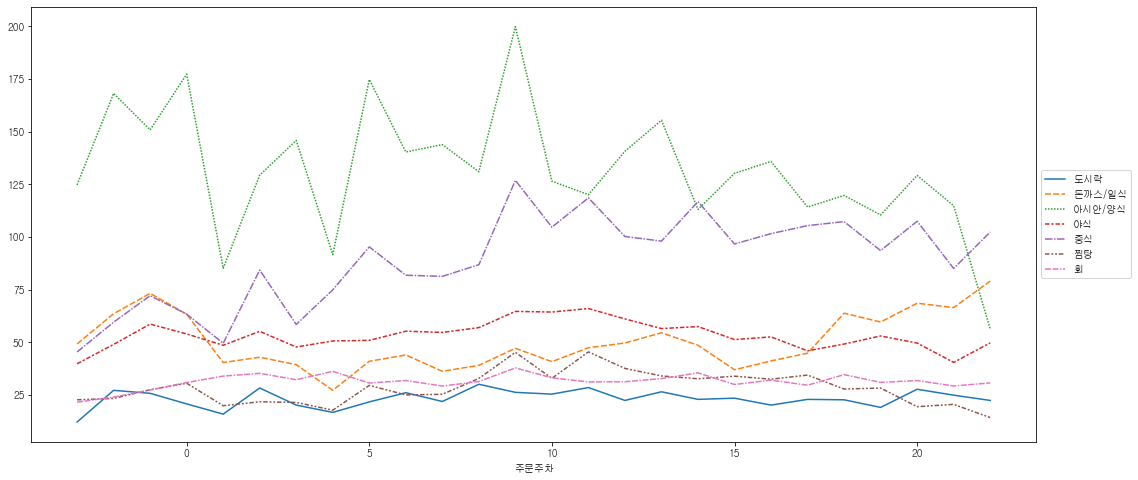

In [650]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['야식', '아시안/양식', '중식', '돈까스/일식', '회', '찜탕', '도시락'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 지역별 주차별 객단가 추이

In [684]:
# 업종별 1개 상점당 주차별 평균 주문건수
temp = (
    dlvr_seoul_10k.loc[dlvr_seoul_10k.배달상점시군구명 == '구로구']
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack()
    .groupby(['배달상점업종명']).mean()
)

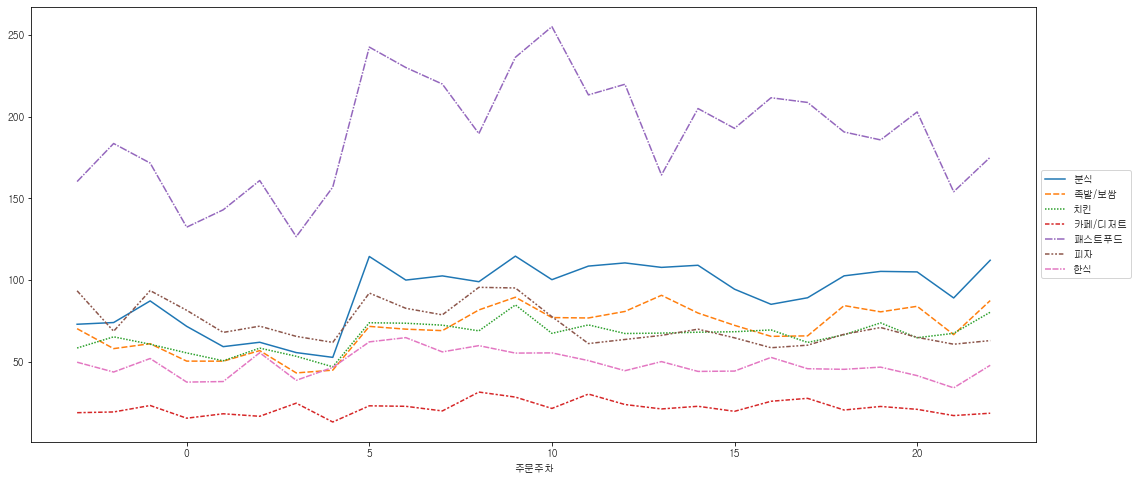

In [685]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['치킨', '분식', '패스트푸드', '카페/디저트', '족발/보쌈', '한식', '피자'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

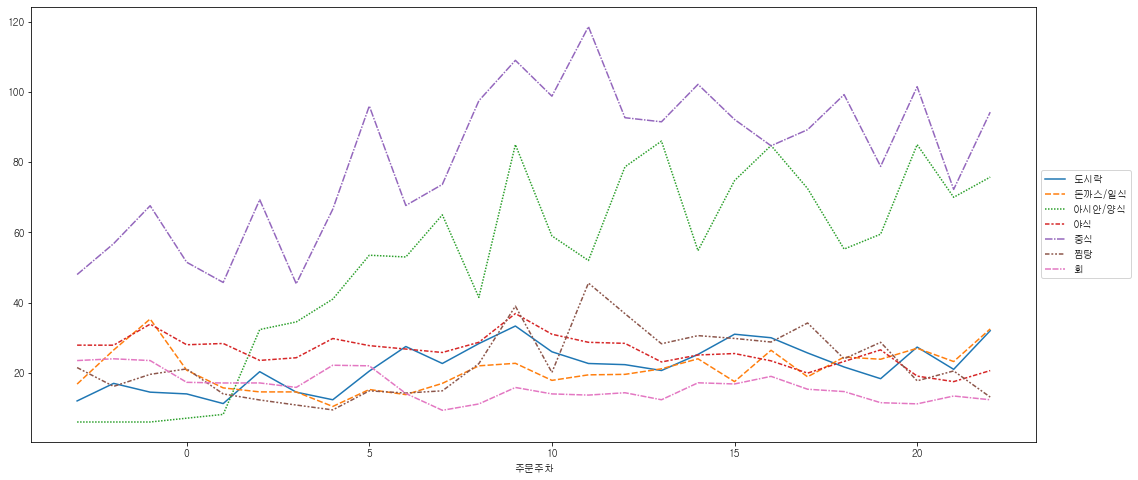

In [686]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['야식', '아시안/양식', '중식', '돈까스/일식', '회', '찜탕', '도시락'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [687]:
# 업종별 1개 상점당 주차별 평균 주문건수
temp = (
    dlvr_seoul_10k.loc[dlvr_seoul_10k.배달상점시군구명 == '영등포구']
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack()
    .groupby(['배달상점업종명']).mean()
)

In [694]:
(dlvr_seoul_10k.loc[(dlvr_seoul_10k.배달상점시군구명 == '영등포구') & (dlvr_seoul_10k.배달상점업종명 == '아시안/양식')]
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack())

주문주차               -4     -3     -2     -1      0      1      2      3   \
배달상점업종명 배달상점ID                                                            
아시안/양식  S0021941   8.0  271.0  311.0  347.0  319.0  236.0  320.0  249.0   
        S0021949   NaN    NaN    NaN    NaN    NaN  115.0   88.0    NaN   
        S0021973  34.0  462.0  461.0  432.0  532.0  516.0  499.0  432.0   

주문주차                 4      5      6      7      8      9      10     11  \
배달상점업종명 배달상점ID                                                             
아시안/양식  S0021941  273.0  338.0   75.0    NaN    NaN    NaN    NaN    NaN   
        S0021949    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        S0021973  282.0  474.0  501.0  458.0  471.0  580.0  514.0  552.0   

주문주차                 12     13     14     15     16     17     18     19  \
배달상점업종명 배달상점ID                                                             
아시안/양식  S0021941    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        S0021949    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        S0021973  487.0  560.0  503.0  515.0  506.0  398.0  516.0  454.0   

주문주차                 20     21  
배달상점업종명 배달상점ID                  
아시안/양식  S0021941    NaN    NaN  
        S0021949    NaN    NaN  
        S0021973  466.0  443.0

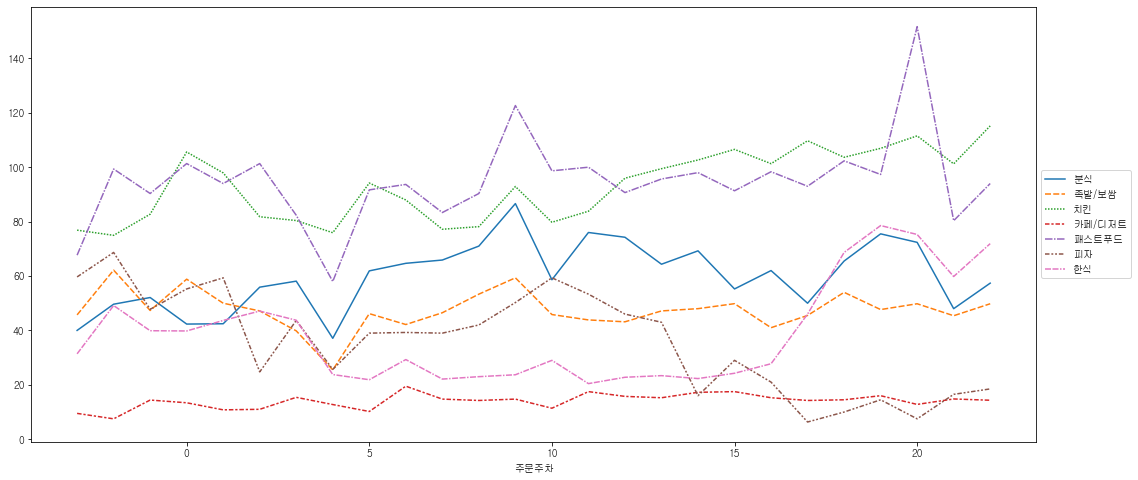

In [688]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['치킨', '분식', '패스트푸드', '카페/디저트', '족발/보쌈', '한식', '피자'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

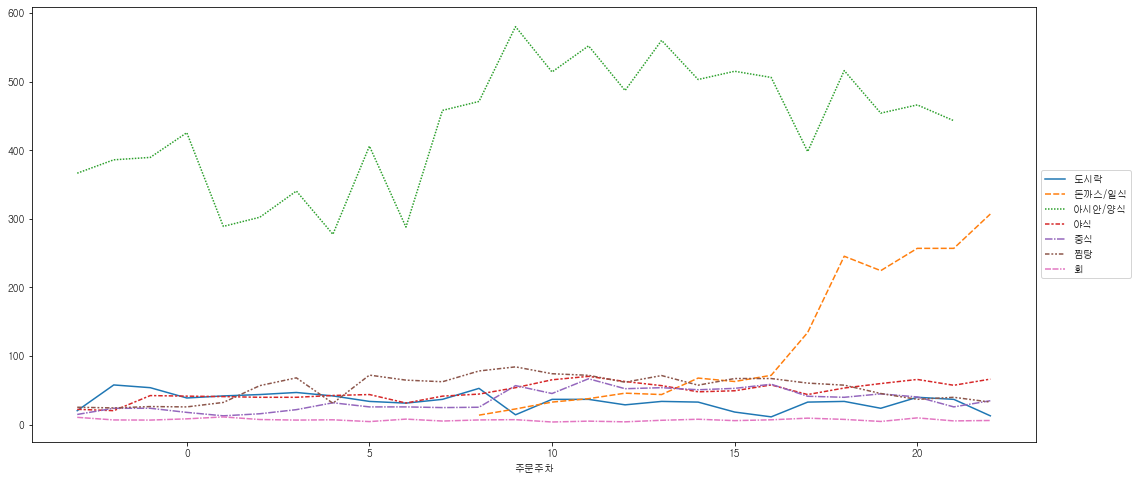

In [689]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['야식', '아시안/양식', '중식', '돈까스/일식', '회', '찜탕', '도시락'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# INVESTIGATION SHOP_DATA

## VISUALIZATION

### 전기간 폐업률(1970~)

In [124]:
all_shop_df.columns

Index(['index', '번호', '개방자치단체코드', '관리번호', '인허가일자', '상세영업상태명', '폐업일자', '소재지면적',
       '소재지우편번호', '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명',
       '좌표정보(x)', '좌표정보(y)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명',
       '총종업원수', '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명',
       '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', 'new_date',
       '인허가일자년', '인허가일자월', '인허가일자일', '인허가일자요일', '인허가일자주', '인허가일자년월', '폐업일자년',
       '폐업일자월', '폐업일자일', '폐업일자요일', '폐업일자주', '폐업일자년월', '폐업업체영업기간', '영업업체영업기간',
       '소재지주소광역시도', '소재지주소시군구', '소재지주소읍면동', '소재지주소번지', 'OC'],
      dtype='object')

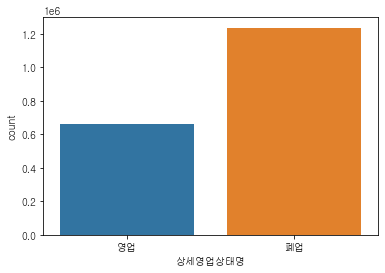

In [125]:
sns.countplot(data = all_shop_df, x='상세영업상태명')
plt.show()

#### 광역시도별 폐업률(1970~)

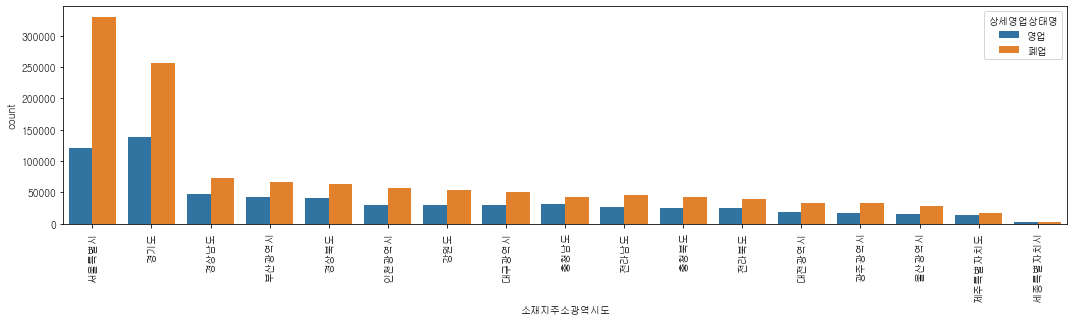

In [126]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df, x='소재지주소광역시도', hue='상세영업상태명',
             order = all_shop_df.groupby(['소재지주소광역시도'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

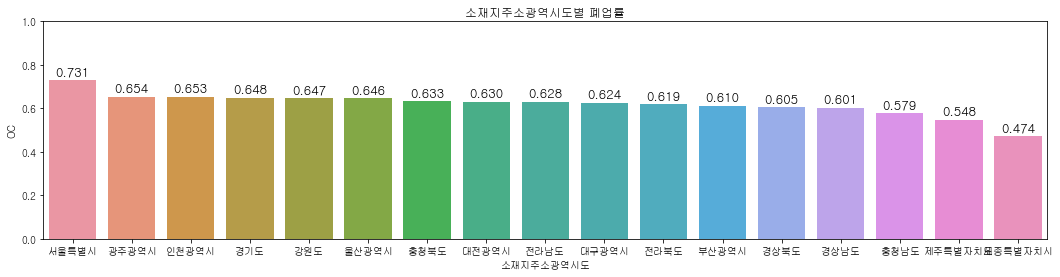

In [127]:
# pivot_table을 통해 폐업률을 추출합니다.
# 폐업률은 폐업한 점포의 수를 전체 인허가 점포 수로 나눈 값입니다. 즉, 오픈한 점포에 대해 폐업을 한 비율입니다.
plot = pd.pivot_table(all_shop_df, index="소재지주소광역시도", values="OC").sort_values(by=['OC'], ascending=False)

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=plot, x=plot.index, y='OC')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.3f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 1)
plt.title('소재지주소광역시도별 폐업률')
plt.show()

#### 서울시 폐업률(1970~)

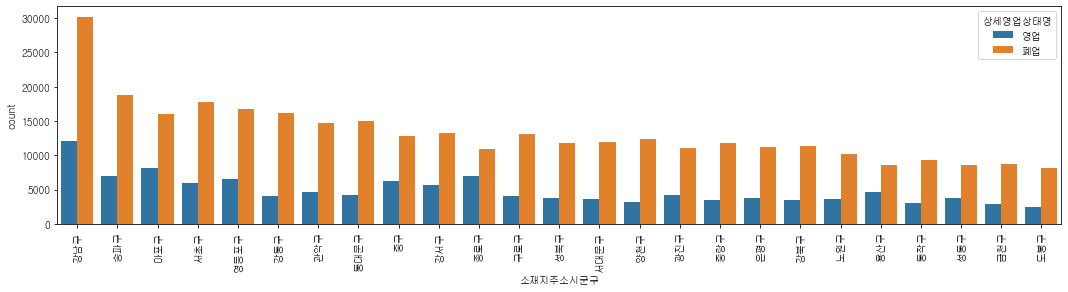

In [128]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df.loc[all_shop_df.소재지주소광역시도 == '서울특별시'], x='소재지주소시군구', hue='상세영업상태명',
             order = all_shop_df.loc[all_shop_df.소재지주소광역시도 == '서울특별시'].groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

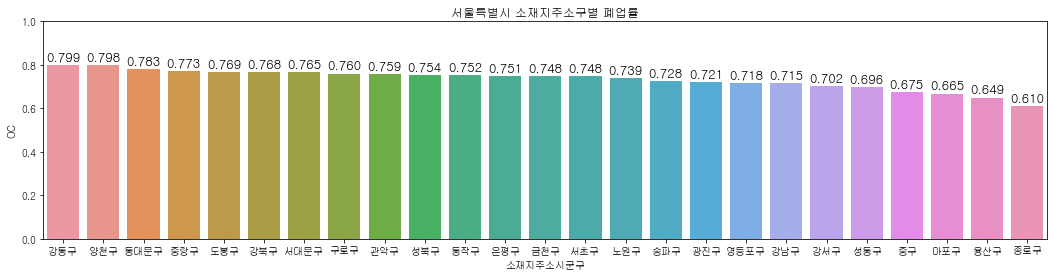

In [129]:
# pivot_table을 통해 폐업률을 추출합니다.
# 폐업률은 폐업한 점포의 수를 전체 인허가 점포 수로 나눈 값입니다. 즉, 오픈한 점포에 대해 폐업을 한 비율입니다.
plot = pd.pivot_table(all_shop_df.loc[all_shop_df.소재지주소광역시도 == '서울특별시'],
                      index="소재지주소시군구", values="OC").sort_values(by=['OC'], ascending=False)

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=plot, x=plot.index, y='OC')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.3f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 1)
plt.title('서울특별시 소재지주소구별 폐업률')
plt.show()

#### 경기도 폐업률(1970~)

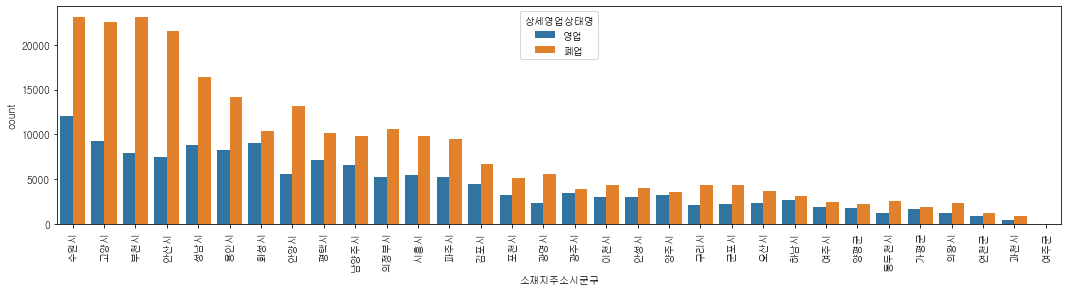

In [130]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df.loc[all_shop_df.소재지주소광역시도 == '경기도'], x='소재지주소시군구', hue='상세영업상태명',
             order = all_shop_df.loc[all_shop_df.소재지주소광역시도 == '경기도'].groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

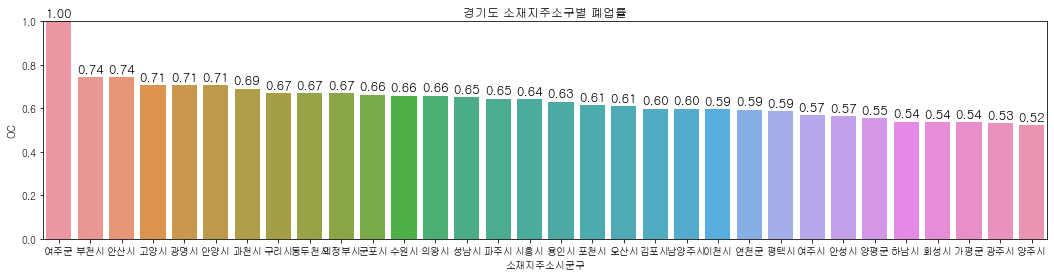

In [131]:
# pivot_table을 통해 폐업률을 추출합니다.
# 폐업률은 폐업한 점포의 수를 전체 인허가 점포 수로 나눈 값입니다. 즉, 오픈한 점포에 대해 폐업을 한 비율입니다.
plot = pd.pivot_table(all_shop_df.loc[all_shop_df.소재지주소광역시도 == '경기도'],
                      index="소재지주소시군구", values="OC").sort_values(by=['OC'], ascending=False)

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=plot, x=plot.index, y='OC')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 1)
plt.title('경기도 소재지주소구별 폐업률')
plt.show()

#### 인허가일자년별 폐업추이(1970~)

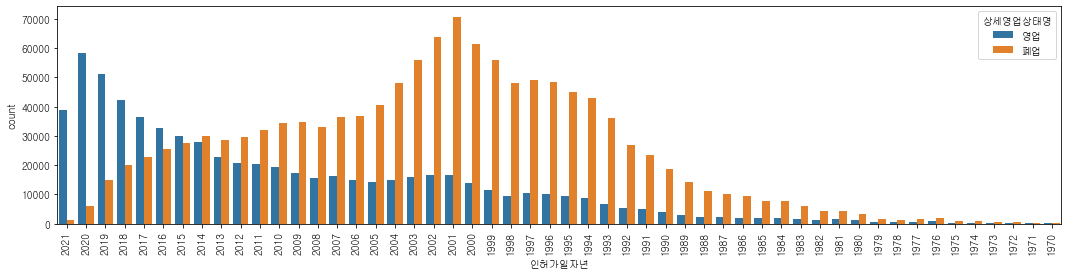

In [132]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df, x='인허가일자년', hue='상세영업상태명',
             order = all_shop_df.groupby(['인허가일자년'])['관리번호'].count().sort_index(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

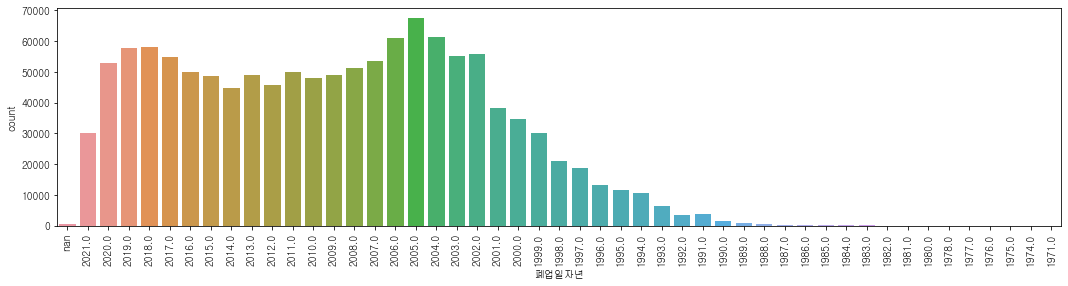

In [133]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df.loc[all_shop_df.상세영업상태명 == '폐업'], x='폐업일자년',
             order = all_shop_df.groupby(['폐업일자년'])['관리번호'].count().sort_index(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

#### 업태별 폐업률(1970~)

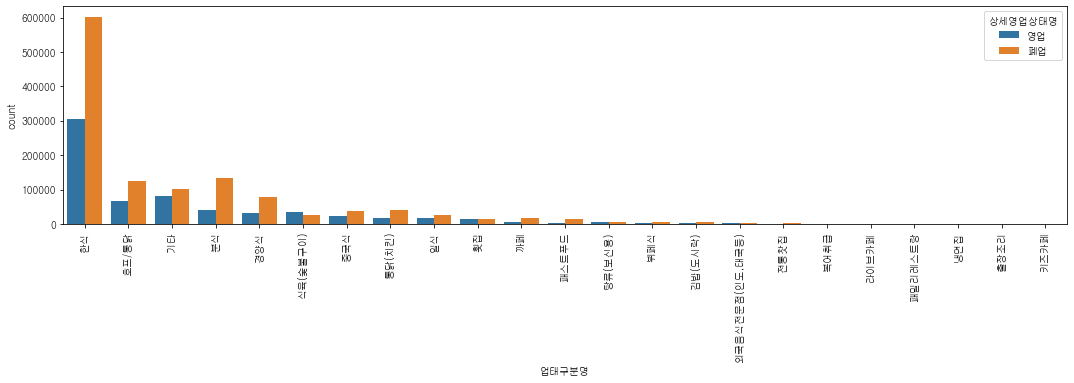

In [134]:
plt.figure(figsize=(18, 4))
sns.countplot(data = all_shop_df, x='업태구분명', hue='상세영업상태명',
             order = all_shop_df.groupby(['업태구분명'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

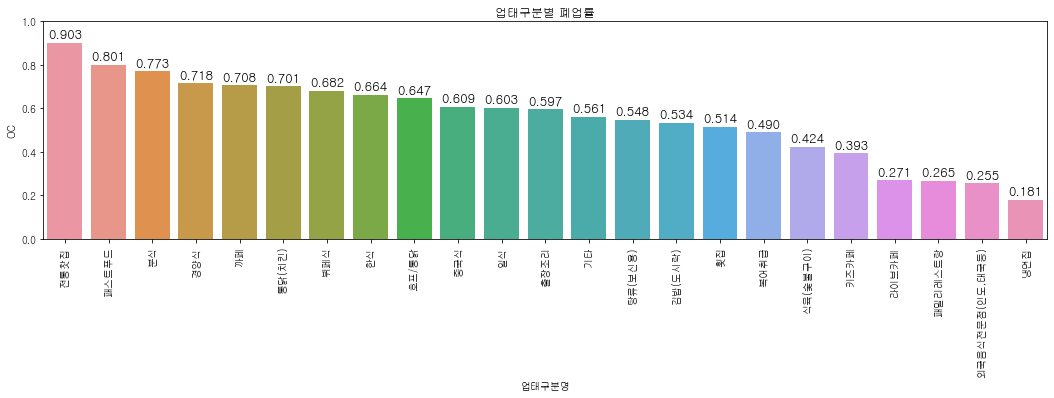

In [135]:
# pivot_table을 통해 폐업률을 추출합니다.
# 폐업률은 폐업한 점포의 수를 전체 인허가 점포 수로 나눈 값입니다. 즉, 오픈한 점포에 대해 폐업을 한 비율입니다.
plot = pd.pivot_table(all_shop_df, index="업태구분명", values="OC").sort_values(by=['OC'], ascending=False)

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=plot, x=plot.index, y='OC')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.3f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 1)
plt.title('업태구분별 폐업률')
plt.xticks(rotation=90)
plt.show()

### ★코로나 이전 이후 폐업률 비교

- 기본적으로 폐업률은 해당 기간 이전에 폐업한 업체는 제외하고 영업중이던 업체만 기준으로 진행합니다.
- 비교를 위해서 동기간의 테이블을 추가로 만들고 두 기간을 비교하겠습니다.

In [136]:
# 2019년 12월 31일 이전에 폐업을 한 점포를 제거합니다.
# 2020.01.01 ~ 2021.07.31 까지
all_shop_df_after = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2019-12-31')]

In [137]:
all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '폐업', 'OC'] = 1

In [138]:
# 기본적으로 인허가일자가 2019년 7월 31일 이후의 점포를 제거합니다.
# 그리고 폐업일자가 2017년 12월 31일 이전의 점포를 제거합니다.

# 2018.01.01 ~ 2019.07.31 까지
all_shop_df_before = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2017-12-31') & (all_shop_df.인허가일자 <= '2019-07-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_before.loc[all_shop_df_before.폐업일자 > '2019-07-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_before.loc[all_shop_df_before.폐업일자 > '2019-07-31', '폐업일자'] = np.nan

In [139]:
all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '폐업', 'OC'] = 1

In [140]:
# 비교용으로 하나를 더 만들겠습니다.
# 기본적으로 인허가일자가 2017년 7월 31일 이후의 점포를 제거합니다.
# 그리고 폐업일자가 2015년 12월 31일 이전의 점포를 제거합니다.

# 2018.01.01 ~ 2019.07.31 까지
all_shop_df_before2 = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2015-12-31') & (all_shop_df.인허가일자 <= '2017-07-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_before2.loc[all_shop_df_before2.폐업일자 > '2017-07-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_before2.loc[all_shop_df_before2.폐업일자 > '2017-07-31', '폐업일자'] = np.nan

In [141]:
all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '폐업', 'OC'] = 1

#### 광역시도별 폐업률

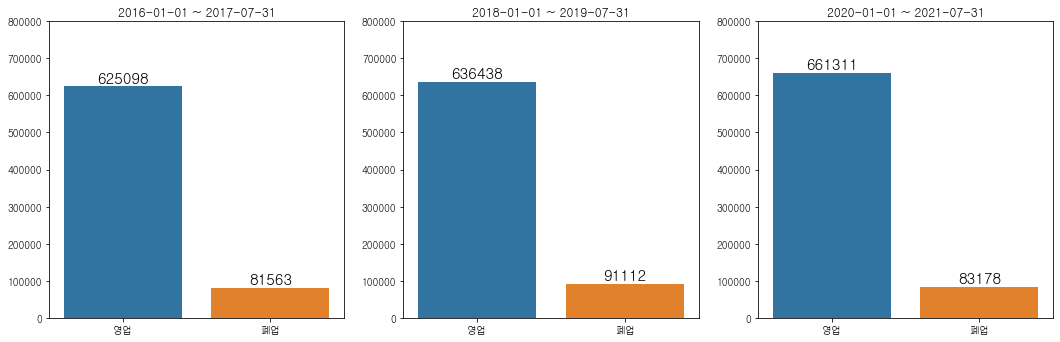

In [142]:
fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [143]:
print((len(all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '폐업']) / len(all_shop_df_before2))*100)
print((len(all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '폐업']) / len(all_shop_df_before))*100)
print((len(all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '폐업']) / len(all_shop_df_after))*100)

11.542026516250365
12.523125558380869
11.172495496911305


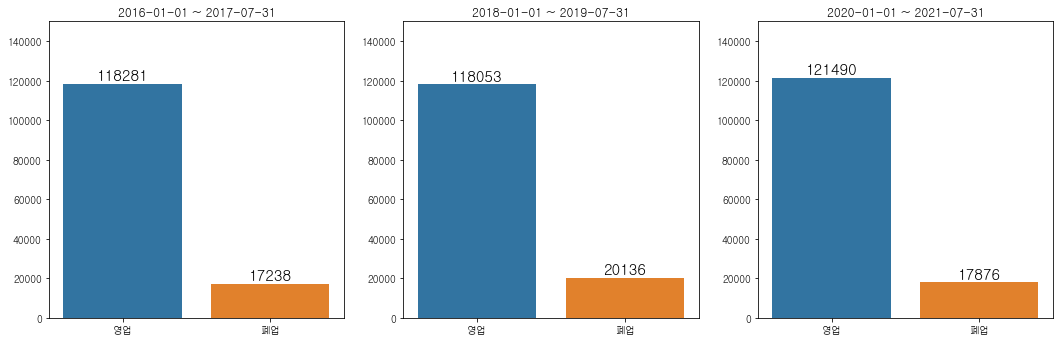

In [144]:
# 서울특별시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [145]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시']))*100)

12.719987603214308
14.57134793652172
12.826657864902488


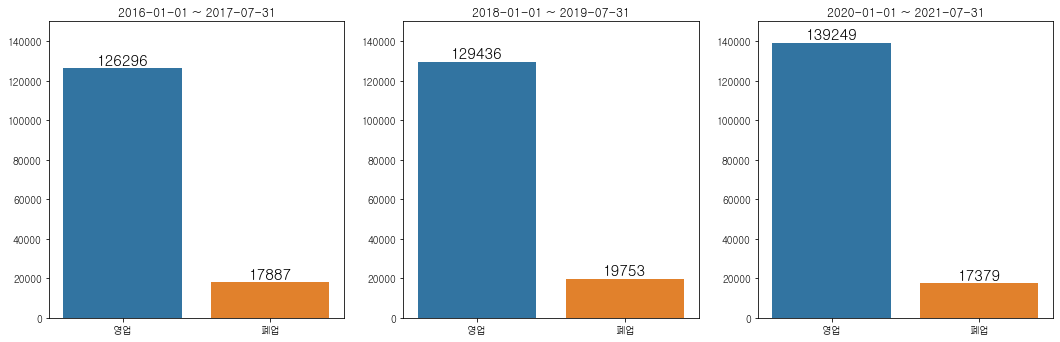

In [146]:
# 경기도

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '경기도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '경기도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '경기도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [147]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '경기도')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '경기도']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '경기도')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '경기도']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '경기도')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '경기도']))*100)

12.405762121748056
13.240252297421392
11.095717240850933


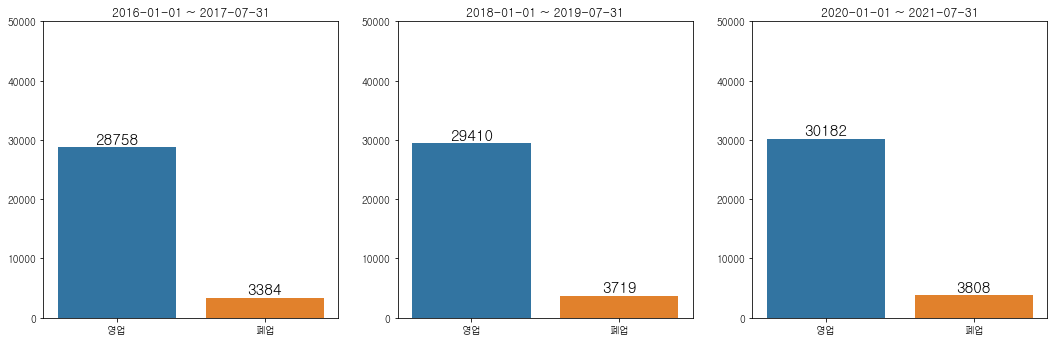

In [148]:
# 대구광역시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [149]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '대구광역시']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '대구광역시']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '대구광역시']))*100)

10.528280754153444
11.225814241299163
11.203295086790233


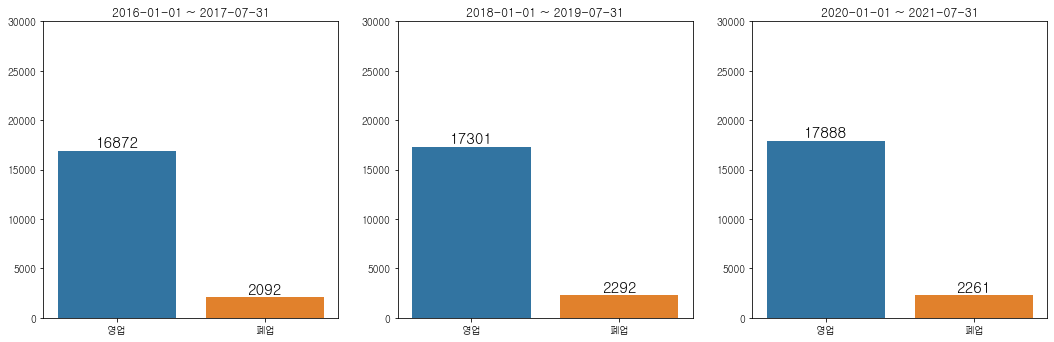

In [150]:
# 광주광역시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [151]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '광주광역시']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '광주광역시']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '광주광역시']))*100)

11.031427968782957
11.698055427958964
11.221400565784903


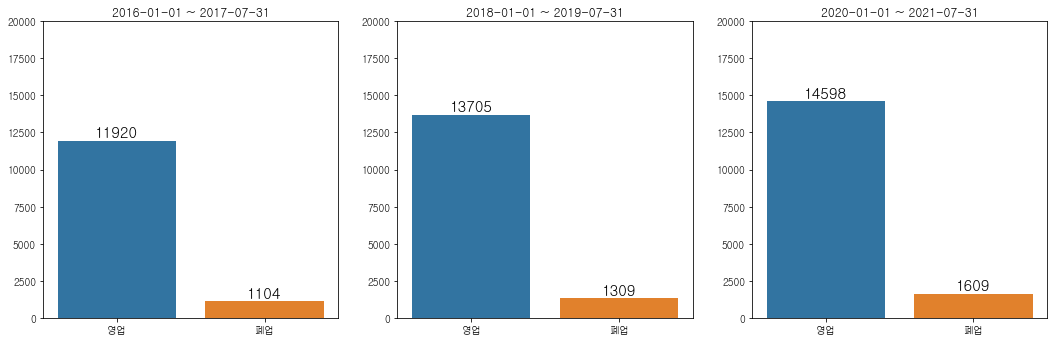

In [152]:
# 제주도

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [153]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '제주특별자치도']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '제주특별자치도']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '제주특별자치도']))*100)

8.476658476658477
8.718529372585587
9.927808971432098


#### 서울특별시_업종별

In [154]:
df_seoul_before2 = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시']
df_seoul_before = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시']
df_seoul_after = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시']

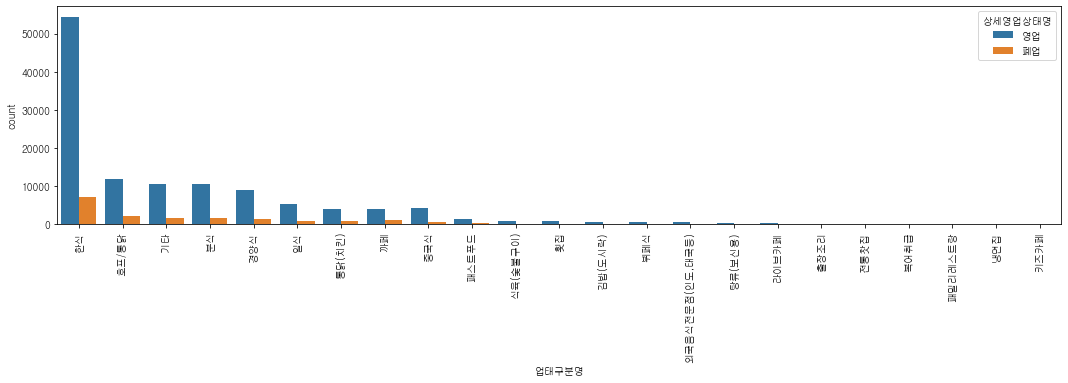

In [155]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_before2, x='업태구분명', hue='상세영업상태명',
             order=df_seoul_before2.groupby(['업태구분명'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

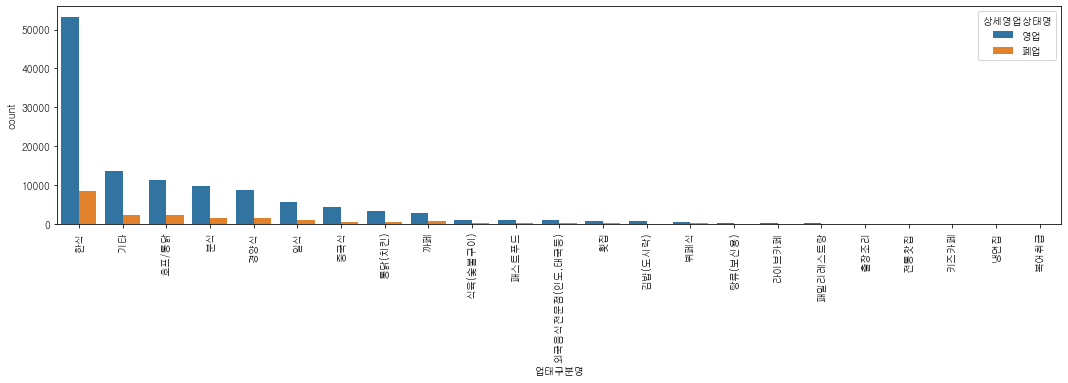

In [156]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_before, x='업태구분명', hue='상세영업상태명',
             order=df_seoul_before.groupby(['업태구분명'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

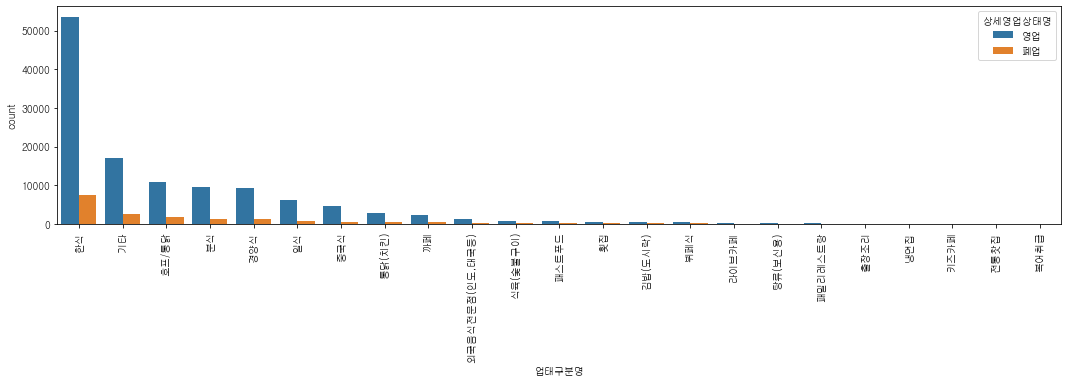

In [157]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_after, x='업태구분명', hue='상세영업상태명',
             order=df_seoul_after.groupby(['업태구분명'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [158]:
temp = pd.concat([pd.pivot_table(df_seoul_after,
                          index='업태구분명',
                          values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'after'}, axis=1),
           pd.pivot_table(df_seoul_before2,
                          index='업태구분명',
                          values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'before'}, axis=1),
           pd.pivot_table(df_seoul_before,
                          index='업태구분명',
                          values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'before2'}, axis=1)], axis=1)
temp

after  before  before2
업태구분명                                  
식육(숯불구이)         0.253   0.108    0.165
키즈카페             0.241   0.053    0.115
탕류(보신용)          0.218   0.105    0.109
뷔페식              0.212   0.139    0.169
횟집               0.196   0.136    0.190
출장조리             0.165   0.177    0.161
김밥(도시락)          0.164   0.139    0.124
까페               0.159   0.191    0.214
패밀리레스트랑          0.148   0.100    0.117
라이브카페            0.148   0.076    0.131
호프/통닭            0.148   0.146    0.168
전통찻집             0.141   0.171    0.165
패스트푸드            0.139   0.188    0.179
기타               0.133   0.130    0.149
경양식              0.124   0.130    0.157
통닭(치킨)           0.123   0.167    0.150
복어취급             0.123   0.104    0.219
분식               0.122   0.133    0.142
한식               0.121   0.115    0.136
외국음식전문점(인도,태국등)  0.120   0.067    0.130
일식               0.119   0.119    0.138
중국식              0.109   0.103    0.124
냉면집              0.077   0.030    0.082

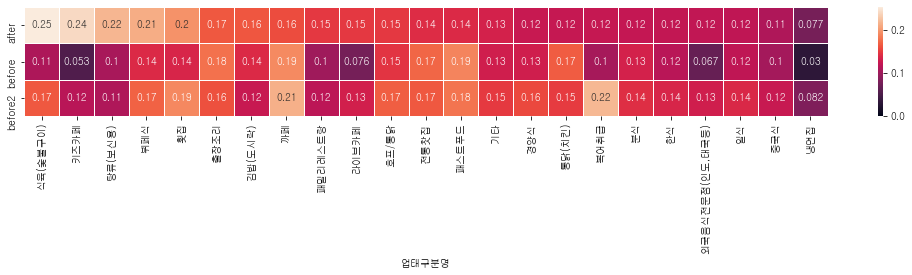

In [159]:
plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.show()

- 드라마틱하게 폐업률이 증가한 업종은 횟집, 키즈카페, 냉면집, 외국음식전문점, 뷔페 정도라고 할 수 있습니다.
- 폐업률이 감소한 업종은 패스트푸드, 카페, 치킨 정도입니다.

#### 서울특별시_지역별

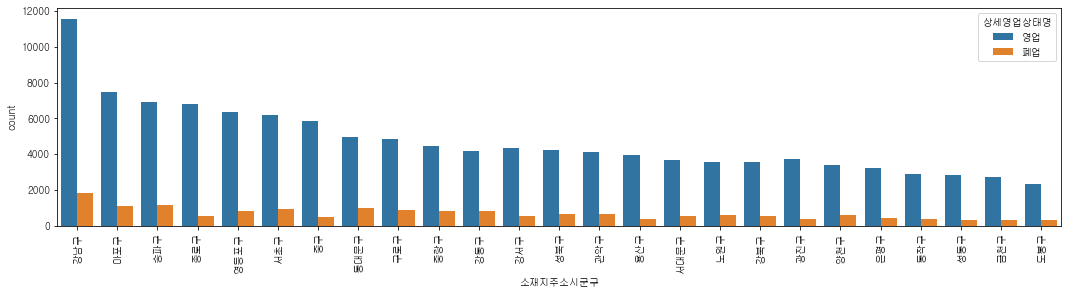

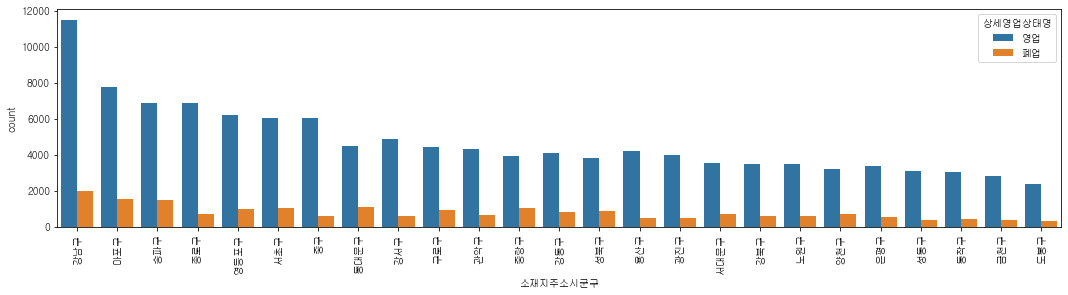

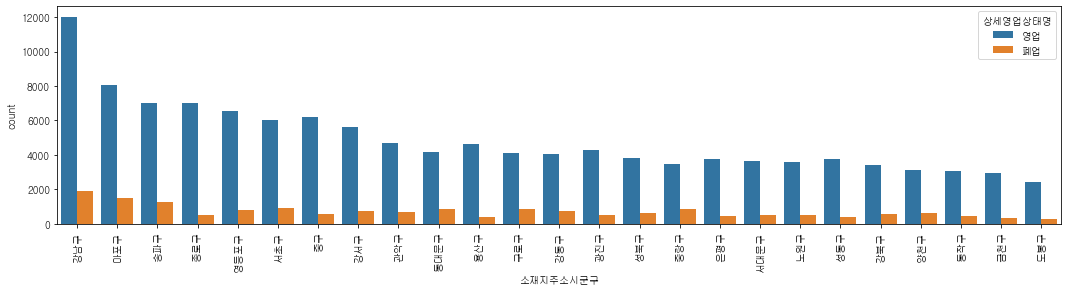

In [160]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_before2, x='소재지주소시군구', hue='상세영업상태명',
             order=df_seoul_before2.groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_before, x='소재지주소시군구', hue='상세영업상태명',
             order=df_seoul_before.groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.figure(figsize=(18, 4))
sns.countplot(data=df_seoul_after, x='소재지주소시군구', hue='상세영업상태명',
             order=df_seoul_after.groupby(['소재지주소시군구'])['관리번호'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.show()

In [161]:
temp2 = pd.concat([(pd.pivot_table(df_seoul_after, index='소재지주소시군구', values='OC')
                    .sort_values('OC', ascending=False)
                    .round(3)
                    .rename({'OC':'after'}, axis=1)),
                   
                   (pd.pivot_table(df_seoul_before, index='소재지주소시군구', values='OC')
                    .sort_values('OC', ascending=False)
                    .round(3)
                    .rename({'OC':'before'}, axis=1)),
                   
                   (pd.pivot_table(df_seoul_before2, index='소재지주소시군구', values='OC')
                    .sort_values('OC', ascending=False)
                    .round(3)
                    .rename({'OC':'before2'}, axis=1))], axis=1)
temp2.T

소재지주소시군구    중랑구   동대문구    구로구    양천구    강동구    송파구    마포구    강북구    성북구  \
after     0.195  0.175  0.172  0.169  0.159  0.155  0.154  0.144  0.142   
before    0.212  0.196  0.178  0.183  0.165  0.180  0.163  0.148  0.188   
before2   0.153  0.165  0.156  0.156  0.169  0.147  0.131  0.137  0.131   

소재지주소시군구    강남구    서초구    관악구    노원구   서대문구    동작구    강서구    도봉구    은평구  \
after     0.137  0.131  0.128  0.128  0.124  0.123  0.113  0.111  0.109   
before    0.146  0.150  0.136  0.147  0.162  0.121  0.111  0.121  0.137   
before2   0.137  0.129  0.134  0.140  0.125  0.113  0.116  0.128  0.120   

소재지주소시군구   영등포구    금천구    광진구    성동구     중구    용산구    종로구  
after     0.109  0.108  0.103  0.095  0.082  0.075  0.066  
before    0.138  0.120  0.111  0.105  0.092  0.109  0.092  
before2   0.115  0.111  0.096  0.100  0.081  0.089  0.075

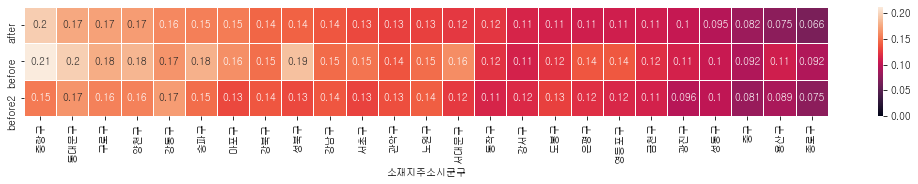

In [162]:
plt.figure(figsize=(18, 2))
sns.heatmap(temp2.T, annot=True, linewidths=.5, vmin=0)
plt.show()

- 드라마틱하게 폐업률이 증가한 지역은 중랑구, 양천구, 성북구, 서초구, 서대문구, 관악구, 은평구
- 폐업률이 오히려 감소한 지역은 구로구, 동작구, 마포구

##### SAMPLE: 중랑구, 양천구, 서초구

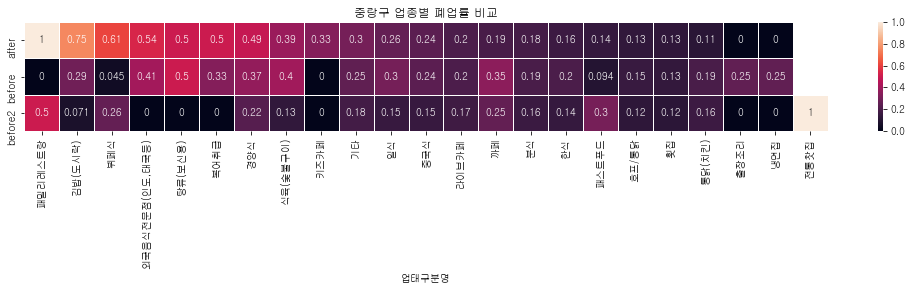

In [163]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '중랑구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '중랑구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '중랑구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('중랑구 업종별 폐업률 비교')
plt.show()

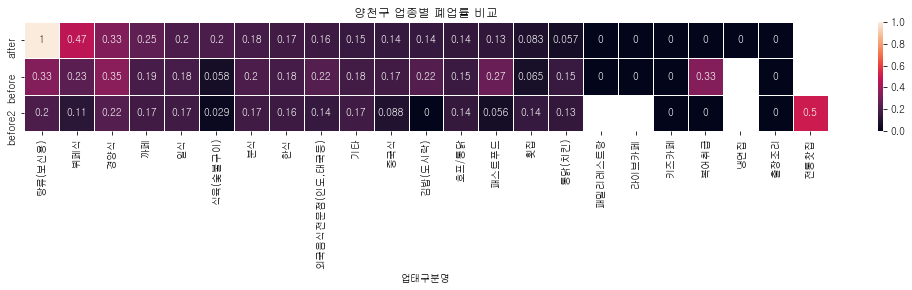

In [164]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '양천구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '양천구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '양천구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('양천구 업종별 폐업률 비교')
plt.show()

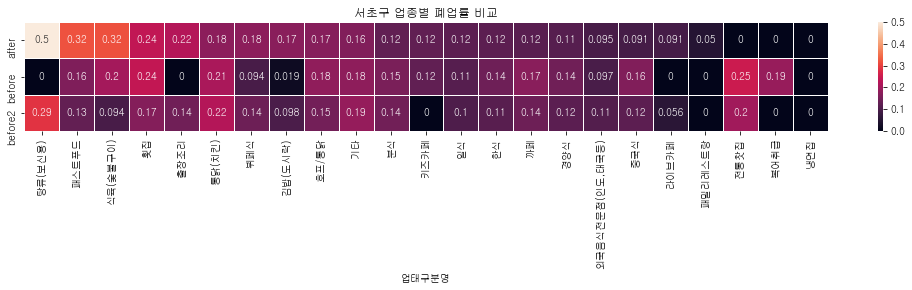

In [165]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '서초구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '서초구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '서초구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('서초구 업종별 폐업률 비교')
plt.show()

##### SAMPLE: 구로구, 동작구, 마포구

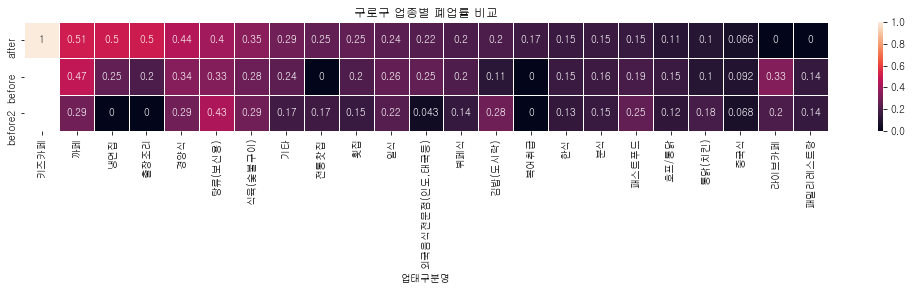

In [166]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '구로구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '구로구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '구로구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('구로구 업종별 폐업률 비교')
plt.show()

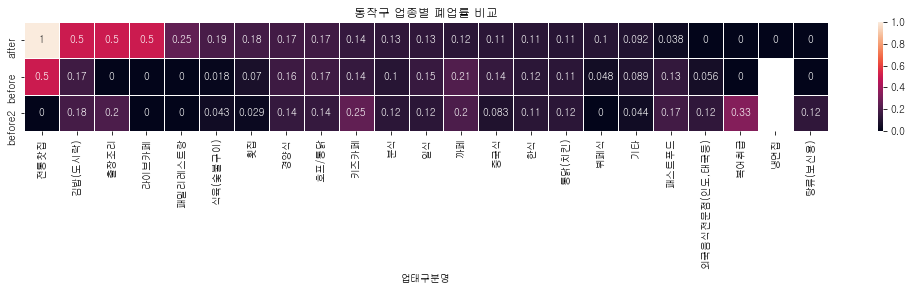

In [167]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '동작구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '동작구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '동작구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('동작구 업종별 폐업률 비교')
plt.show()

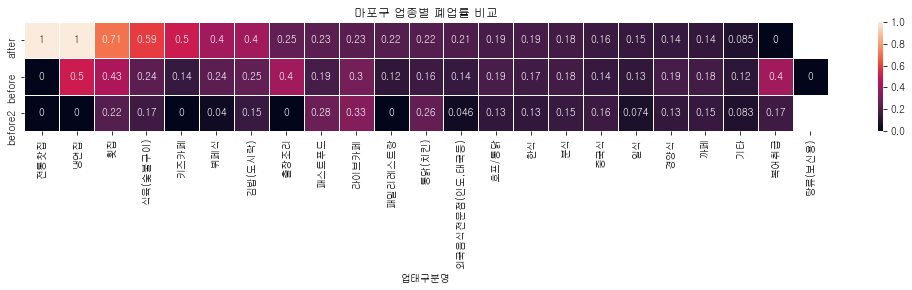

In [168]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '마포구'],
                                index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'after'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '마포구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before'}, axis=1)),
                  
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '마포구'],
                                  index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False)
                   .round(3)
                   .rename({'OC':'before2'}, axis=1))], axis=1)

plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('마포구 업종별 폐업률 비교')
plt.show()

### ★지역별, 업종별 경쟁업체수

- 경쟁업체수는 절대적 수치보다는 인구대비 점포수로 비교하는 게 더 정확합니다.
- 따라서 해당 지역의 인구 데이터가 필요합니다.
- 인구 데이터는 통계청 KOSIS 국가통계포털에서 구했습니다.
- https://kosis.kr/index/index.do

In [464]:
kosis_path = r'C:\Users\Wyatt\wyatt37\data\ktVisual\kosis'

In [465]:
file_list = os.listdir(kosis_path)
file_list

['pop_0.csv',
 'pop_1.csv',
 'pop_2.csv',
 'pop_3.csv',
 'pop_korea.csv',
 'pop_transfer.csv']

In [171]:
pop_monthly = pd.read_csv(kosis_path + '\\' + file_list[0], encoding='cp949')

In [172]:
pop_unit = pd.read_csv(kosis_path + '\\' + file_list[1], encoding='cp949', header=[0,1])

In [173]:
pop_age = pd.read_csv(kosis_path + '\\' + file_list[2], encoding='cp949')

In [174]:
pop_type = pd.read_csv(kosis_path + '\\' + file_list[3], encoding='cp949', header=[0,1])

In [319]:
pop_all = pd.read_csv(kosis_path + '\\' + file_list[4], encoding='cp949')

In [468]:
pop_transfer = pd.read_csv(kosis_path + '\\' + file_list[5], encoding='cp949', header=[0,1])

#### 인구 데이터 합치기

##### 총인구수

In [175]:
pop_age = pop_age.loc[1:]

In [176]:
pop_age['2018'] = pop_age['2018'].astype(int)
pop_age['2019'] = pop_age['2019'].astype(int)
pop_age['2020'] = pop_age['2020'].astype(int)

In [177]:
pop_age.columns

Index(['행정구역별(읍면동)', '연령별', '2018', '2019', '2020'], dtype='object')

In [178]:
# 총 인구수를 만듭니다.
pop_age_sum = pop_age.groupby(['행정구역별(읍면동)']).sum()

In [179]:
pop_age_sum.rename({'2018': '총인구2018',
                   '2019': '총인구2019',
                   '2020': '총인구2020'}, axis=1, inplace=True)

##### MZ세대 인구수

- https://www.mk.co.kr/news/economy/view/2021/07/725463/
- MZ세대의 배달앱 사용률이 가장 높음(약 30% 이상) X세대부터는 15% 수준

In [180]:
# MZ세대 인구수를 만듭니다.
pop_age_mz = pop_age.loc[pop_age.연령별.isin(['15~19세', '20~24세', '25~29세', '30~34세', '35~39세'])].groupby(['행정구역별(읍면동)']).sum()

In [181]:
pop_age_mz.rename({'2018': 'MZ인구2018',
                   '2019': 'MZ인구2019',
                   '2020': 'MZ인구2020'}, axis=1, inplace=True)

##### 1인가구수

In [182]:
# 1인가구수를 만듭니다.
pop_single = (
    pop_unit
    .set_index(('행정구역별(시군구)', '행정구역별(시군구)'))
    .loc[:, [('2018', '1인가구'), ('2019', '1인가구'), ('2020', '1인가구'),
             ('2018', '일반가구원'), ('2019', '일반가구원'), ('2020', '일반가구원')]]
    .reset_index()
)

In [183]:
pop_single.columns = ['지역구', '일인가구2018', '일인가구2019', '일인가구2020',
                      '전체가구2018', '전체가구2019', '전체가구2020']

In [184]:
pop_single.set_index('지역구', inplace=True)

##### 주거형태

- https://www.donga.com/news/Economy/article/all/20160917/80313267/2
- 단독주택: 원룸도 여기 포함. 통계청 피셜
- 아파트: 그냥 아파트
- 연립주택: 4층 이하의 건물이랍니다.
- 다세대주택: 빌라
- 주택이외의 거처: 오피스텔이 여기 포함, 여관, 고시원


- 즉, 단독주택 + 주택이외의 거처 = 1인 가구들이 주로 사는 곳.
- 연립주택 + 다세대주택 + 아파트= 2인~ 가구들이 주로 사는 곳.

In [185]:
temp = (
    pop_type
    .loc[1:]
    .set_index(('행정구역별(읍면동)', '행정구역별(읍면동)'))
    .stack()
    .reset_index()
)

In [186]:
temp = (
    temp
    .loc[temp['level_1'].isin(['단독주택 (호)', '주택이외의 거처 (호)'])]
    .groupby([('행정구역별(읍면동)', '행정구역별(읍면동)')])
    .sum()
    .reset_index()
)

In [187]:
temp.columns = ['지역구', '미니주택2018', '미니주택2019', '미니주택2020']

In [188]:
pop_type_mini = temp.set_index('지역구')

In [189]:
temp = (
    pop_type
    .loc[1:]
    .set_index(('행정구역별(읍면동)', '행정구역별(읍면동)'))
    .stack()
    .reset_index()
)

In [190]:
temp = (
    temp
    .loc[temp['level_1'].isin(['아파트 (호)', '연립주택 (호)', '다세대주택 (호)'])]
    .groupby([('행정구역별(읍면동)', '행정구역별(읍면동)')])
    .sum()
    .reset_index()
)

In [191]:
temp.columns = ['지역구', '큰주택2018', '큰주택2019', '큰주택2020']

In [192]:
pop_type_big = temp.set_index('지역구')

##### 합치기

In [323]:
# 서울시 지역구별 데이터를 합쳐줍니다.
pop_table = pd.concat([pop_age_sum, pop_age_mz, pop_single, pop_type_mini, pop_type_big], axis=1)

In [322]:
# 전국 총인구 테이블은 따로 준비해줍니다.
pop_all = pd.pivot(data=pop_all, index='행정구역별(읍면동)', columns='연령별', values='총인구(명)')

In [334]:
pop_all['MZ인구'] = pop_all.iloc[:, :5].sum(axis=1)

#### 업종별 인구대비업체수

In [194]:
# 2020.01.01 ~ 2020.12.31 까지
all_shop_df_2020 = all_shop_df.loc[(all_shop_df.인허가일자 <= '2020-12-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_2020.loc[all_shop_df_2020.폐업일자 > '2020-12-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_2020.loc[all_shop_df_2020.폐업일자 > '2020-12-31', '폐업일자'] = np.nan

In [195]:
all_shop_df_2020.loc[all_shop_df_2020.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_2020.loc[all_shop_df_2020.상세영업상태명 == '폐업', 'OC'] = 1

In [196]:
# 2019.01.01 ~ 2019.12.31 까지
all_shop_df_2019 = all_shop_df.loc[(all_shop_df.인허가일자 <= '2019-12-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_2019.loc[all_shop_df_2019.폐업일자 > '2019-12-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_2019.loc[all_shop_df_2019.폐업일자 > '2019-12-31', '폐업일자'] = np.nan

In [197]:
all_shop_df_2019.loc[all_shop_df_2019.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_2019.loc[all_shop_df_2019.상세영업상태명 == '폐업', 'OC'] = 1

In [198]:
# 2018.01.01 ~ 2018.12.31 까지
all_shop_df_2018 = all_shop_df.loc[(all_shop_df.인허가일자 <= '2018-12-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_2018.loc[all_shop_df_2018.폐업일자 > '2018-12-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_2018.loc[all_shop_df_2018.폐업일자 > '2018-12-31', '폐업일자'] = np.nan

In [199]:
all_shop_df_2018.loc[all_shop_df_2018.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_2018.loc[all_shop_df_2018.상세영업상태명 == '폐업', 'OC'] = 1

##### 전국 광역시도별 비교

- 전국 평균을 산출해서 어느정도 차이가 있는지 살펴보겠습니다.

In [327]:
asdf_20_all_active = (
    all_shop_df_2020
    .loc[(all_shop_df_2020.상세영업상태명 == '영업') &
        (all_shop_df_2020.업태구분명.isin(['경양식', '김밥(도시락)', '까페', '분식', '식육(숯불구이)',
                                   '외국음식전문점(인도,태국등)', '일식', '중국식', '통닭(치킨)',
                                   '패스트푸드', '한식', '호프/통닭', '횟집']))]
    .groupby(['소재지주소광역시도', '업태구분명'])['관리번호']
    .count()
    .reset_index()
)

In [347]:
asdf_demo_all = pd.merge(asdf_20_all_active, pop_all.reset_index()[['행정구역별(읍면동)', '합계', 'MZ인구']], how='left', left_on='소재지주소광역시도', right_on='행정구역별(읍면동)')

In [357]:
asdf_demo_all['점포당인구수'] = (asdf_demo_all.합계 / asdf_demo_all.관리번호).astype(int)
asdf_demo_all['점포당MZ인구수'] = (asdf_demo_all.MZ인구 / asdf_demo_all.관리번호).astype(int)

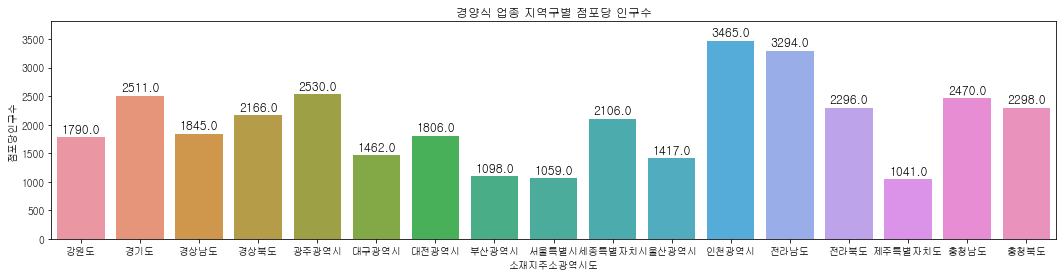

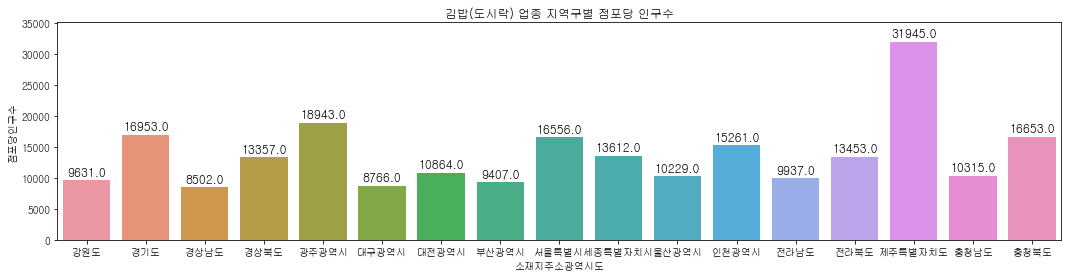

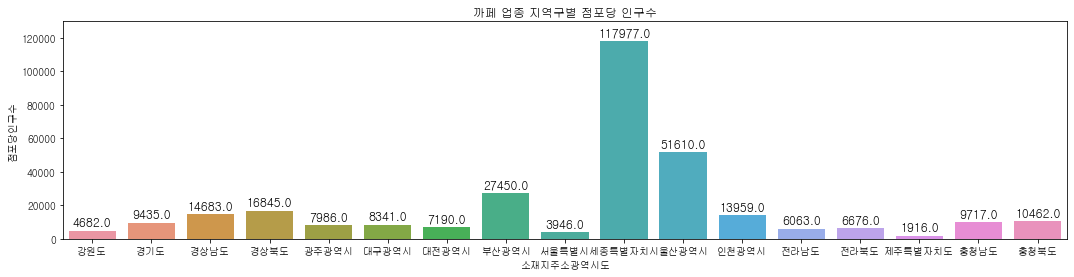

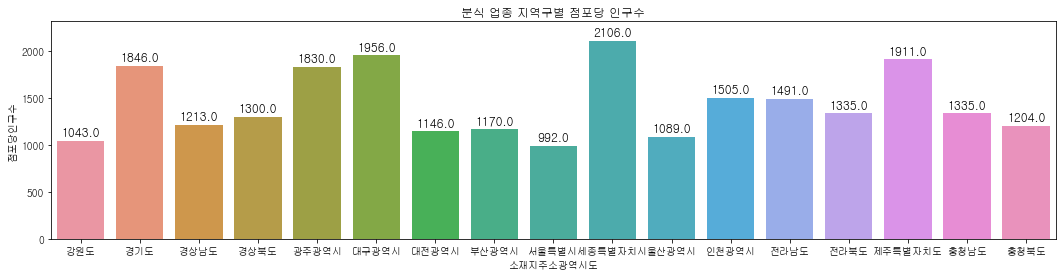

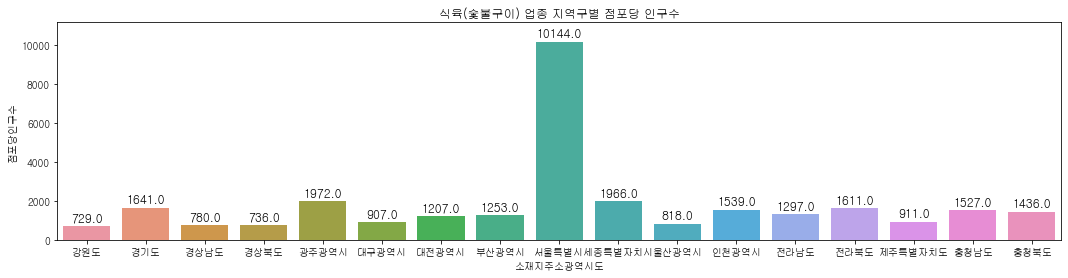

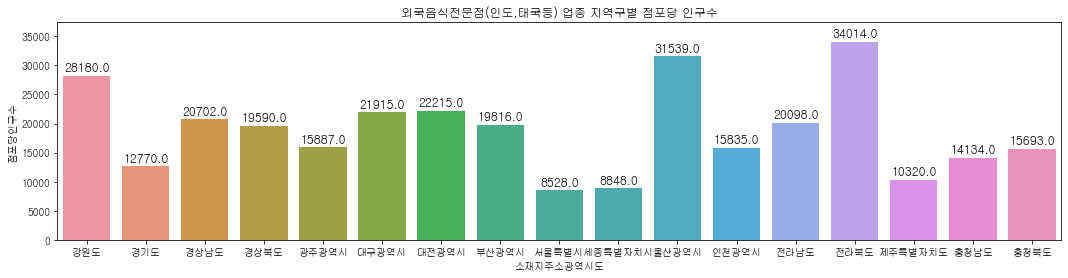

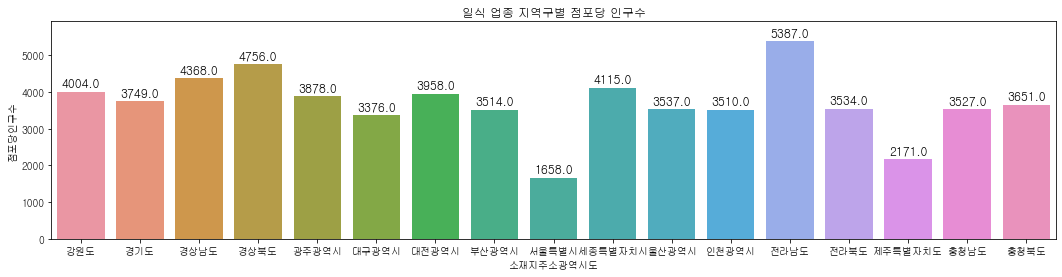

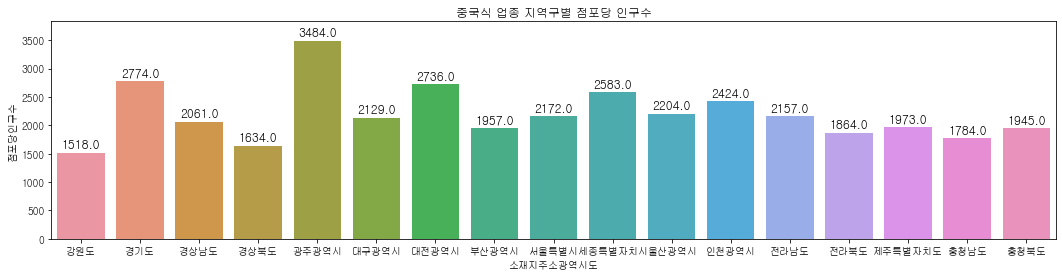

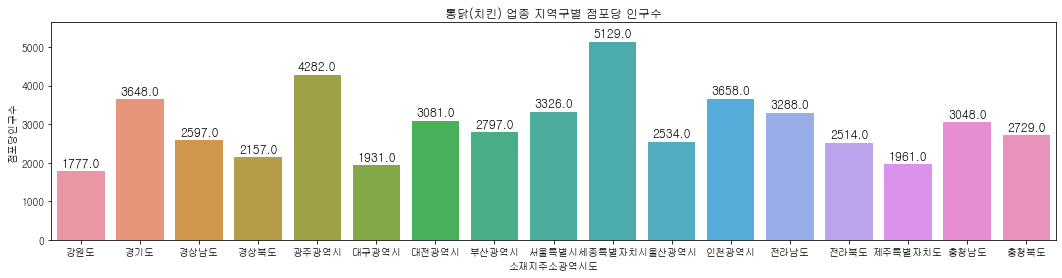

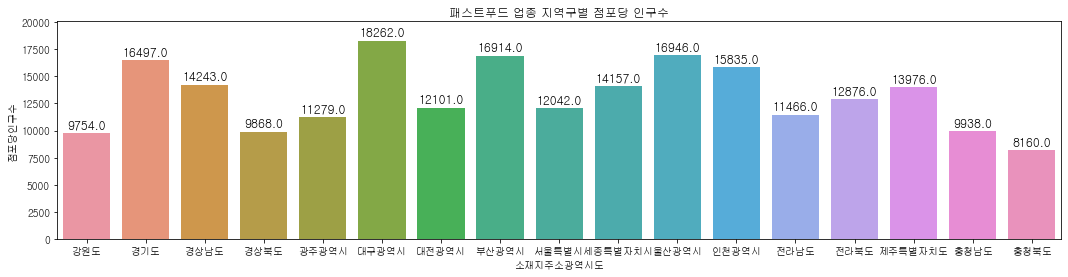

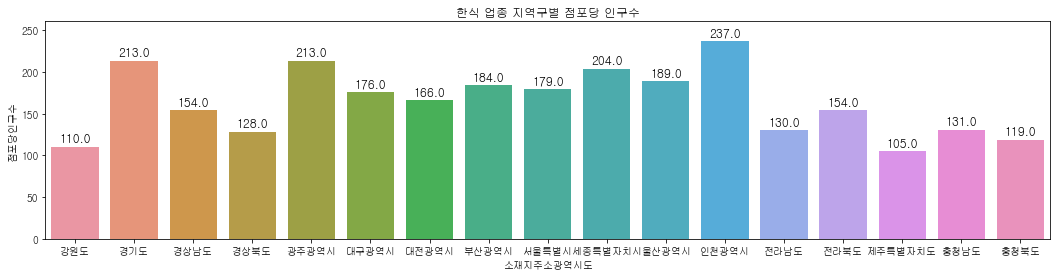

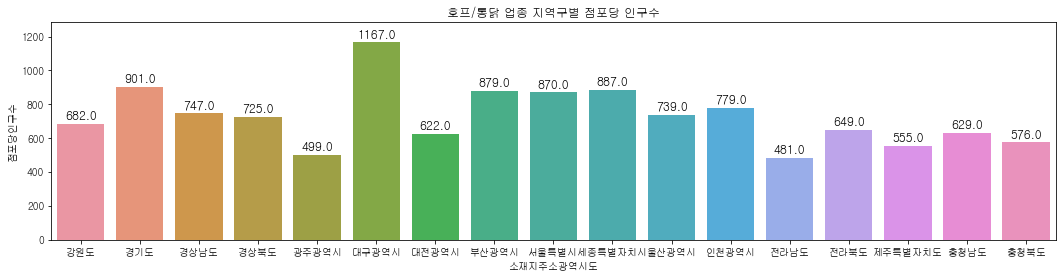

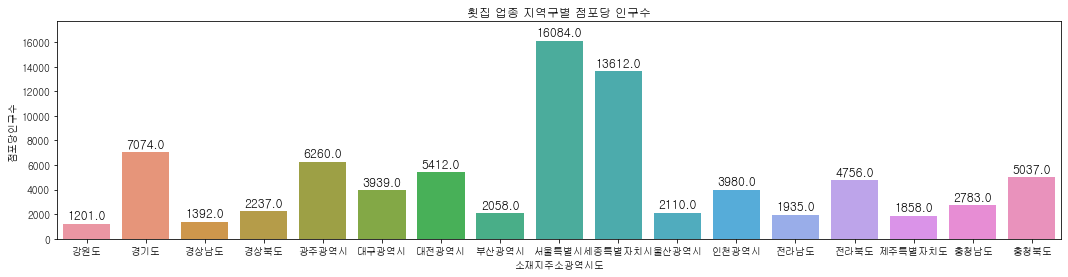

In [360]:
for col in list(asdf_demo_all.업태구분명.unique()):
    
    plt.figure(figsize=(18, 4))
    plots = sns.barplot(data = asdf_demo_all.loc[asdf_demo_all.업태구분명 == col].round(), x='소재지주소광역시도', y='점포당인구수',
               order = asdf_demo_all.소재지주소광역시도.unique())

    for bar in plots.patches:
        plots.annotate(format(bar.get_height()), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 8),
                       textcoords='offset points')
        
    plt.ylim(top = asdf_demo_all.loc[asdf_demo_all.업태구분명 == col].점포당인구수.max()*1.1)
    plt.title('{} 업종 지역구별 점포당 인구수'.format(col))
    plt.show()

##### 서울시 구별 비교

- 서울지역만 추출해줍니다.

In [205]:
asdf_18_seoul = all_shop_df_2018.loc[all_shop_df_2018.소재지주소광역시도 == '서울특별시']
asdf_19_seoul = all_shop_df_2019.loc[all_shop_df_2019.소재지주소광역시도 == '서울특별시']
asdf_20_seoul = all_shop_df_2020.loc[all_shop_df_2020.소재지주소광역시도 == '서울특별시']

In [302]:
asdf_20_seoul_active = (
    asdf_20_seoul
    .loc[(asdf_20_seoul.상세영업상태명 == '영업') &
        (asdf_20_seoul.업태구분명.isin(['경양식', '김밥(도시락)', '까페', '분식', '식육(숯불구이)',
                                   '외국음식전문점(인도,태국등)', '일식', '중국식', '통닭(치킨)',
                                   '패스트푸드', '한식', '호프/통닭', '횟집']))]
    .groupby(['소재지주소시군구', '업태구분명', '상세영업상태명'])['관리번호']
    .count()
    .reset_index()
)

In [305]:
asdf_20_seoul_active.head()

소재지주소시군구     업태구분명 상세영업상태명  관리번호
0      강남구       경양식      영업  2163
1      강남구   김밥(도시락)      영업    90
2      강남구        까페      영업   144
3      강남구        분식      영업   954
4      강남구  식육(숯불구이)      영업    65

In [306]:
temp = pd.merge(asdf_20_seoul_active, pop_table.reset_index()[['index', '총인구2020', '일인가구2020', 'MZ인구2020']], how='left', left_on='소재지주소시군구', right_on='index')

In [307]:
temp.drop(['index', '상세영업상태명'], axis=1, inplace=True)

In [308]:
temp['점포당인구수'] = temp.총인구2020 / temp.관리번호
temp['점포당일인가구수'] = temp.일인가구2020 / temp.관리번호
temp['점포당MZ인구수'] = temp.MZ인구2020 / temp.관리번호

In [309]:
temp.업태구분명.unique()

array(['경양식', '김밥(도시락)', '까페', '분식', '식육(숯불구이)', '외국음식전문점(인도,태국등)', '일식',
       '중국식', '통닭(치킨)', '패스트푸드', '한식', '호프/통닭', '횟집'], dtype=object)

In [310]:
temp.소재지주소시군구.unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

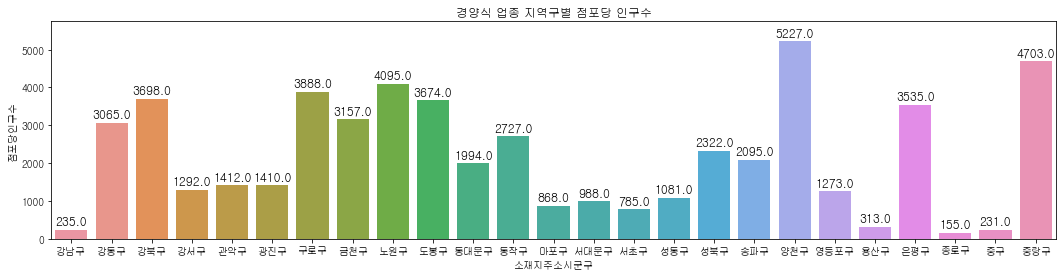

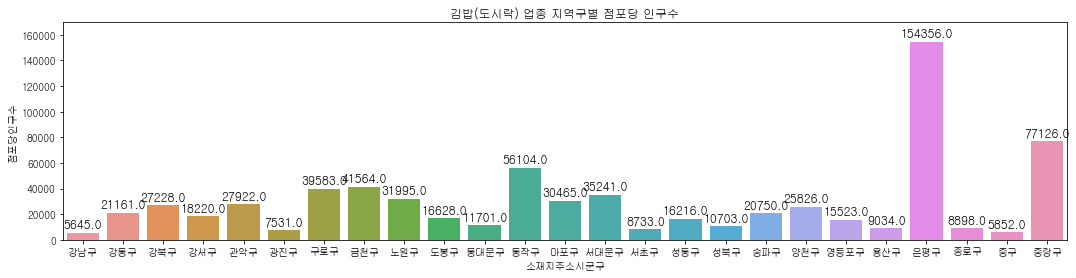

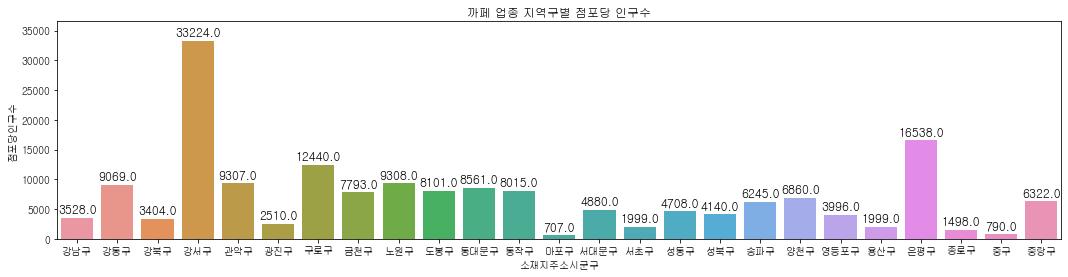

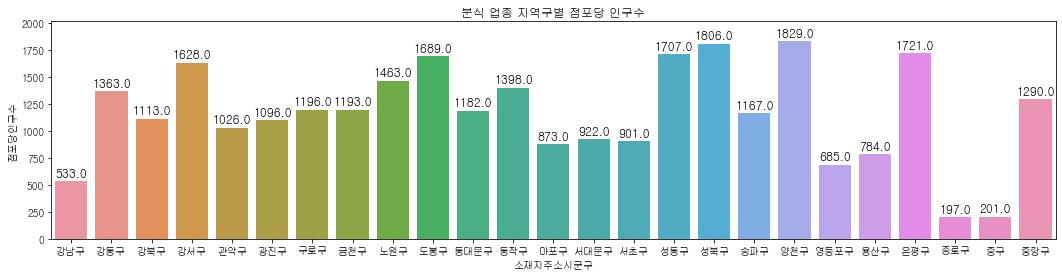

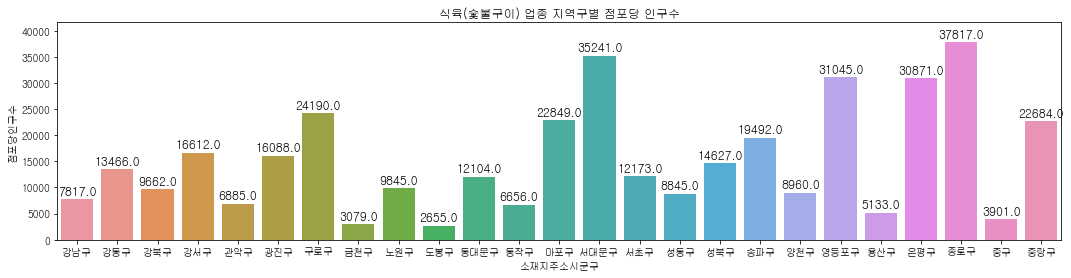

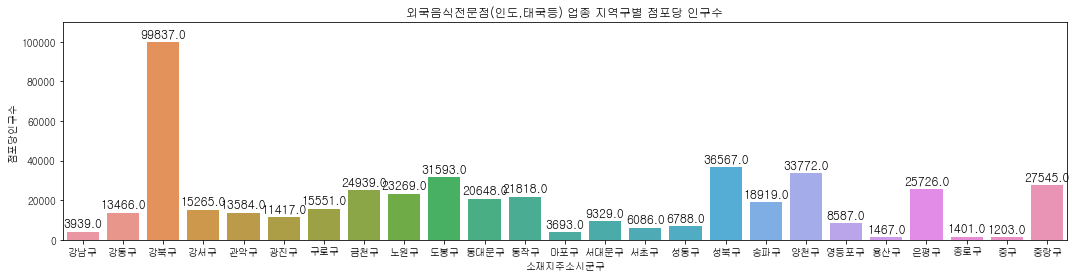

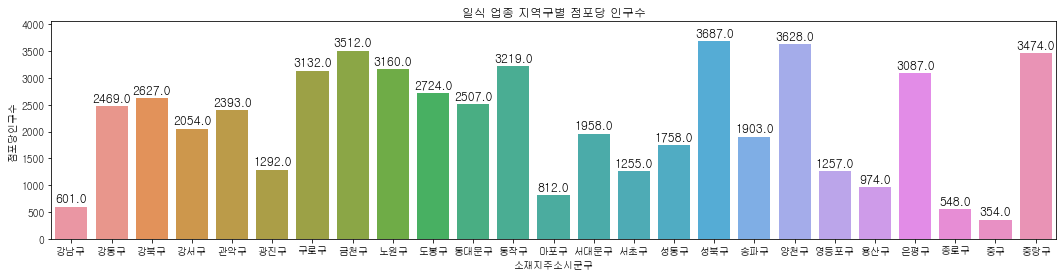

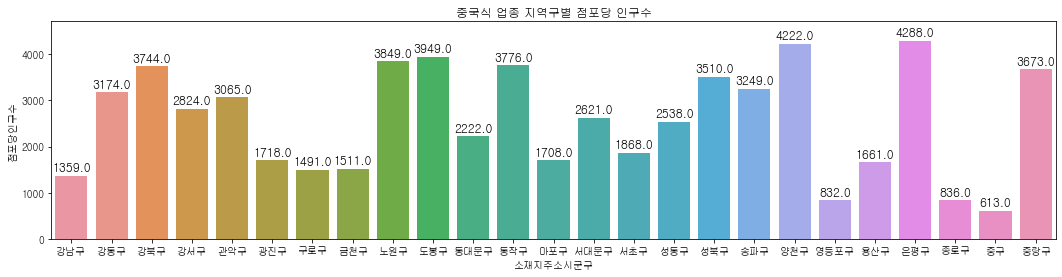

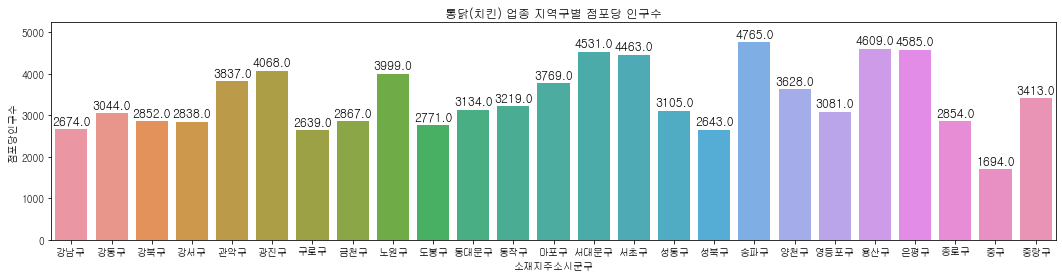

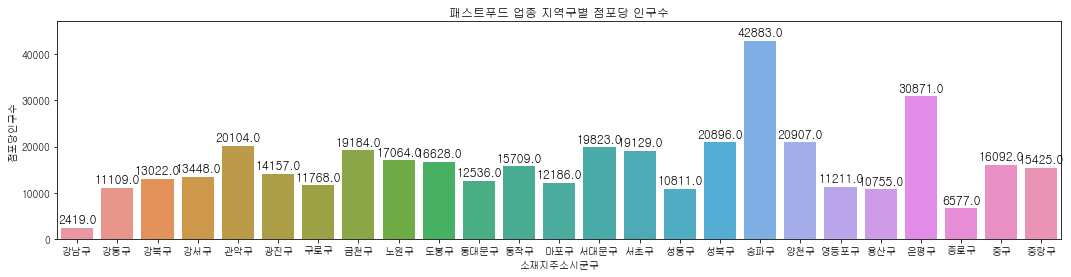

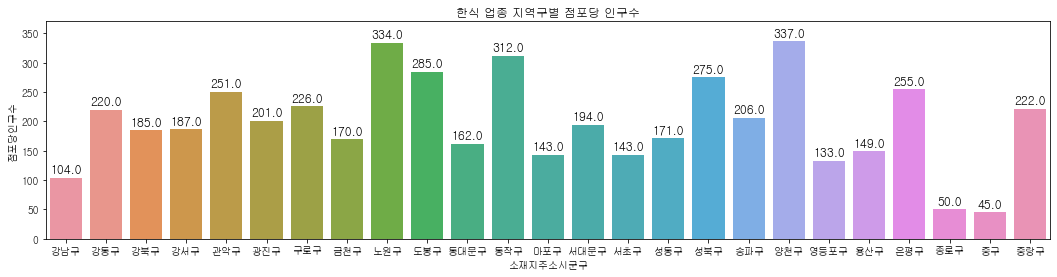

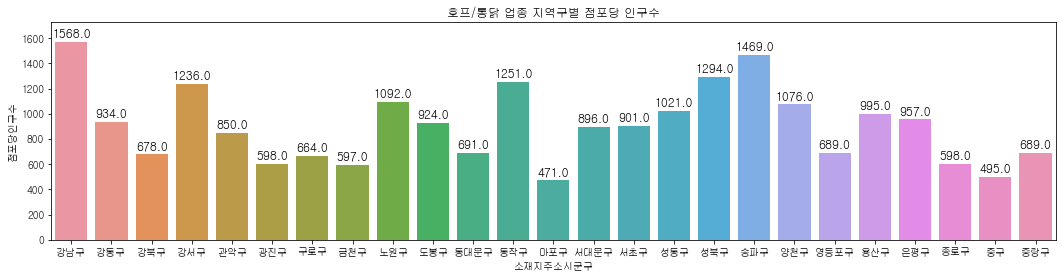

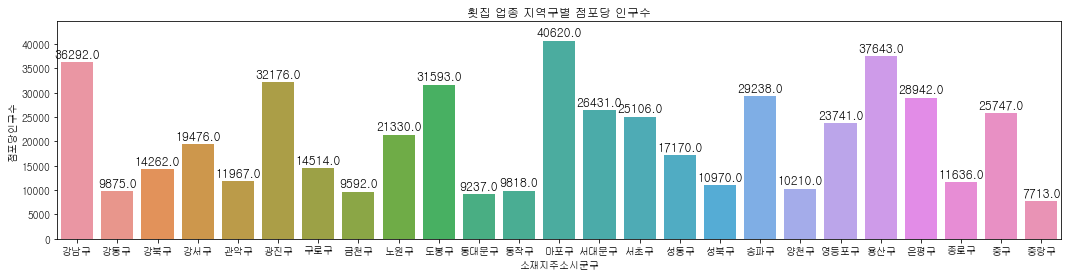

In [311]:
for col in list(temp.업태구분명.unique()):
    
    plt.figure(figsize=(18, 4))
    plots = sns.barplot(data = temp.loc[temp.업태구분명 == col].round(), x='소재지주소시군구', y='점포당인구수',
               order = temp.소재지주소시군구.unique())

    for bar in plots.patches:
        plots.annotate(format(bar.get_height()), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 8),
                       textcoords='offset points')
        
    plt.ylim(top = temp.loc[temp.업태구분명 == col].점포당인구수.max()*1.1)
    plt.title('{} 업종 지역구별 점포당 인구수'.format(col))
    plt.show()

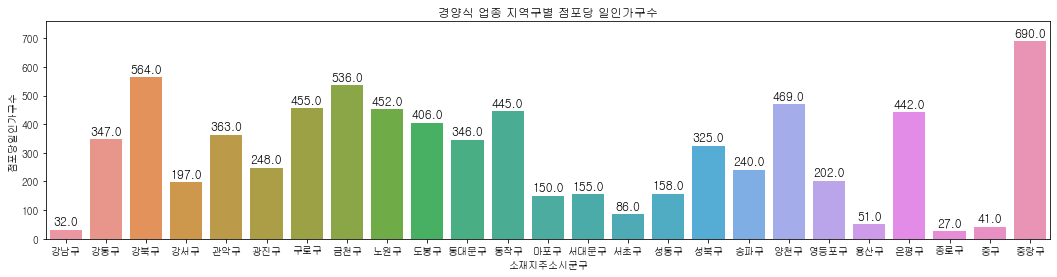

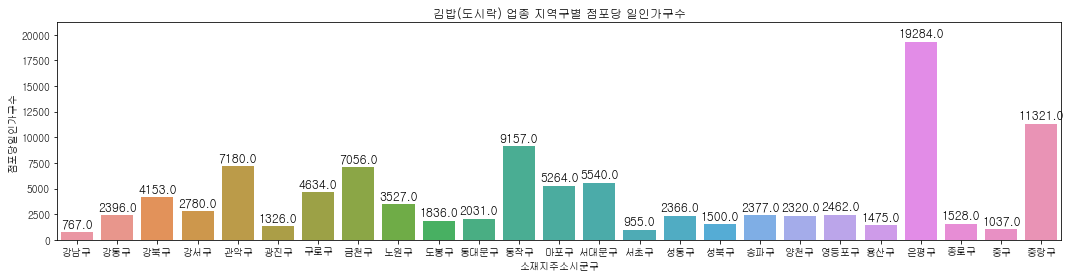

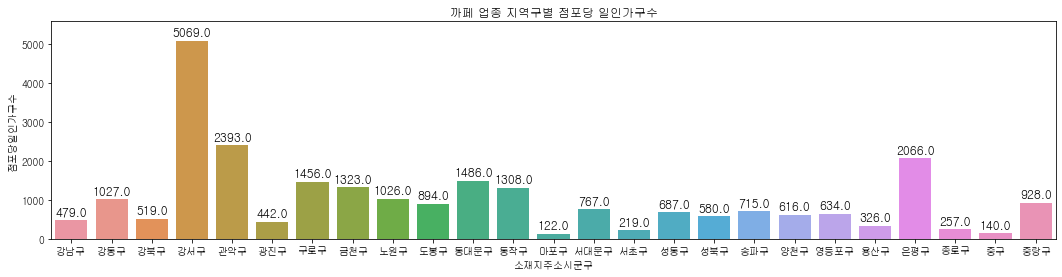

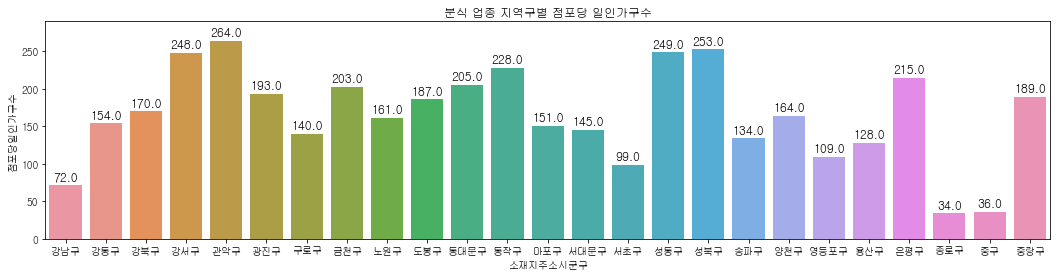

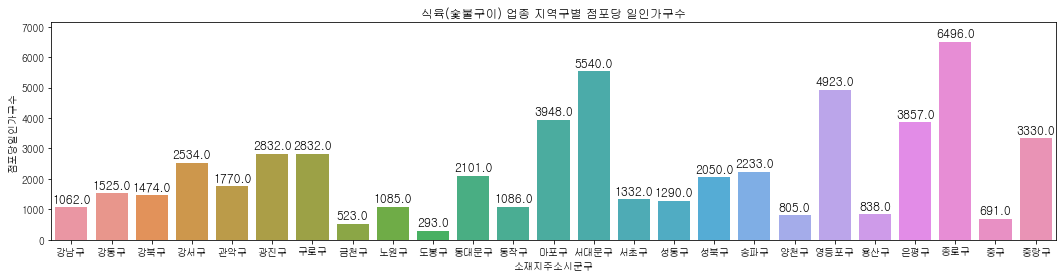

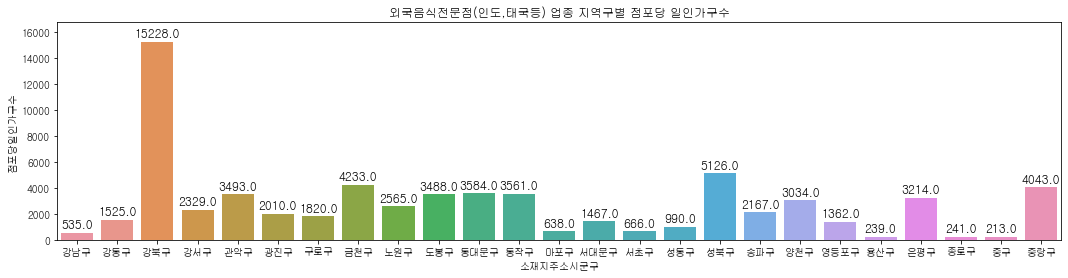

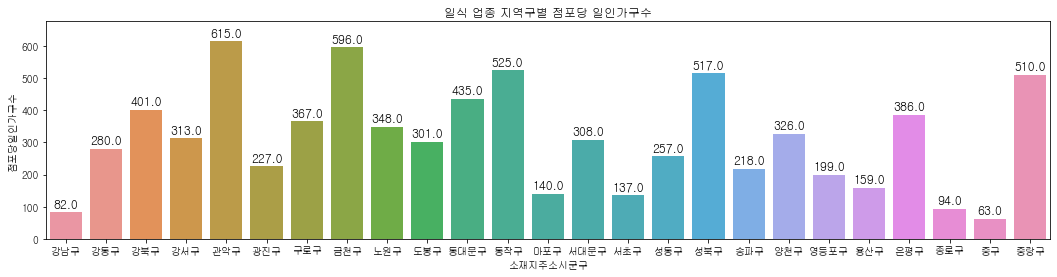

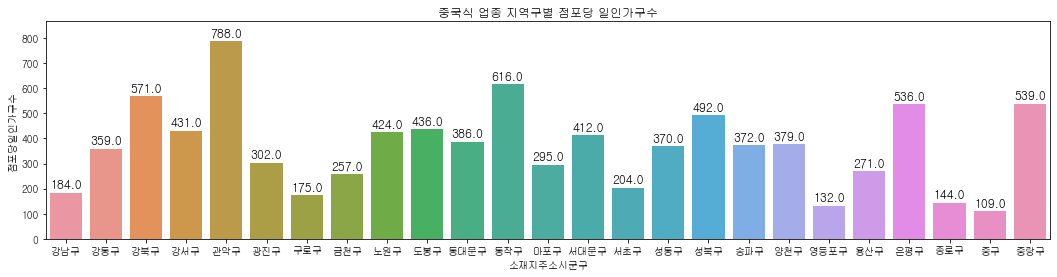

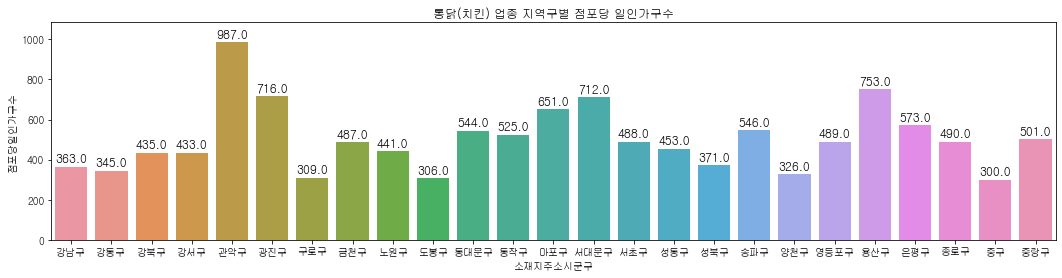

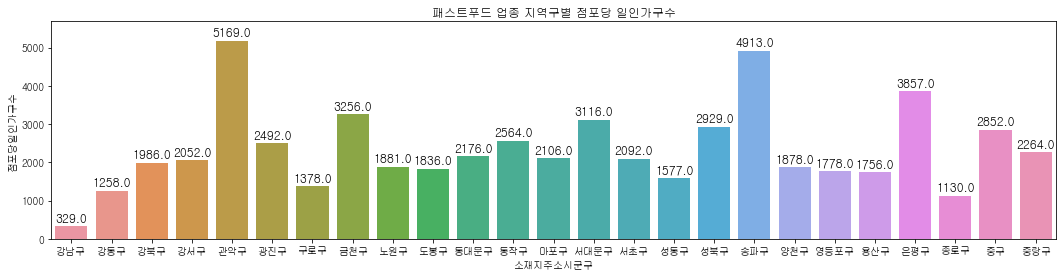

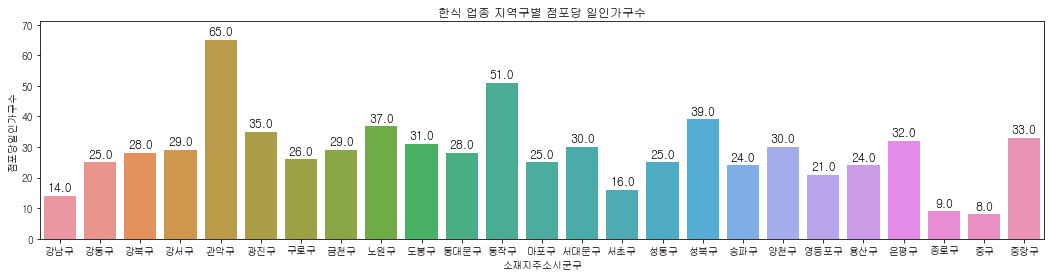

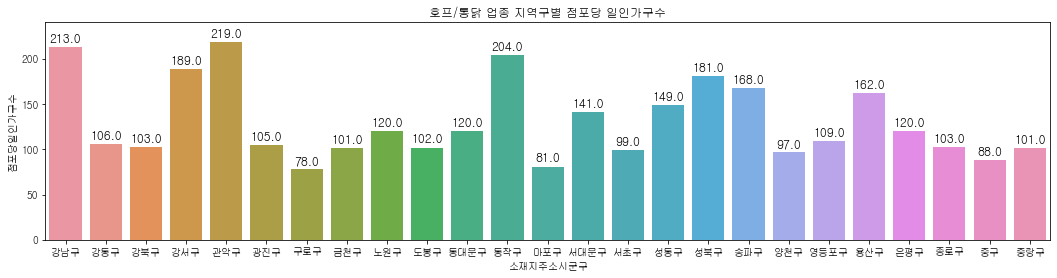

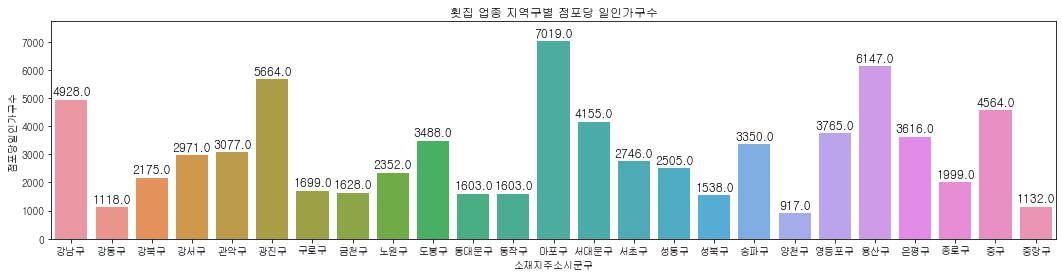

In [314]:
for col in list(temp.업태구분명.unique()):
    
    plt.figure(figsize=(18, 4))
    plots = sns.barplot(data = temp.loc[temp.업태구분명 == col].round(), x='소재지주소시군구', y='점포당일인가구수',
               order = temp.소재지주소시군구.unique())

    for bar in plots.patches:
        plots.annotate(format(bar.get_height()), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 8),
                       textcoords='offset points')
    try:
        plt.ylim(top = temp.loc[temp.업태구분명 == col].점포당일인가구수.max()*1.1)
    except:
        pass
    plt.title('{} 업종 지역구별 점포당 일인가구수'.format(col))
    plt.show()

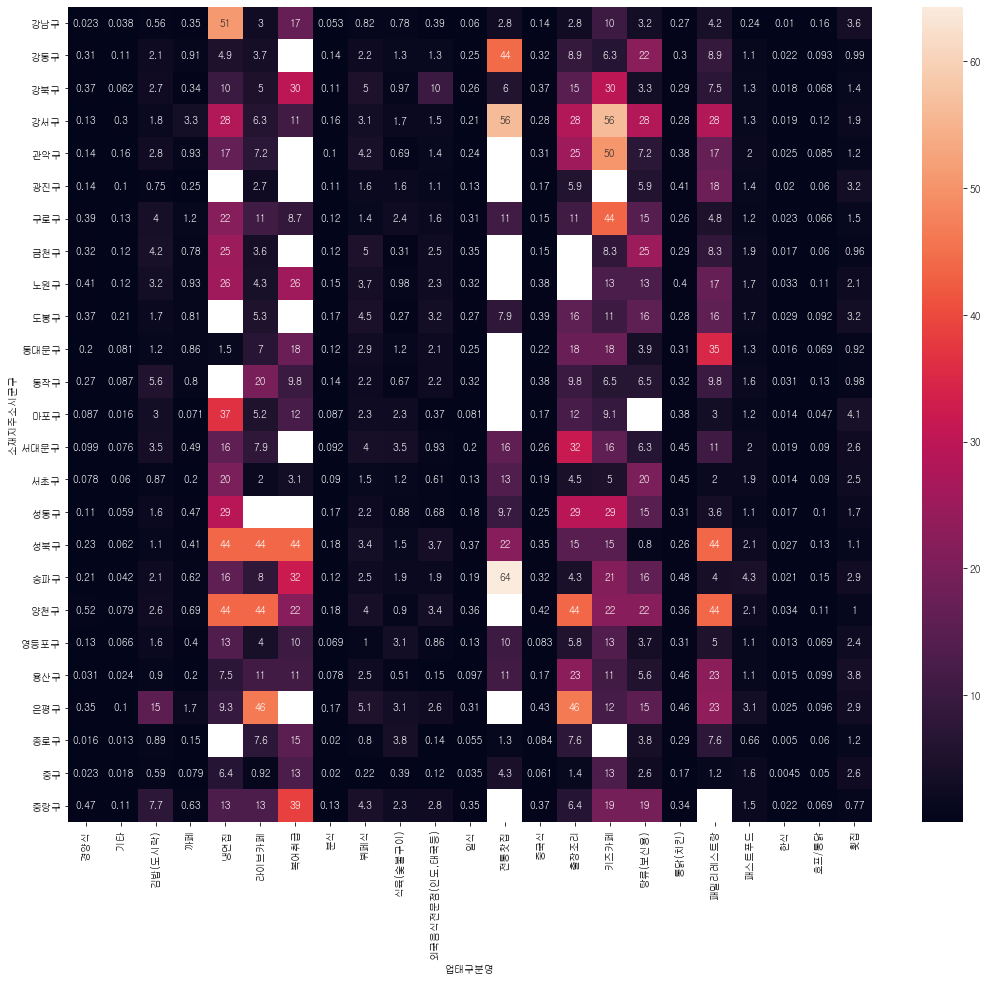

In [252]:
plt.figure(figsize=(18, 15))
sns.heatmap(pd.pivot(data=temp, index='소재지주소시군구', columns='업태구분명', values='점포당인구수')*0.0001, # 1만명당 1
           annot=True)
plt.show()

### ★지역별 인구이동

In [486]:
pop_transfer = pop_transfer.set_index([('행정구역(시군구)별', '행정구역(시군구)별'), ('연령별','연령별')]).stack().reset_index()

(행정구역(시군구)별, 행정구역(시군구)별) (연령별, 연령별)            level_2    2016    2017  \
0                       서울특별시          계            순이동 (명) -140257  -98486   
1                       서울특별시          계          시도간전입 (명)  453687  454130   
2                       서울특별시          계          시도간전출 (명)  593944  552616   
3                       서울특별시          계  시도내이동-시군구간 전입 (명)  574193  564271   
4                       서울특별시          계  시도내이동-시군구간 전출 (명)  574193  564271   
...                       ...        ...                ...     ...     ...   
1243                      강동구   35 - 39세  시도내이동-시군구간 전입 (명)    2158    2986   
1244                      강동구   35 - 39세  시도내이동-시군구간 전출 (명)    1880    2278   
1245                      강동구   35 - 39세     시도내이동-시군구내 (명)    2772    3556   
1246                      강동구   35 - 39세            총전입 (명)    6701    8731   
1247                      강동구   35 - 39세            총전출 (명)    8528    9111   

        2018    2019    2020  
0    -110230  -49588  -64850  
1     460131  475866  510014  
2     570361  525454  574864  
3     548796  543831  623431  
4     548796  543831  623431  
...      ...     ...     ...  
1243    2178    3218    5111  
1244    1877    1918    2194  
1245    2428    2959    3526  
1246    6418    8522   11590  
1247    7765    7673    8627  

[1248 rows x 8 columns]

In [487]:
pop_transfer.columns = ['지역구', '연령별', '이동종류', '2016', '2017', '2018', '2019', '2020']

In [520]:
pop_transfer_sum = pop_transfer.loc[(pop_transfer.연령별 == '계') & (pop_transfer.지역구 != '서울특별시')]

In [521]:
pop_transfer_sum.set_index(['지역구', '이동종류'], inplace=True)

In [522]:
pop_transfer_mz = pop_transfer.loc[~(pop_transfer.연령별 == '계') & (pop_transfer.지역구 != '서울특별시')].groupby(['지역구', '이동종류']).sum()

In [523]:
pop_transfer_mz.rename({'2016': 'MZ2016', '2017': 'MZ2017', '2018': 'MZ2018', '2019': 'MZ2019', '2020': 'MZ2020'}, axis=1, inplace=True)

In [524]:
pop_transfer_fianl = pd.concat([pop_transfer_sum, pop_transfer_mz], axis=1).reset_index().drop(['연령별'], axis=1)

In [525]:
pop_transfer_fianl1 = pop_transfer_fianl.loc[pop_transfer_fianl.이동종류 == '순이동 (명)'].set_index(['지역구']).drop(['이동종류'], axis=1)

#### 전체 순이동 비교

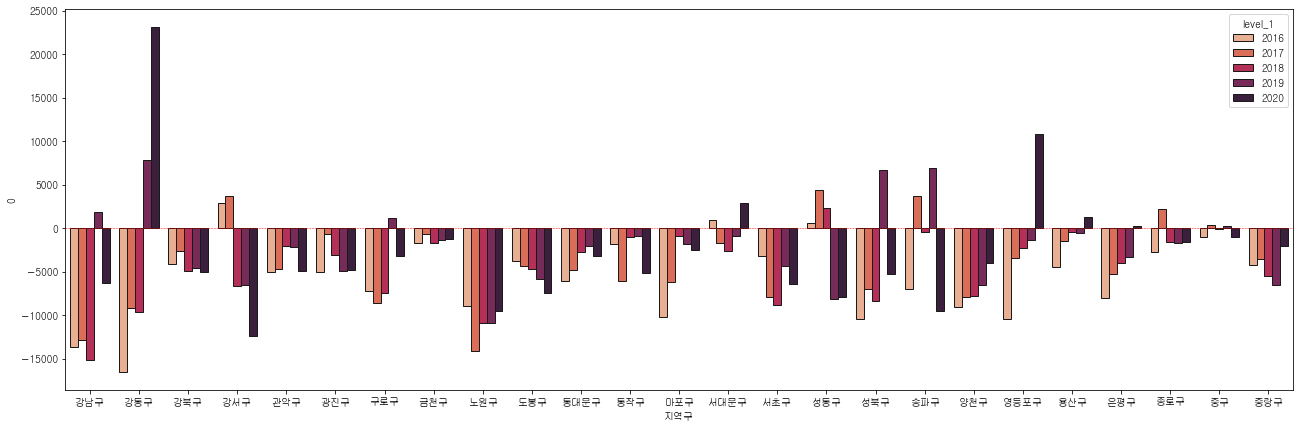

In [555]:
plt.figure(figsize=(22, 7))
sns.barplot(data = pop_transfer_fianl1.iloc[:, :5].stack().reset_index(),
            x='지역구', y=0, hue='level_1', edgecolor=".1", palette="rocket_r")
plt.axhline(y = 0, color = 'r', linestyle = '--', linewidth = 0.5)
plt.show()

- https://www.hani.co.kr/arti/area/capital/985179.html
- 최근 5년간 서울시 인구는 꾸준히 감소했습니다.
- 인구 순증이 일어난 곳은 오직 강동구, 서대문구, 영등포구, 용산구 뿐입니다.
- 강서구는 순감이 심화되고 있으며, 노원구, 도봉구, 성동구도 순감이 심각한 수준입니다.

#### MZ세대 인구 구별 순이동 비교

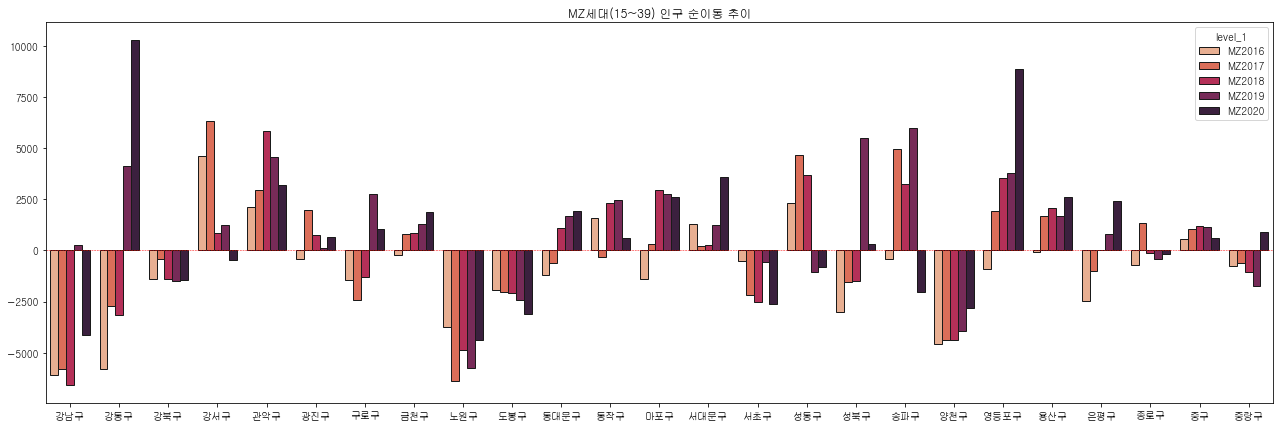

In [554]:
plt.figure(figsize=(22, 7))
sns.barplot(data = pop_transfer_fianl1.iloc[:, 5:].stack().reset_index(),
            x='지역구', y=0, hue='level_1', edgecolor=".1", palette="rocket_r")
plt.axhline(y = 0, color = 'r', linestyle = '--', linewidth = 0.5)
plt.xlabel('')
plt.ylabel('')
plt.title('MZ세대(15~39) 인구 순이동 추이')
plt.show()

- MZ세대 인구 순이동을 살펴보면 다소 다른 결과가 펼쳐집니다.
- 총인구 순증이 일어났던 강동구와 영등포구는 MZ세대 인구의 순증이 두드러집니다.
- 1인가구가 많은 관악구를 비롯하여 금천구, 마포구, 서대문구, 용산구 등은 꾸준히 MZ세대의 순증이 일어난 지역입니다.
- 구로구, 동대문구, 성북구, 은평구, 중랑구 등은 최근에 MZ세대의 순증으로 전환된 지역입니다.
- 강남구, 노원구, 도봉구, 서초구, 도봉구는 꾸준히 순감이 일어나는 지역입니다.


- 송파구마저 2020년 순감으로 전환되며, 강남3구는 MZ세대가 빠져나가는 지역이 되었습니다.
- 여의도를 중심으로 뭉쳐 있는 영등포구, 마포구, 서대문구, 용산구는 MZ세대를 흡수하는 지역입니다.

# SOLUTION

## USEABLE of DELIVERY (배달용이성)

### 배달소요시간

### 배차소요시간

## VIABILITY(생존력)

### 폐업률

### 인구대비업체수비율

## ATTRACTIVENESS of HINTERLAND (배후지 매력도)

### 1인가구비율

### 주거단지?

## POTENTIALITY(성장가능성)

### 배달증가율

### MZ세대증가율